In [10]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2025
The Miami Grand Prix is a Formula One Grand Prix which was held for the first time during the 2022 season, with the event taking place at the Miami International Autodrome on a ten-year contract. 

## Obtain session information

In [11]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='USA')

session_key session_name                 date_start  \
0        10023   Practice 1  2025-05-02T16:30:00+00:00   

                    date_end gmt_offset session_type  meeting_key location  \
0  2025-05-02T17:30:00+00:00  -04:00:00     Practice         1259    Miami   

   country_key country_code   country_name  circuit_key circuit_short_name  \
0           19          USA  United States          151              Miami   

   year  
0  2025

## Upgrades
In this section those upgrades brought by the teams will be shown.
<table>
<tr>
    <td>
    Team
    </td>
    <td>
    Updated component
    </td>
    <td>
    Upgrade type
    </td>
</tr>
<tr>
    <td>
    Red Bull
    </td>
    <td>
    Floor Fences
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Red Bull
    </td>
    <td>
    Floor edge
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Mercedes
    </td>
    <td>
    Rear wing
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Aston Martin
    </td>
    <td>
    Front wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>

<tr>
    <td>
    Aston Martin
    </td>
    <td>
    Rear wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Alpine
    </td>
    <td>
    Front corner
    </td>
    <td>
    Perormance
    </td>
</tr>

<tr>
    <td>
    Alpine
    </td>
    <td>
    Front suspension
    </td>
    <td>
    Perormance
    </td>
</tr>

<tr>
    <td>
    Williams
    </td>
    <td>
    Beam wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Front suspension
    </td>
    <td>
    Performance
    </td>
</tr>
</table>

## Free Practice
### Obtain setup

In [12]:
practice = libraryDataF1.obtain_information('laps',session_key=10023)
stintInformation = libraryDataF1.obtain_information('stints',session_key=10023)
drivers = libraryDataF1.obtain_information('drivers',session_key=10023)

In [13]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
Williams and Sauber are centered on straights while Racing Bulls,Haas and Ferrari are centered on turns.

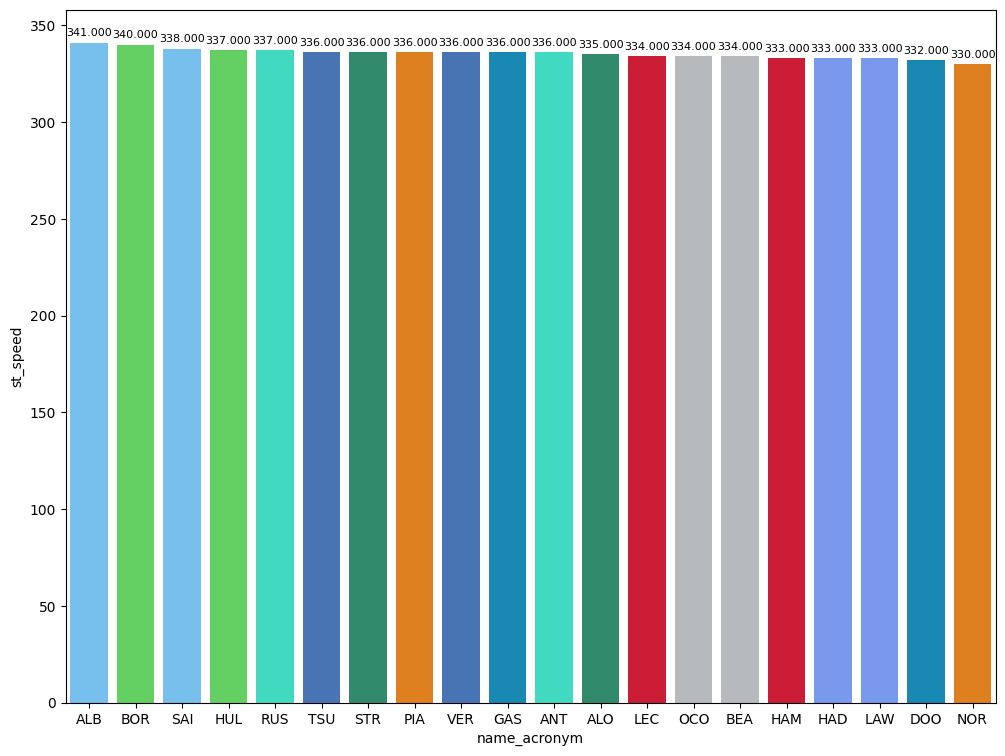

In [14]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

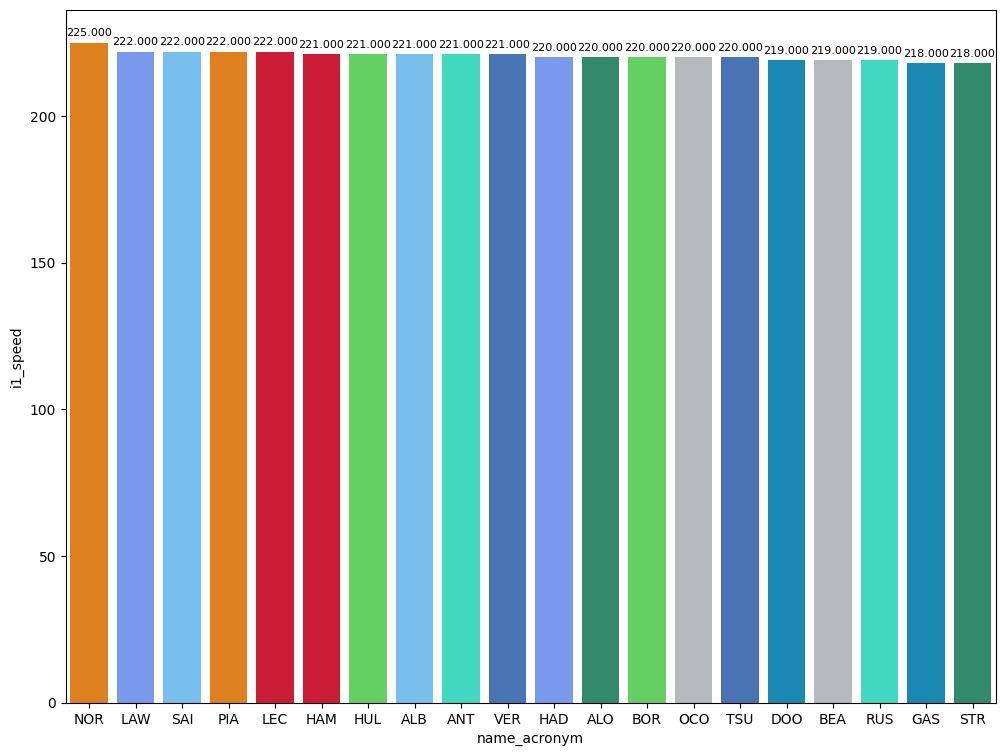

In [15]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

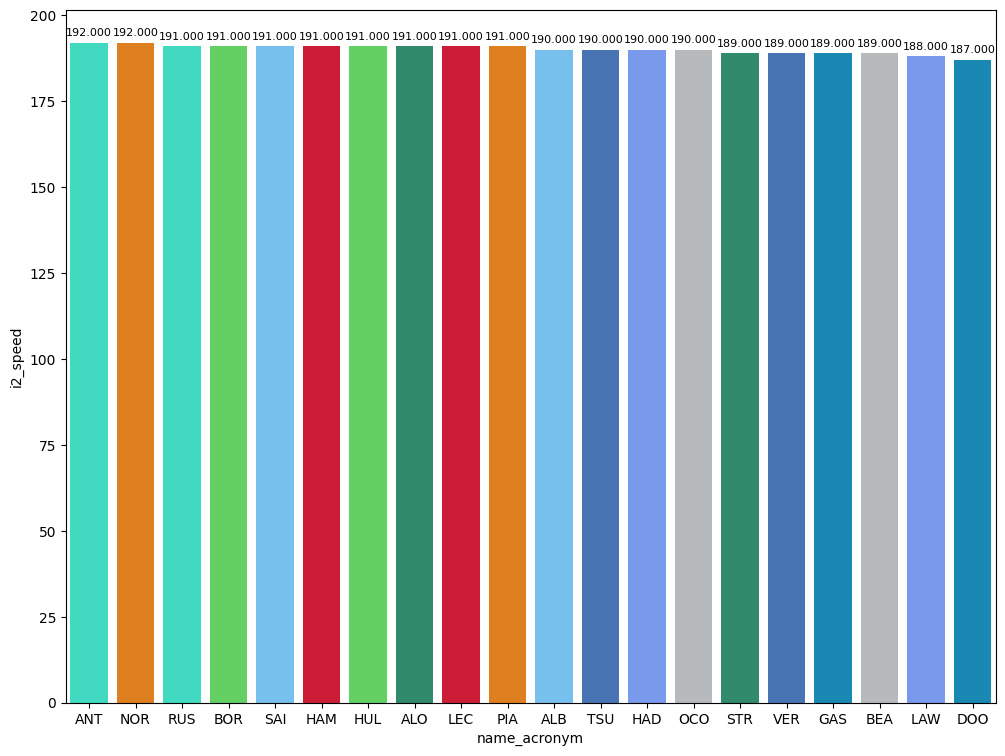

In [16]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [17]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
173    Isack HADJAR     HARD             29.199             34.057   
143  George RUSSELL   MEDIUM             29.094             33.899   
411   Oscar PIASTRI     SOFT             28.822             33.375   

     duration_sector_3  lap_duration  
173             25.414        88.670  
143             25.065        88.058  
411             24.931        87.128

### Deltas
Some of the drivers were not able to record a laptime with softs. Taking into account that, Williams are so strong, even thought Albon was on traffic in S2 and Ferrari is not discard for taking the pole.

In [18]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


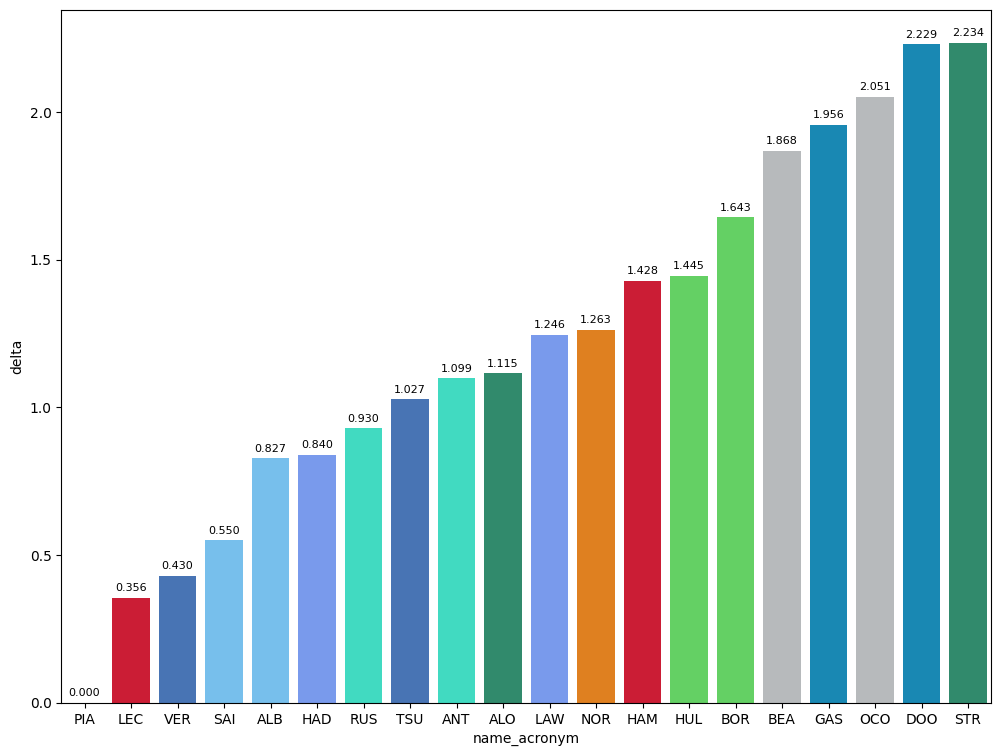

In [19]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
S1: Red Bull can fight in this sector but they have to be careful with the warm of the tyres but McLaren has a bit more.
S2: Verstappen loses a bit in this sector being McLaren very dominant here but it is faster than Ferrari
S3: Verstappen loses a lot of time here and Ferrari is very competitve here.

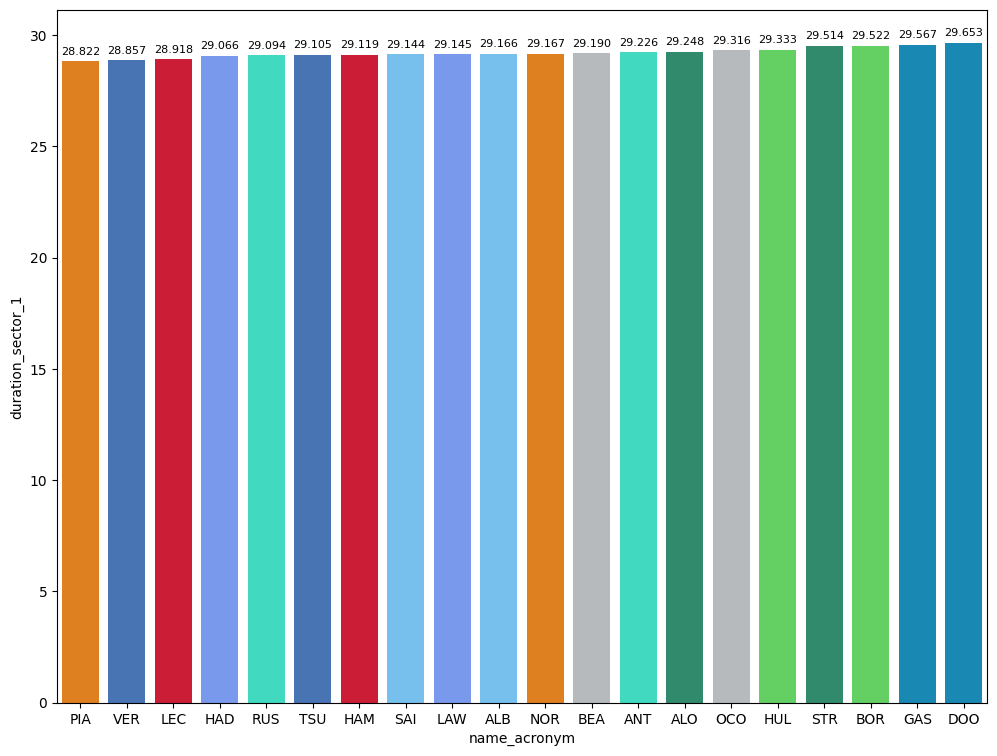

In [20]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

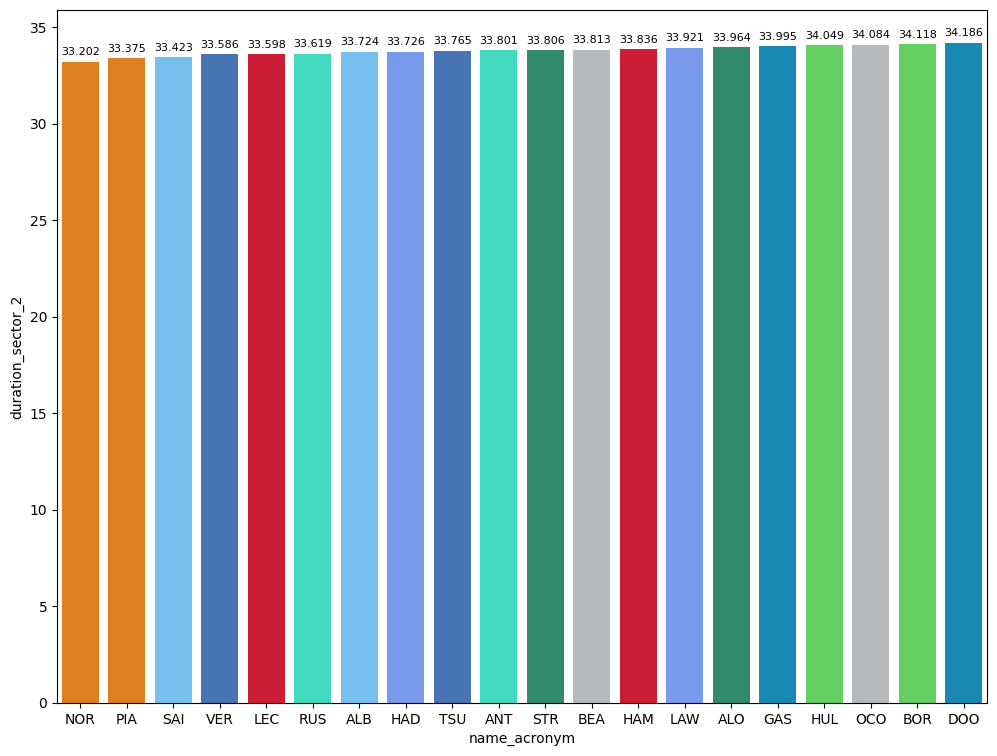

In [21]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

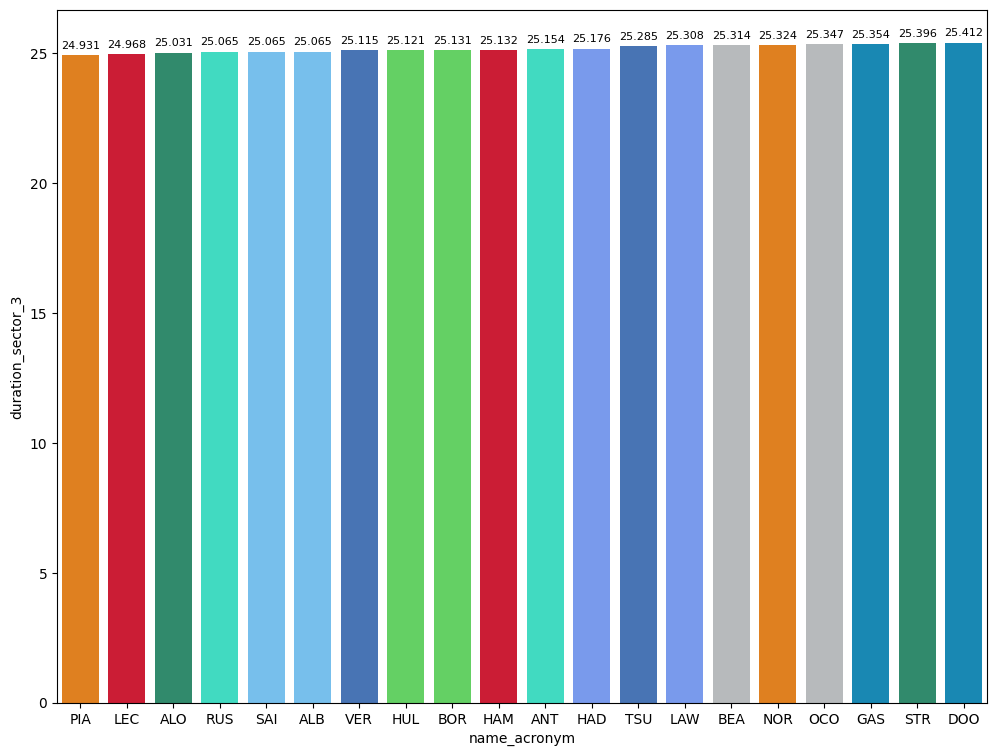

In [22]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [23]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <=98").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT          88.39960
MEDIUM        91.19419
HARD          91.69319

### Long runs

In [111]:
MINIMUN_SECONDS = 90.5
MAXIMUM_SECONDS = 93

#### Red Bull Racing

In [112]:
stintInformation.query('driver_number == 1 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
6          1259        10023             1              1          1        6   
7          1259        10023             1             22          1        6   
30         1259        10023             2             22          7        9   
33         1259        10023             2              1          7       10   
42         1259        10023             3              1         10       18   
44         1259        10023             3             22         10       18   
65         1259        10023             4              1         19       21   
67         1259        10023             4             22         19       22   
76         1259        10023             5             22         22       22   

   compound  tyre_age_at_start  
6    MEDIUM                  0  
7    MEDIUM                  0  
30   MEDIUM                  5  
33   MEDIUM                  5  
42   MEDIUM                  8  
44   MEDIUM                  0  
65     SOFT                  0  
67     SOFT                  0  
76     SOFT                  3

In [113]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
245  Max VERSTAPPEN   MEDIUM  2025-05-02T17:02:12.954000+00:00          10   
246  Max VERSTAPPEN   MEDIUM  2025-05-02T17:02:12.954000+00:00          10   
259  Max VERSTAPPEN   MEDIUM  2025-05-02T17:03:44.978000+00:00          11   
277  Max VERSTAPPEN   MEDIUM  2025-05-02T17:05:16.833000+00:00          12   
295  Max VERSTAPPEN   MEDIUM  2025-05-02T17:06:49.318000+00:00          13   
311  Max VERSTAPPEN   MEDIUM  2025-05-02T17:08:21.748000+00:00          14   
326  Max VERSTAPPEN   MEDIUM  2025-05-02T17:09:54.154000+00:00          15   
339  Max VERSTAPPEN   MEDIUM  2025-05-02T17:11:26.198000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
245             30.684             35.089             26.196        91.969  
246             30.684             35.089             26.196        91.969  
259             30.726             35.094             26.033        91.853  
277             30.957             35.415             26.155        92.527  
295             30.816             35.482             26.100        92.398  
311             31.102             35.266             26.070        92.438  
326             30.918             35.186             25.998        92.102  
339             30.850             35.037             26.043        91.930

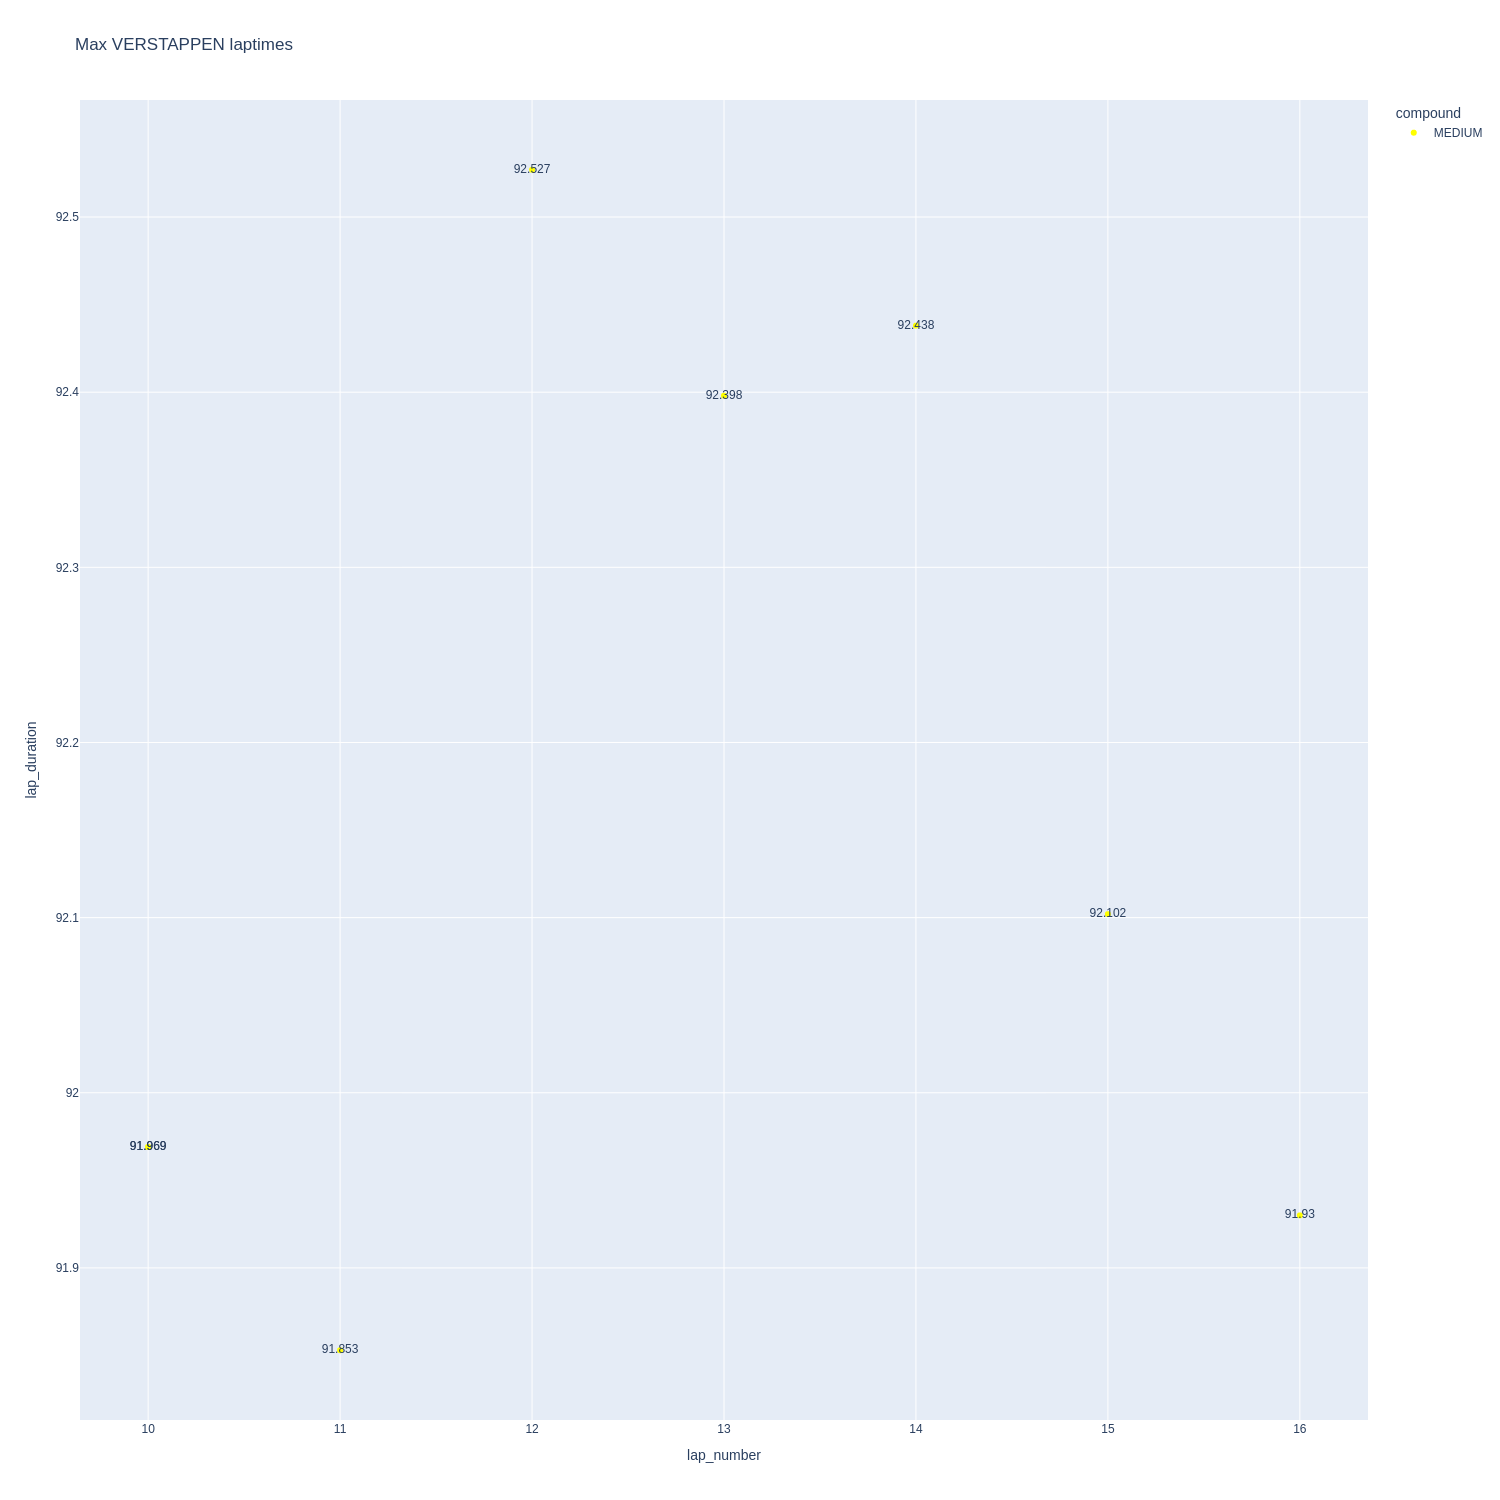

In [114]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

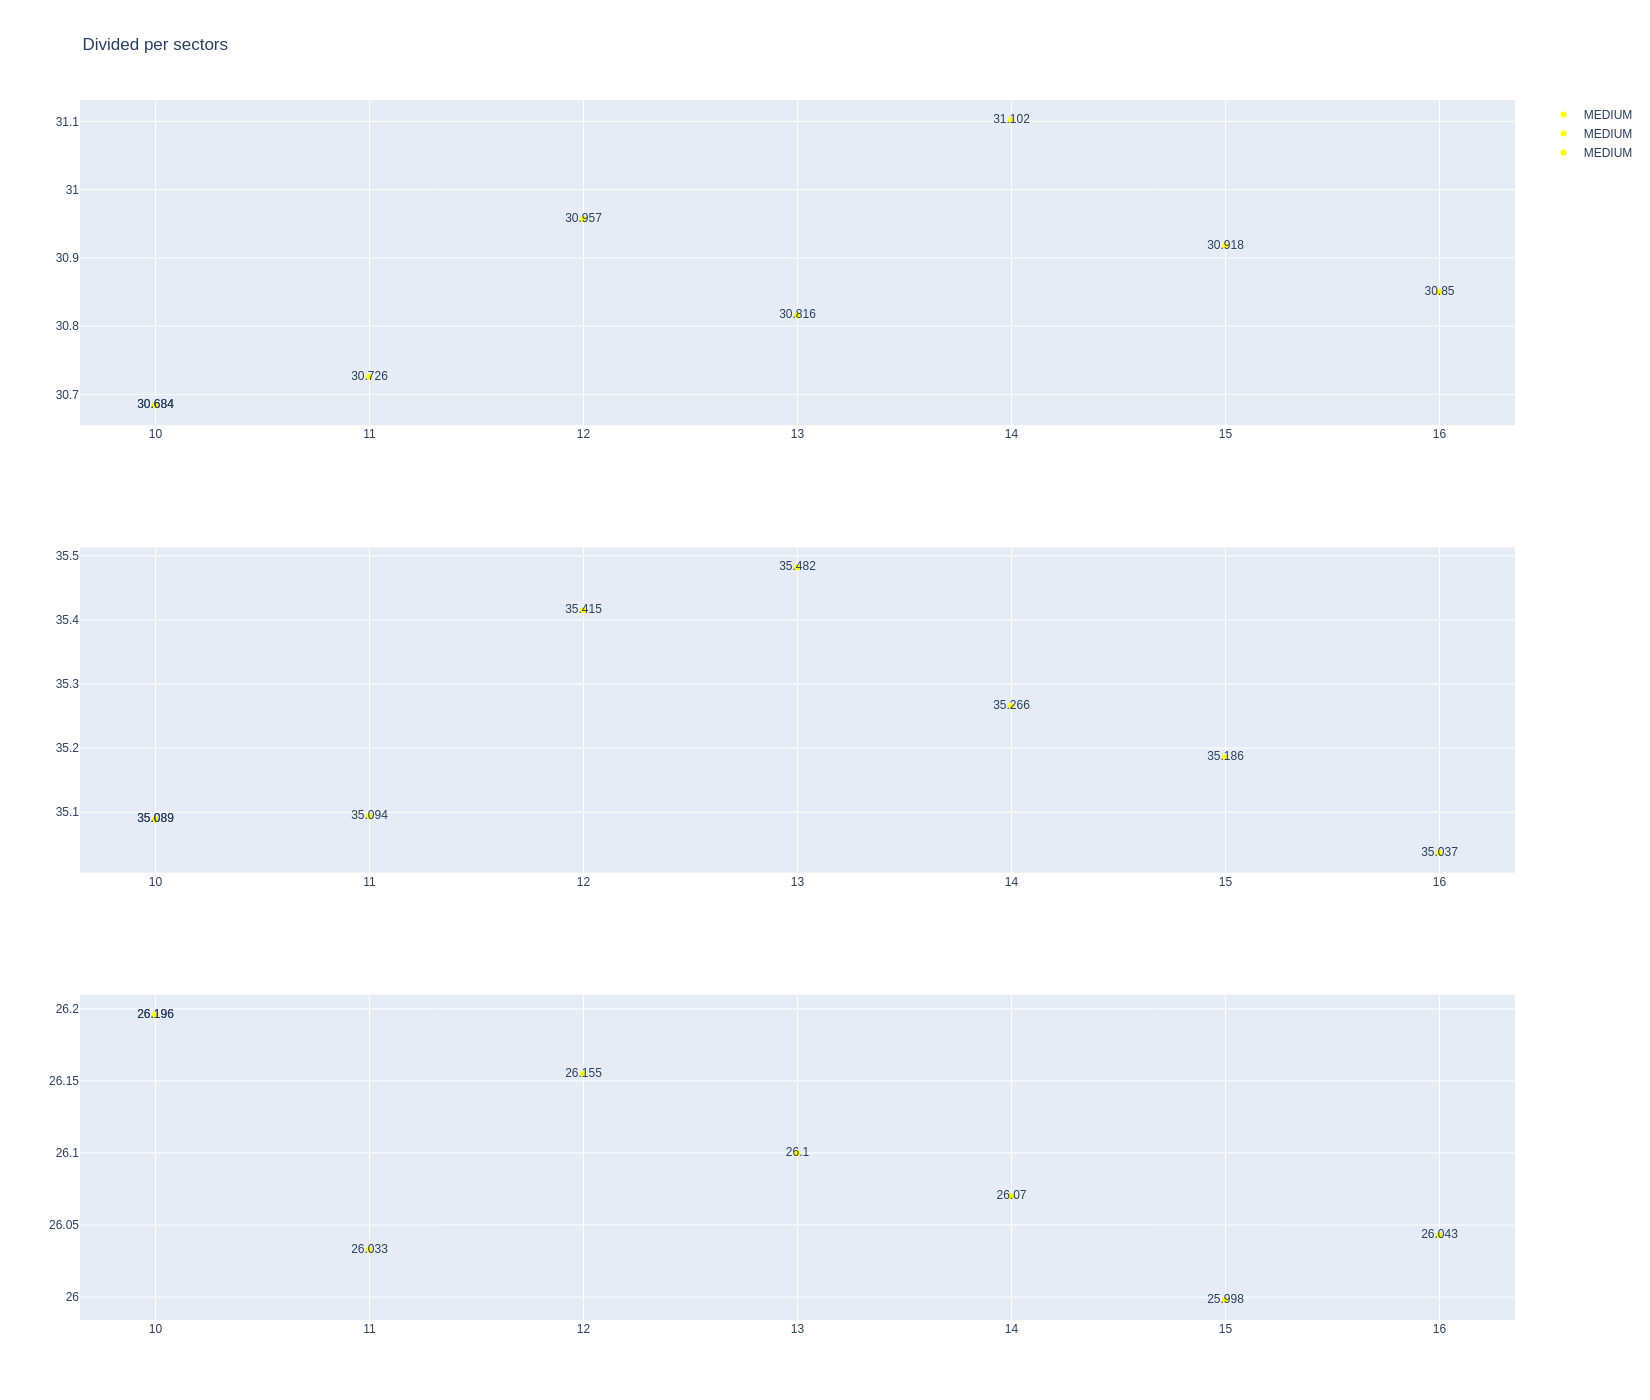

In [115]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [116]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
32   Yuki TSUNODA   MEDIUM  2025-05-02T16:33:26.841000+00:00           2   
302  Yuki TSUNODA   MEDIUM  2025-05-02T17:07:26.711000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
32              30.200             34.557             25.756        90.513  
302             31.128             35.570             26.119        92.817

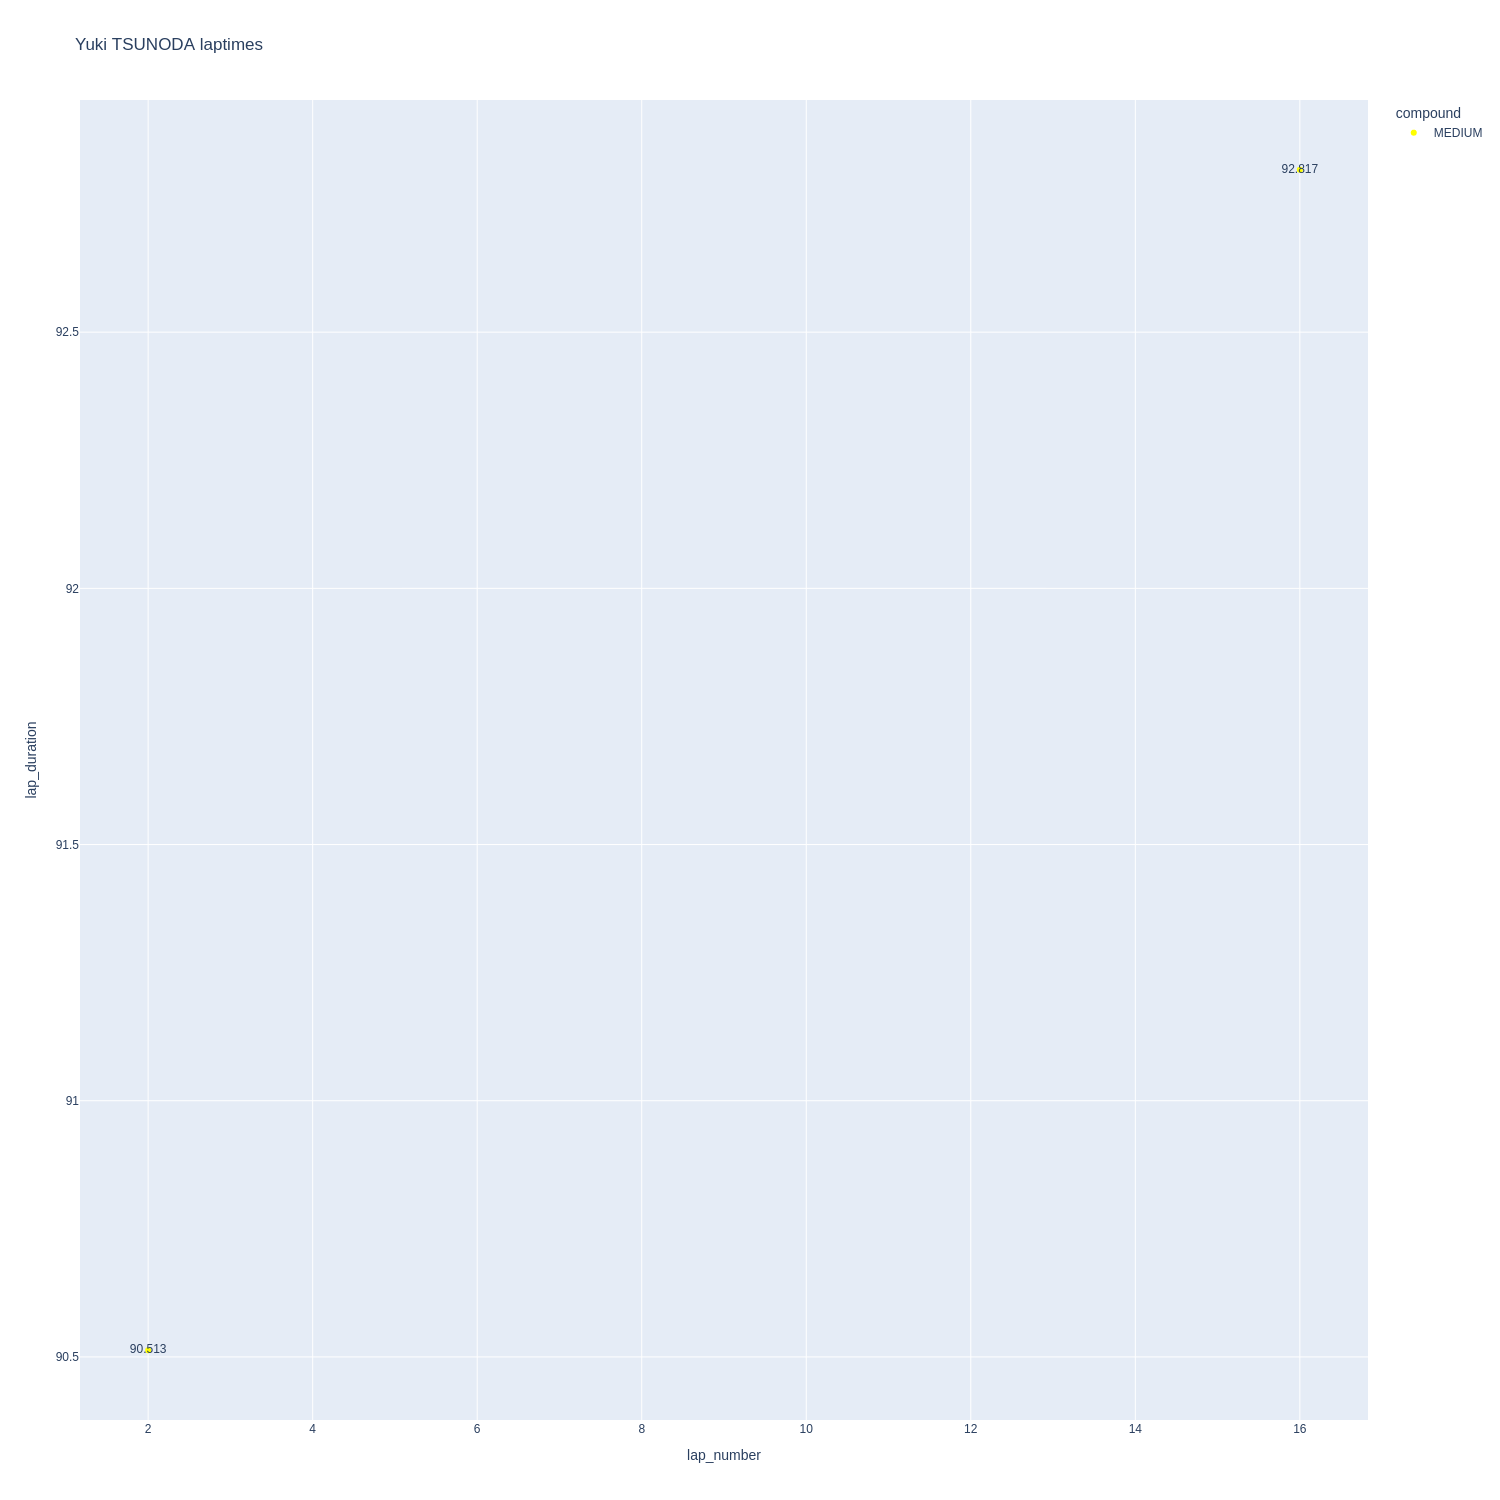

In [117]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

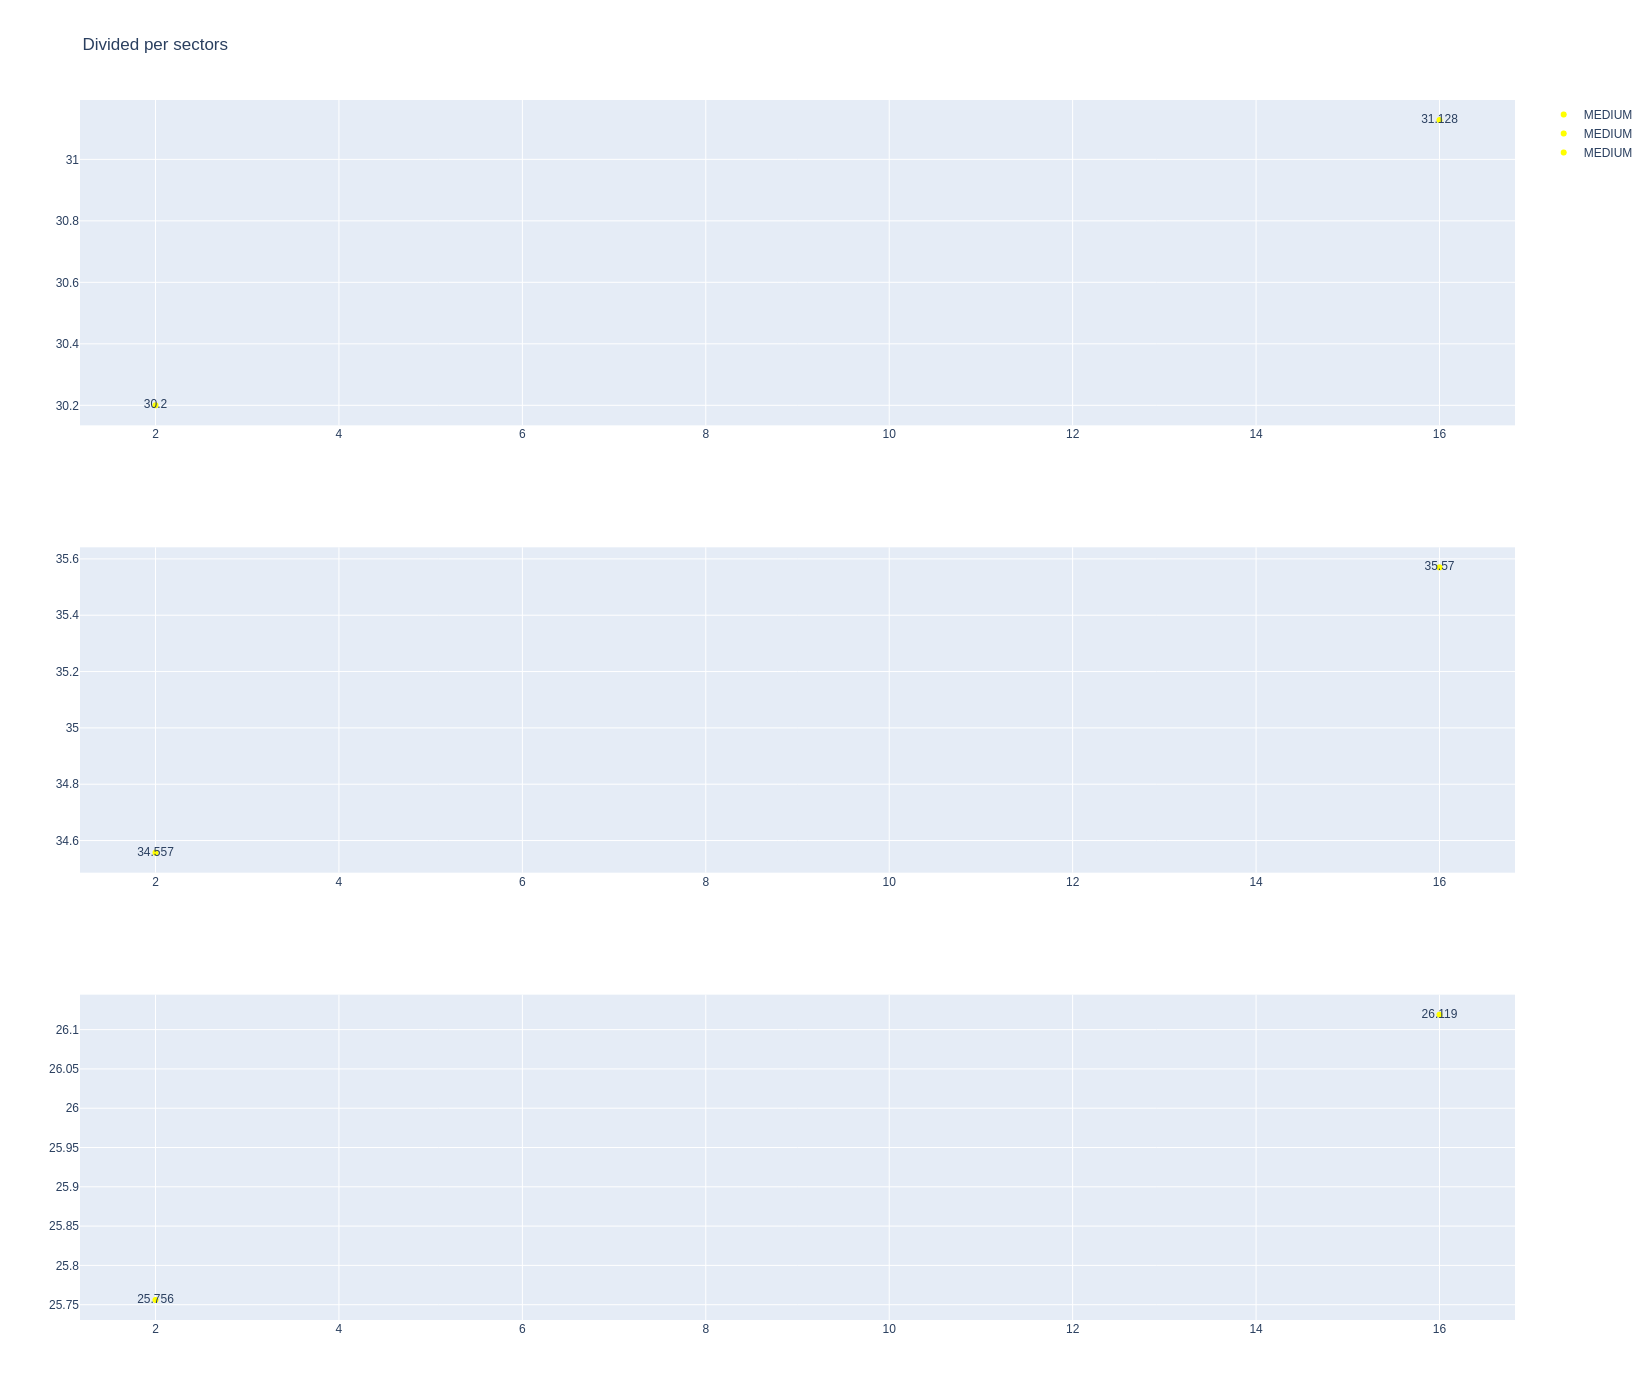

In [118]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [119]:
stintInformation.query('driver_number == 55 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
10         1259        10023             1             55          1        6   
15         1259        10023             1             16          1       11   
35         1259        10023             2             55          7       13   
53         1259        10023             2             16         12       20   
59         1259        10023             3             55         14       21   
74         1259        10023             3             16         21       23   
79         1259        10023             4             55         22       24   

   compound  tyre_age_at_start  
10   MEDIUM                  0  
15   MEDIUM                  0  
35   MEDIUM                  5  
53   MEDIUM                 10  
59   MEDIUM                  0  
74     SOFT                  0  
79     SOFT                  0

In [120]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
22   Charles LECLERC   MEDIUM  2025-05-02T16:32:18.059000+00:00           2   
294  Charles LECLERC   MEDIUM  2025-05-02T17:06:45.916000+00:00          15   
310  Charles LECLERC   MEDIUM  2025-05-02T17:08:17.904000+00:00          16   
325  Charles LECLERC   MEDIUM  2025-05-02T17:09:49.911000+00:00          17   
338  Charles LECLERC   MEDIUM  2025-05-02T17:11:21.915000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
22              30.842             34.810             25.865        91.517  
294             30.659             35.407             26.019        92.085  
310             30.595             35.211             26.081        91.887  
325             30.885             35.116             25.876        91.877  
338             30.334             34.775             25.793        90.902

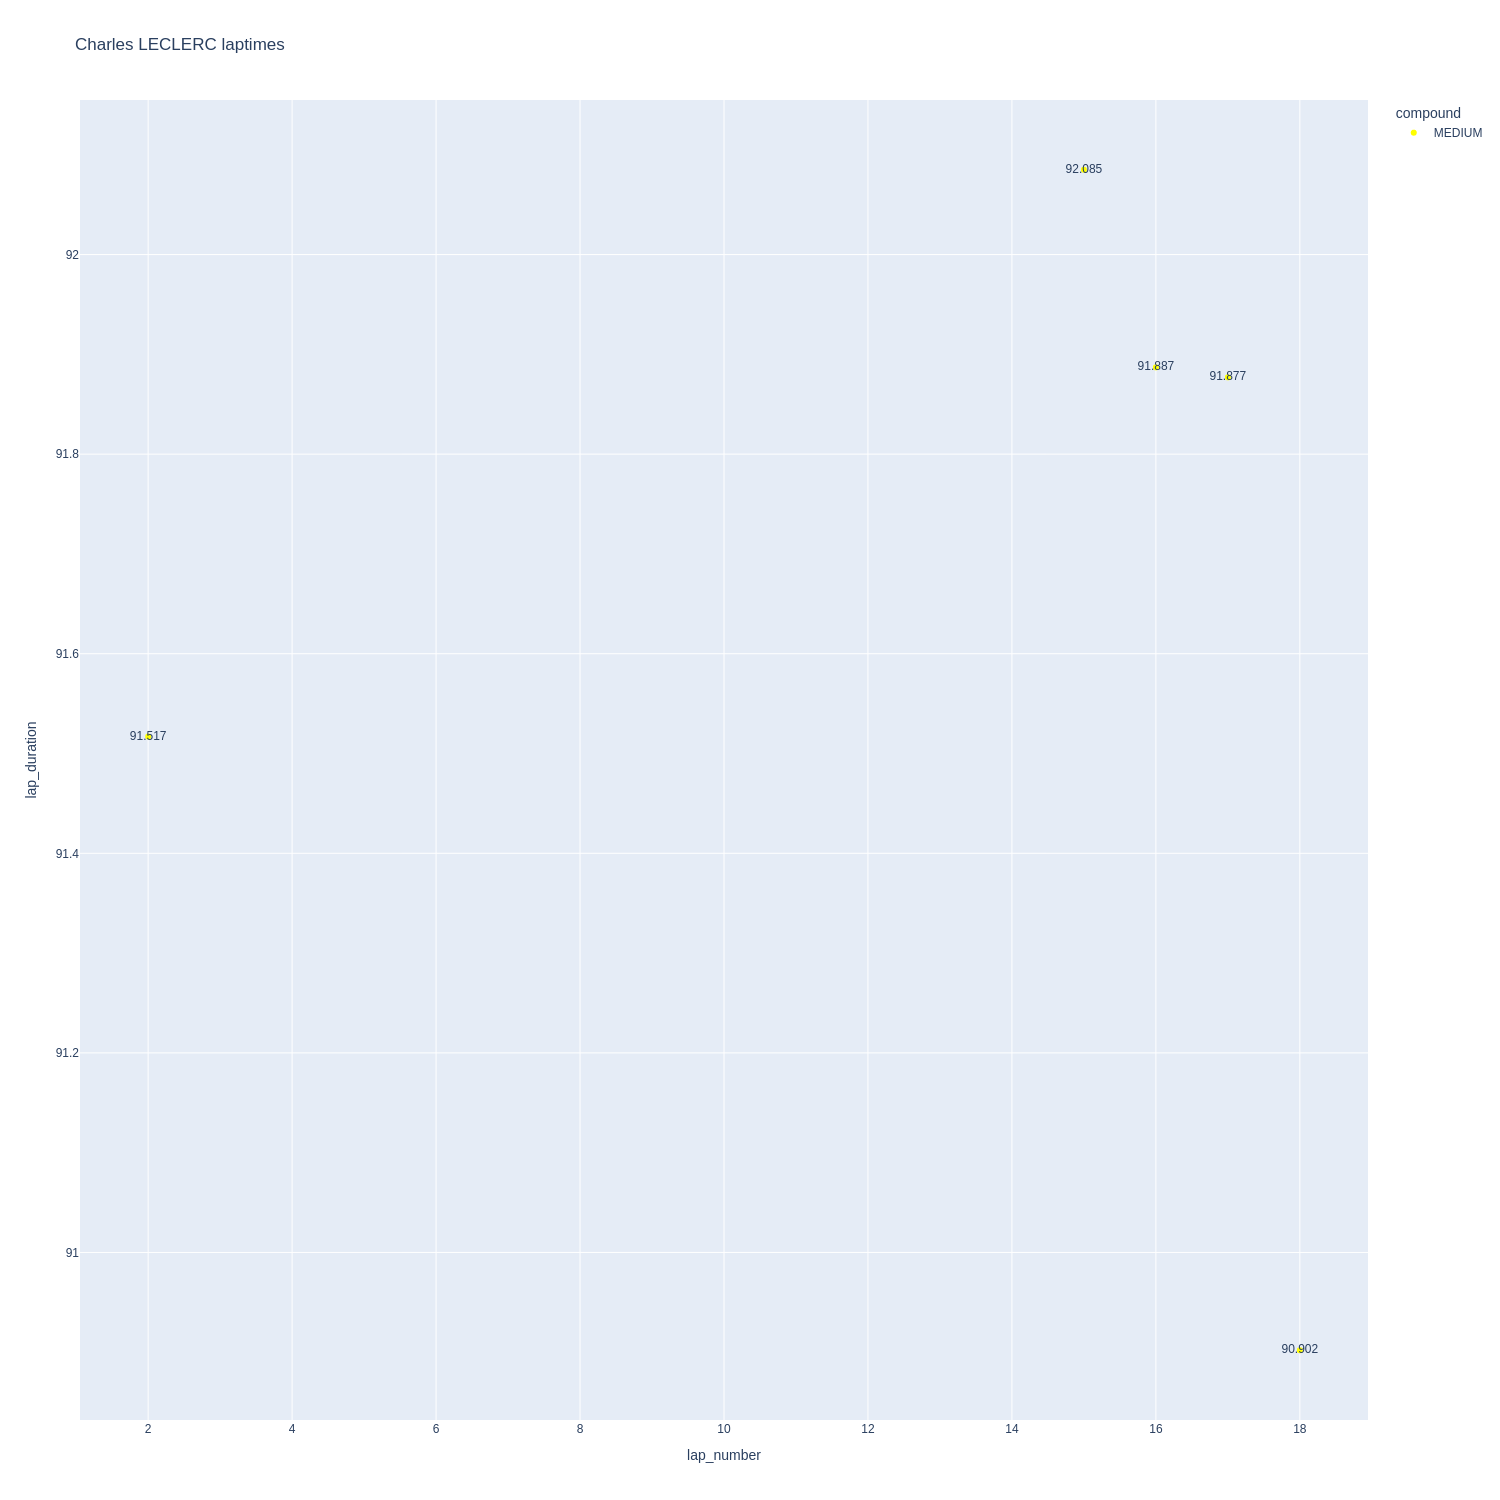

In [121]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

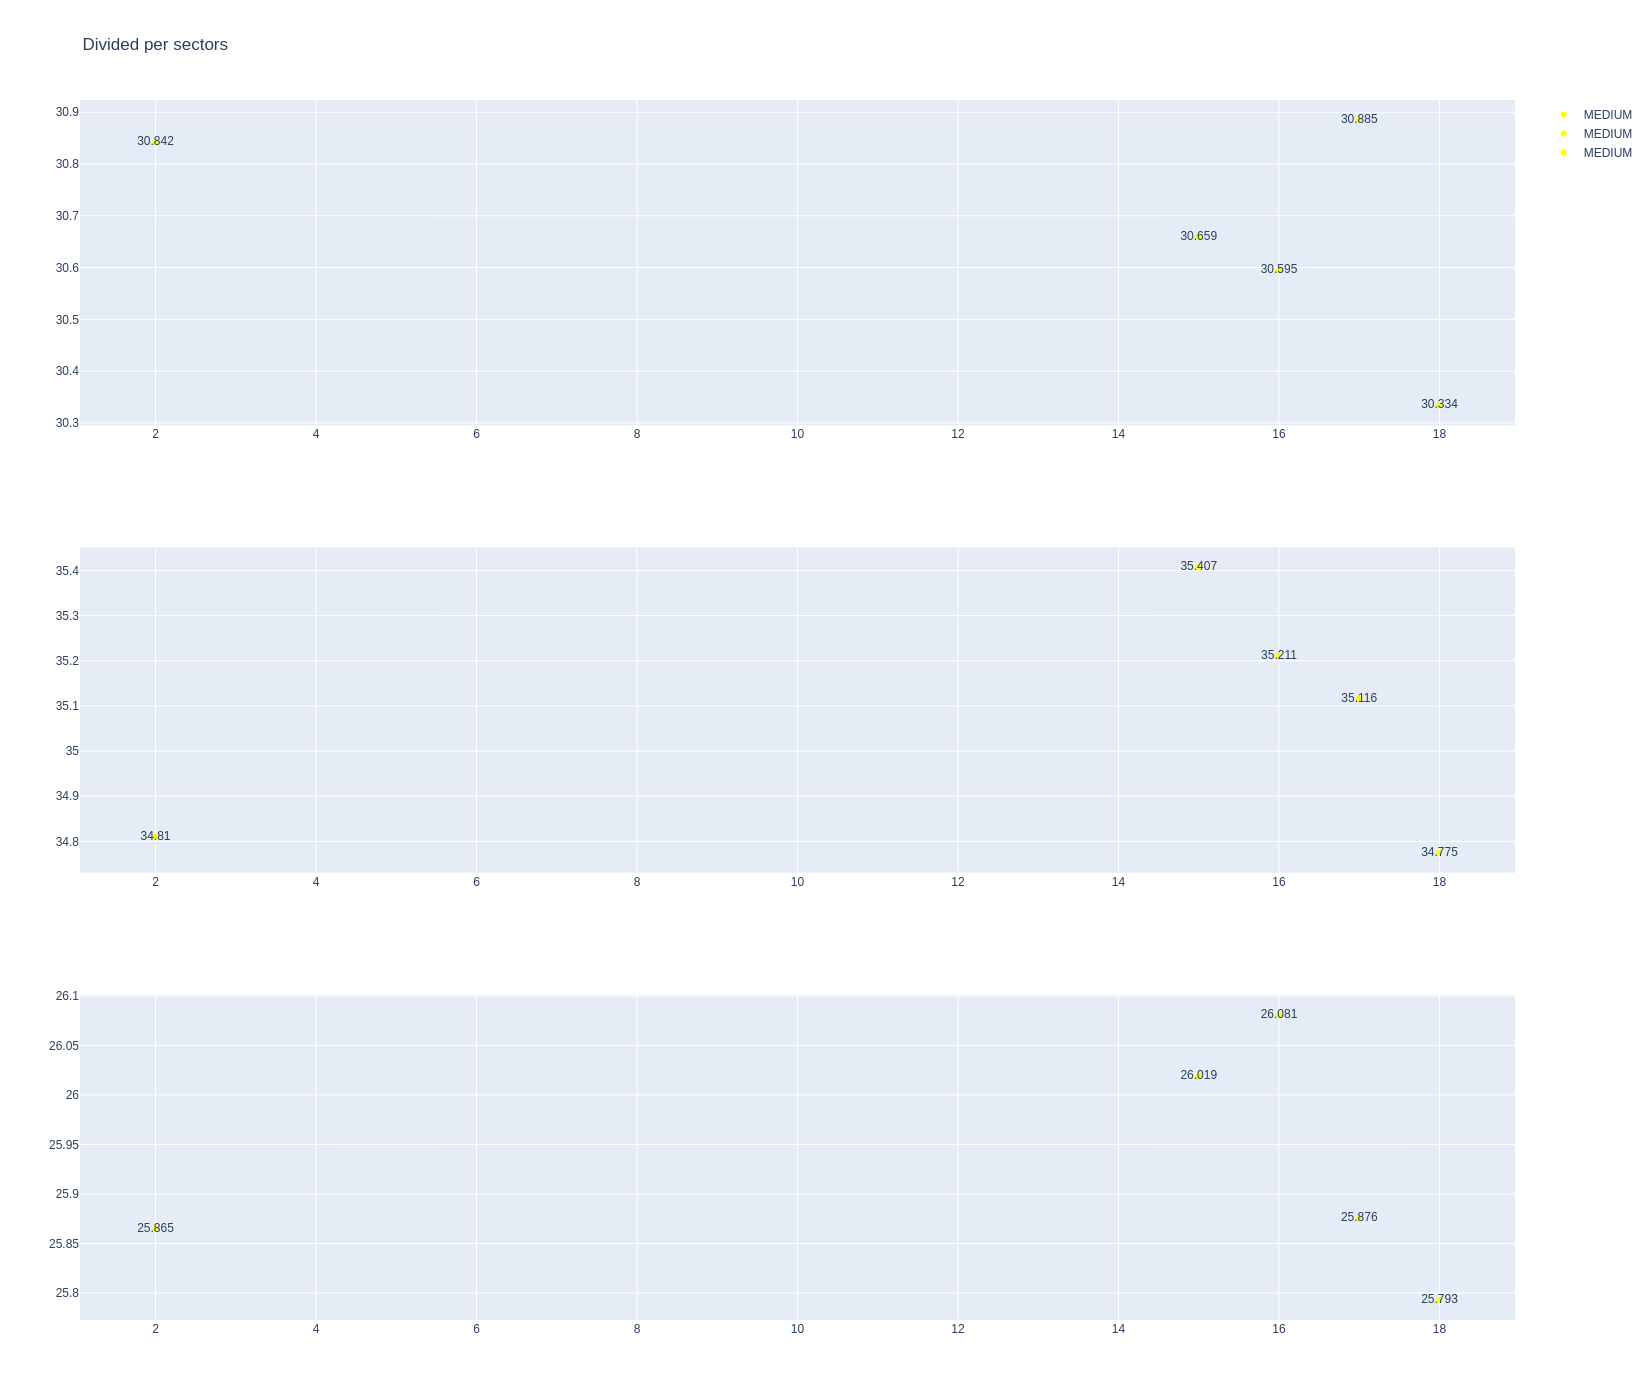

In [122]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [123]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
38   Lewis HAMILTON   MEDIUM  2025-05-02T16:33:55.887000+00:00           2   
332  Lewis HAMILTON   MEDIUM  2025-05-02T17:10:41.647000+00:00          15   
344  Lewis HAMILTON   MEDIUM  2025-05-02T17:12:12.697000+00:00          16   
356  Lewis HAMILTON   MEDIUM  2025-05-02T17:13:44.085000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
38              30.700             34.696             25.571        90.967  
332             29.521             35.381             26.100        91.002  
344             30.154             35.219             26.004        91.377  
356             30.280             35.105             25.791        91.176

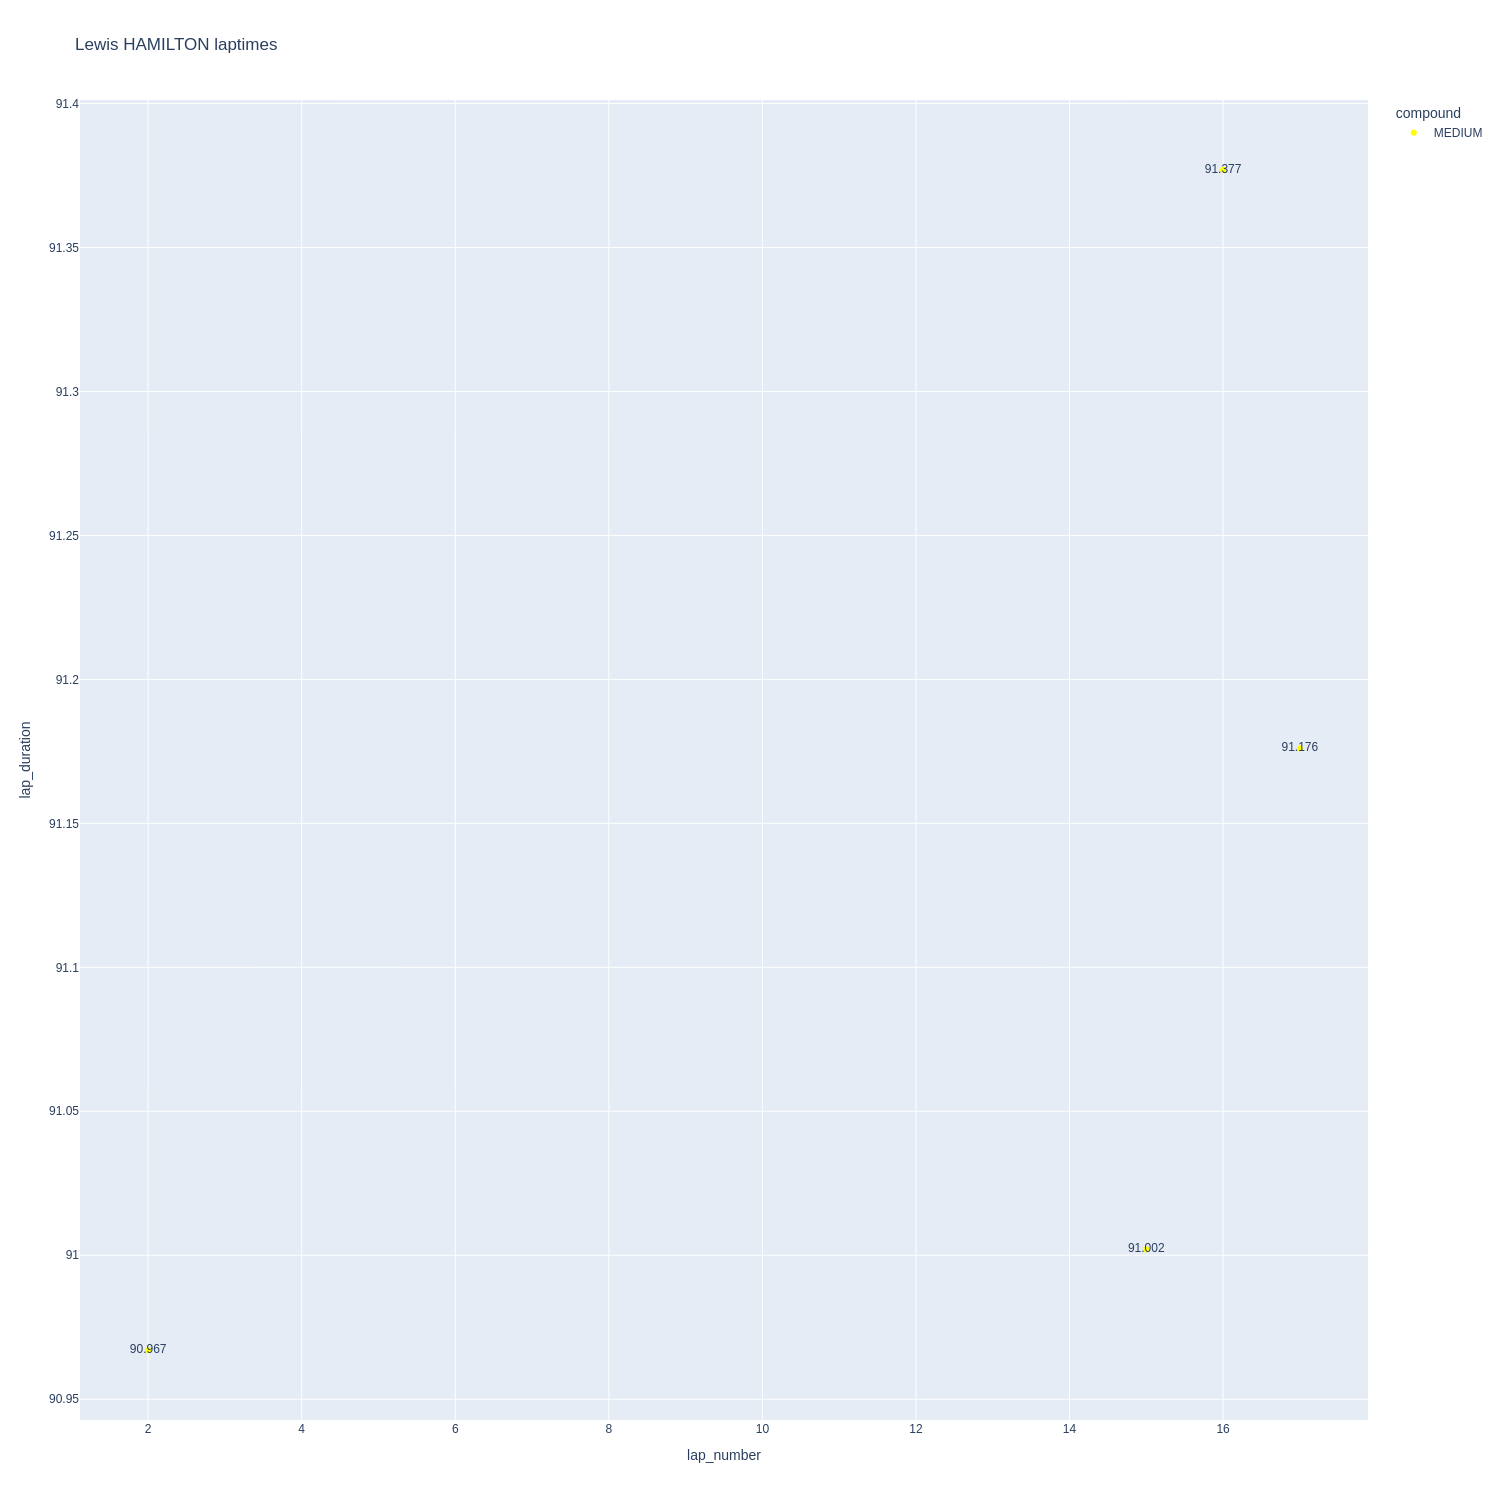

In [124]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

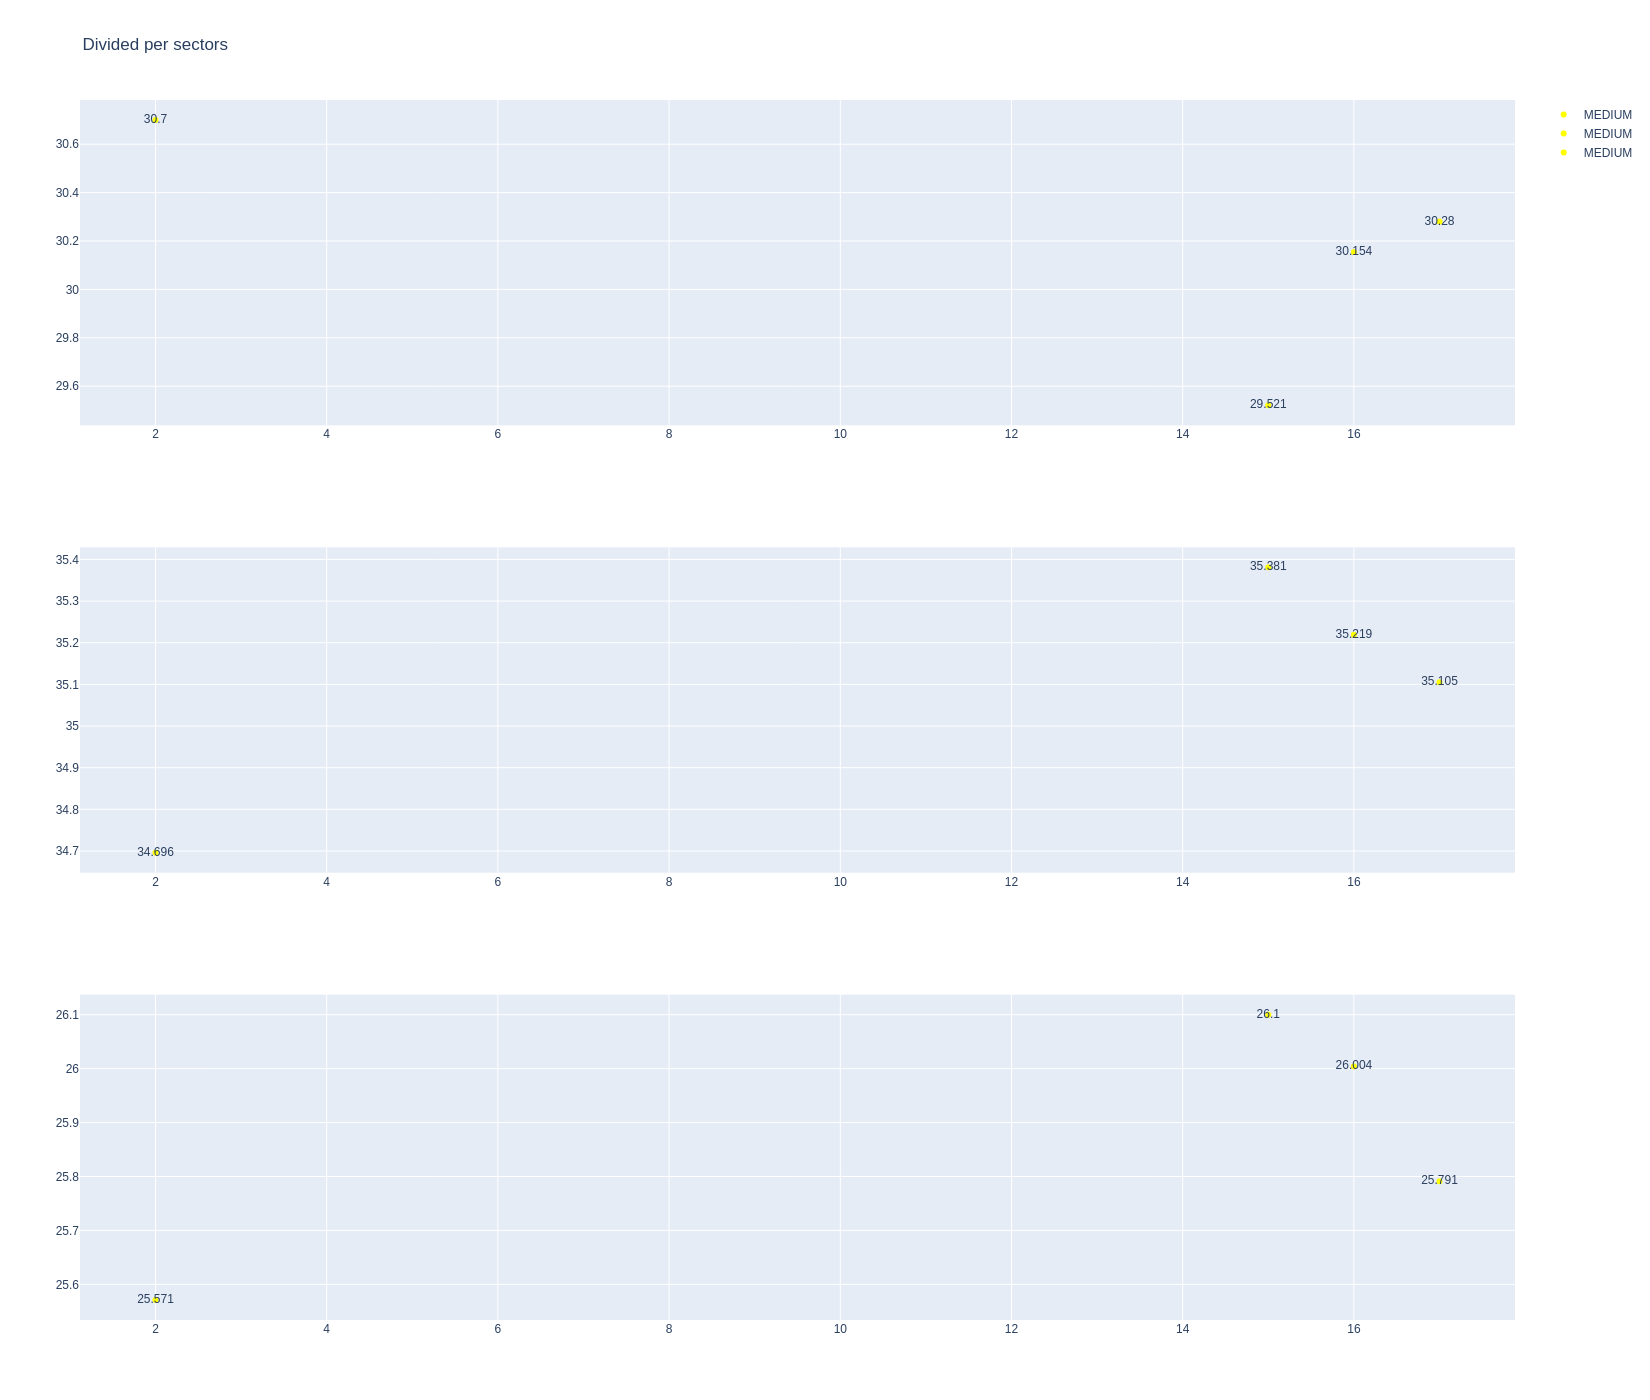

In [125]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [126]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1259        10023             1             12          1        4   
12         1259        10023             1             63          1        9   
25         1259        10023             2             12          5        6   
34         1259        10023             3             12          7       10   
47         1259        10023             2             63         10       27   
48         1259        10023             4             12         11       13   
61         1259        10023             5             12         14       29   

   compound  tyre_age_at_start  
3    MEDIUM                  0  
12   MEDIUM                  0  
25   MEDIUM                  3  
34   MEDIUM                  6  
47   MEDIUM                  0  
48   MEDIUM                  0  
61   MEDIUM                 12

In [127]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
215  George RUSSELL   MEDIUM  2025-05-02T16:59:33.897000+00:00          10   
231  George RUSSELL   MEDIUM  2025-05-02T17:01:04.946000+00:00          11   
251  George RUSSELL   MEDIUM  2025-05-02T17:02:36.612000+00:00          12   
266  George RUSSELL   MEDIUM  2025-05-02T17:04:08.247000+00:00          13   
284  George RUSSELL   MEDIUM  2025-05-02T17:05:40.051000+00:00          14   
301  George RUSSELL   MEDIUM  2025-05-02T17:07:12.234000+00:00          15   
317  George RUSSELL   MEDIUM  2025-05-02T17:08:44.693000+00:00          16   
331  George RUSSELL   MEDIUM  2025-05-02T17:10:16.797000+00:00          17   
342  George RUSSELL   MEDIUM  2025-05-02T17:11:47.983000+00:00          18   
353  George RUSSELL   MEDIUM  2025-05-02T17:13:19.200000+00:00          19   
363  George RUSSELL   MEDIUM  2025-05-02T17:14:50.237000+00:00          20   
370  George RUSSELL   MEDIUM  2025-05-02T17:16:22.255000+00:00          21   
378  George RUSSELL   MEDIUM  2025-05-02T17:17:54.136000+00:00          22   
387  George RUSSELL   MEDIUM  2025-05-02T17:19:25.792000+00:00          23   
397  George RUSSELL   MEDIUM  2025-05-02T17:20:57.993000+00:00          24   
412  George RUSSELL   MEDIUM  2025-05-02T17:22:29.251000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
215             30.343             34.816             25.922        91.081  
231             30.819             34.926             25.917        91.662  
251             30.598             35.012             25.955        91.565  
266             30.760             35.343             25.727        91.830  
284             31.014             35.296             25.820        92.130  
301             31.313             35.261             25.905        92.479  
317             31.158             35.190             25.738        92.086  
331             30.620             34.877             25.735        91.232  
342             30.620             34.810             25.763        91.193  
353             30.650             34.783             25.717        91.150  
363             30.534             35.278             26.101        91.913  
370             30.927             35.033             25.973        91.933  
378             30.503             35.005             26.044        91.552  
387             30.475             35.346             25.932        91.753  
397             30.778             35.069             25.962        91.809  
412             30.472             35.061             25.948        91.481

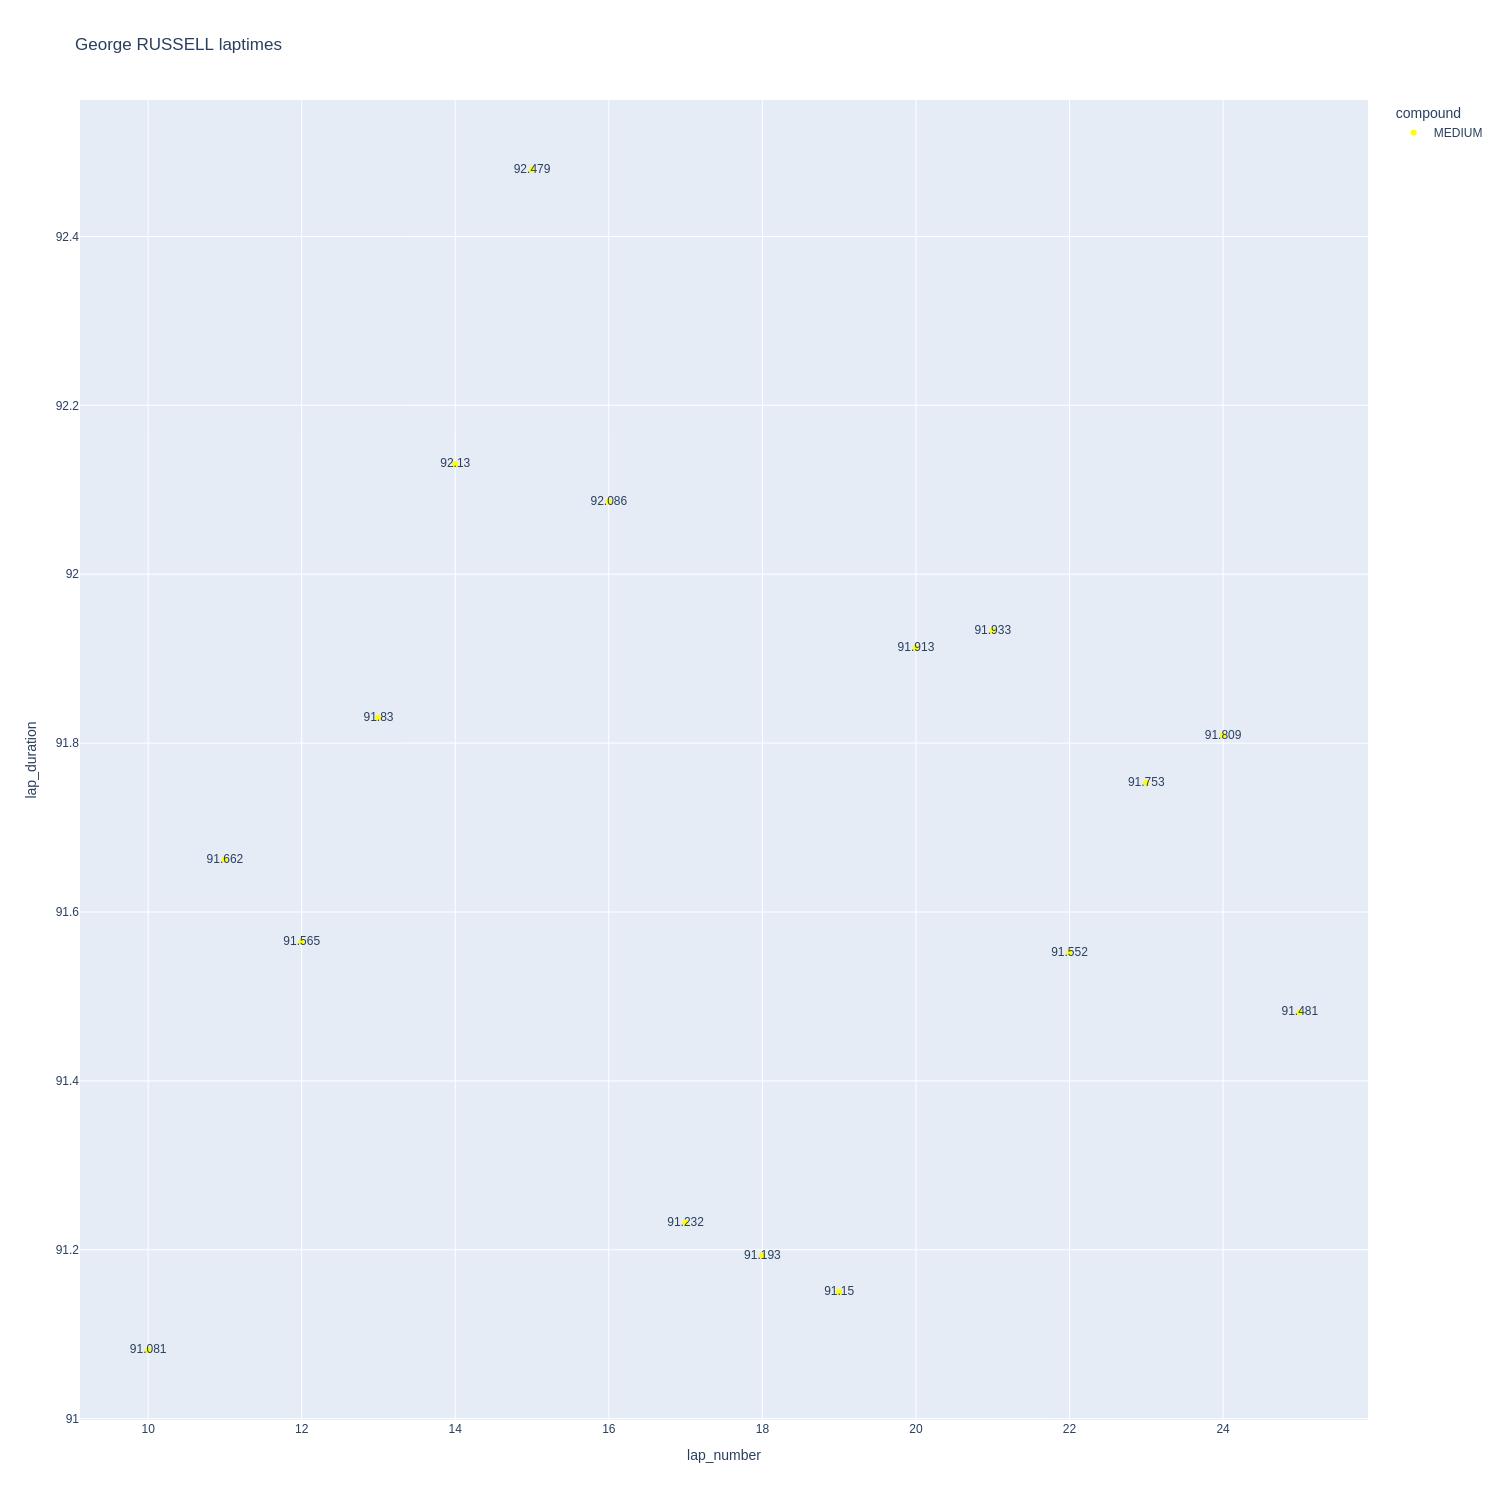

In [128]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

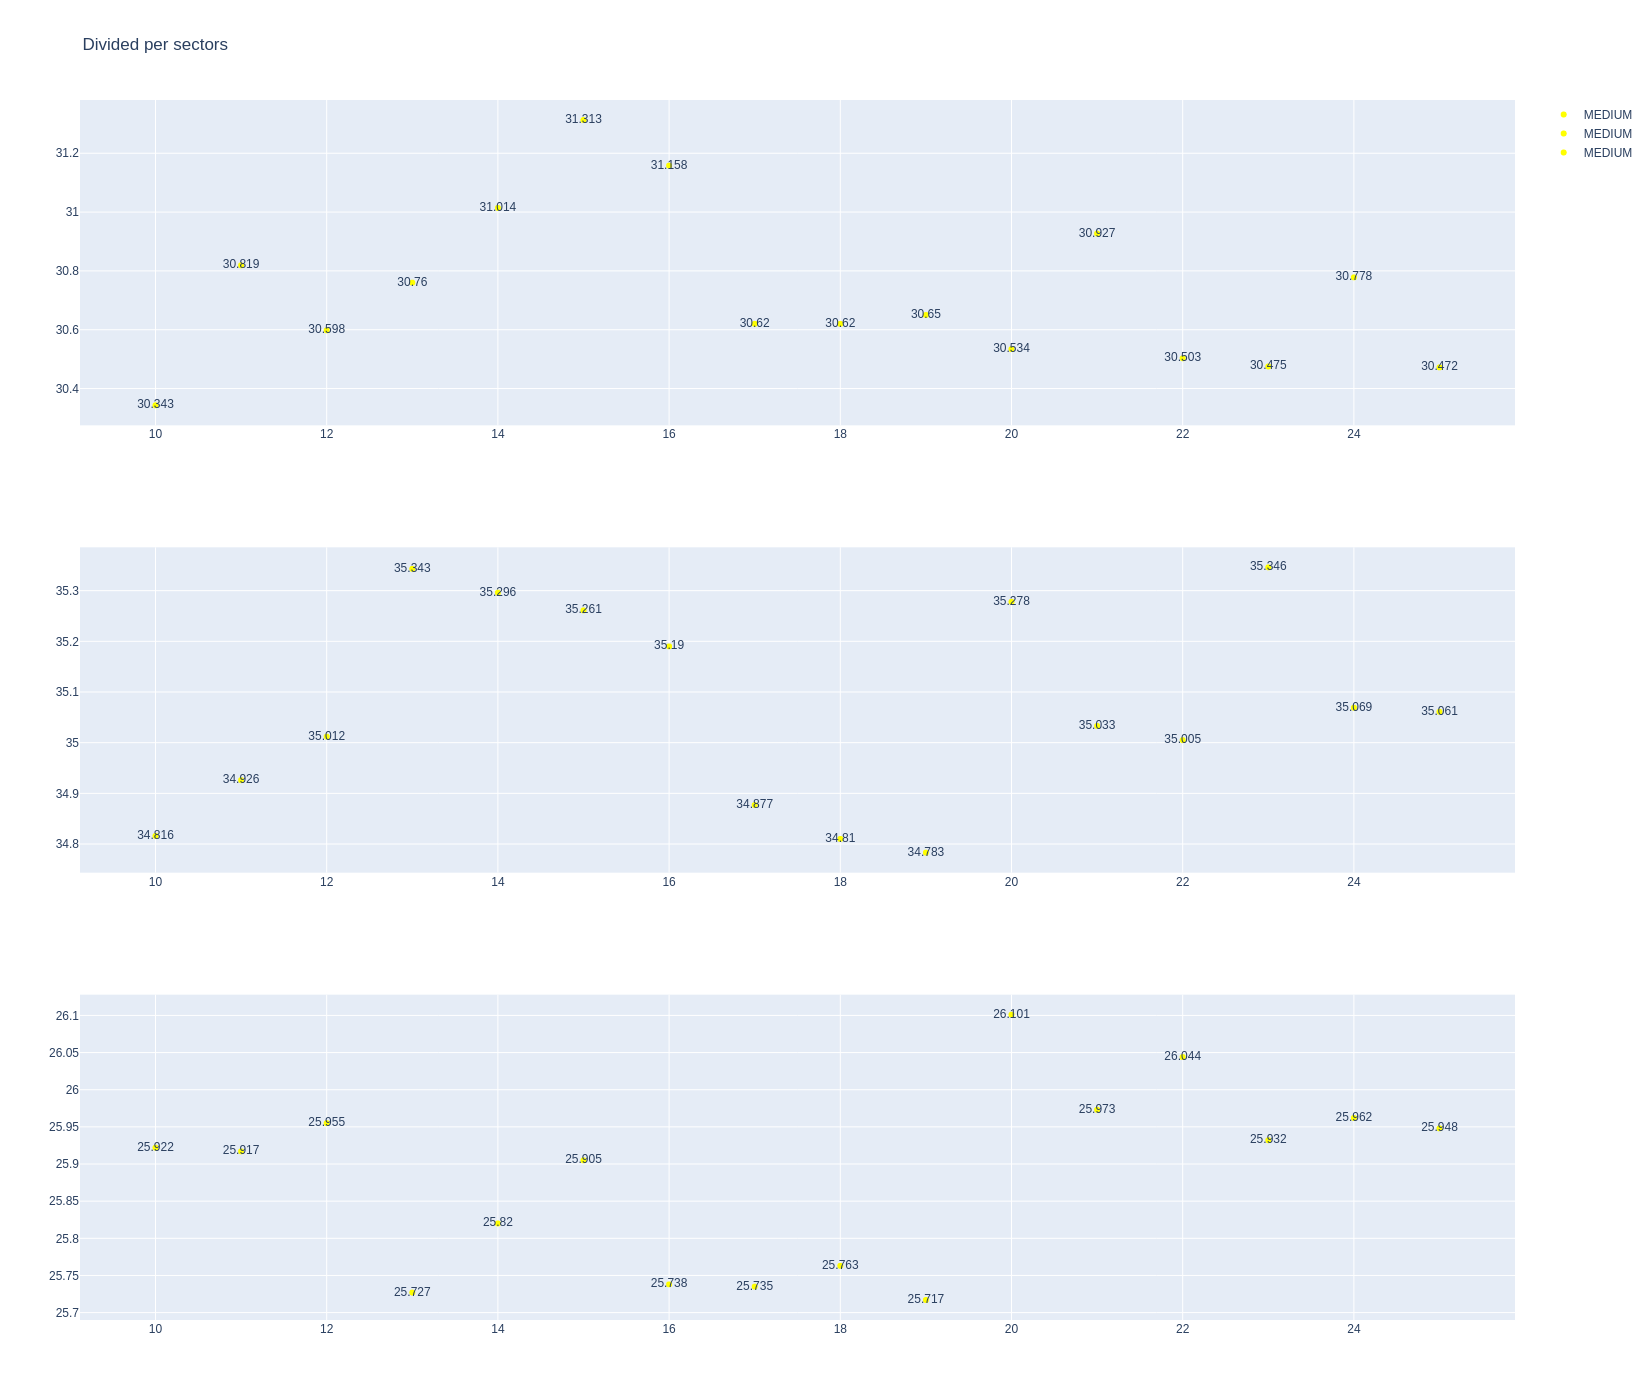

In [129]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [130]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
36   Kimi ANTONELLI   MEDIUM  2025-05-02T16:33:44.203000+00:00           2   
255  Kimi ANTONELLI   MEDIUM  2025-05-02T17:03:18.277000+00:00          14   
273  Kimi ANTONELLI   MEDIUM  2025-05-02T17:04:50.633000+00:00          15   
290  Kimi ANTONELLI   MEDIUM  2025-05-02T17:06:22.386000+00:00          16   
306  Kimi ANTONELLI   MEDIUM  2025-05-02T17:07:54.491000+00:00          17   
322  Kimi ANTONELLI   MEDIUM  2025-05-02T17:09:26.349000+00:00          18   
335  Kimi ANTONELLI   MEDIUM  2025-05-02T17:10:58.423000+00:00          19   
361  Kimi ANTONELLI   MEDIUM  2025-05-02T17:14:15.498000+00:00          21   
368  Kimi ANTONELLI   MEDIUM  2025-05-02T17:15:47.313000+00:00          22   
374  Kimi ANTONELLI   MEDIUM  2025-05-02T17:17:19.250000+00:00          23   
382  Kimi ANTONELLI   MEDIUM  2025-05-02T17:18:50.508000+00:00          24   
392  Kimi ANTONELLI   MEDIUM  2025-05-02T17:20:22.052000+00:00          25   
404  Kimi ANTONELLI   MEDIUM  2025-05-02T17:21:53.580000+00:00          26   
417  Kimi ANTONELLI   MEDIUM  2025-05-02T17:23:25.077000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
36              31.038             34.413             25.496        90.947  
255             31.089             35.131             26.189        92.409  
273             30.564             35.263             25.944        91.771  
290             30.797             35.361             25.989        92.147  
306             30.527             35.272             26.039        91.838  
322             30.848             35.284             25.851        91.983  
335             31.011             35.178             25.971        92.160  
361             30.718             35.222             25.918        91.858  
368             30.641             35.187             26.014        91.842  
374             30.598             34.900             25.837        91.335  
382             30.528             35.070             25.915        91.513  
392             30.621             35.023             25.846        91.490  
404             30.517             35.049             25.842        91.408  
417             30.499             35.235             25.905        91.639

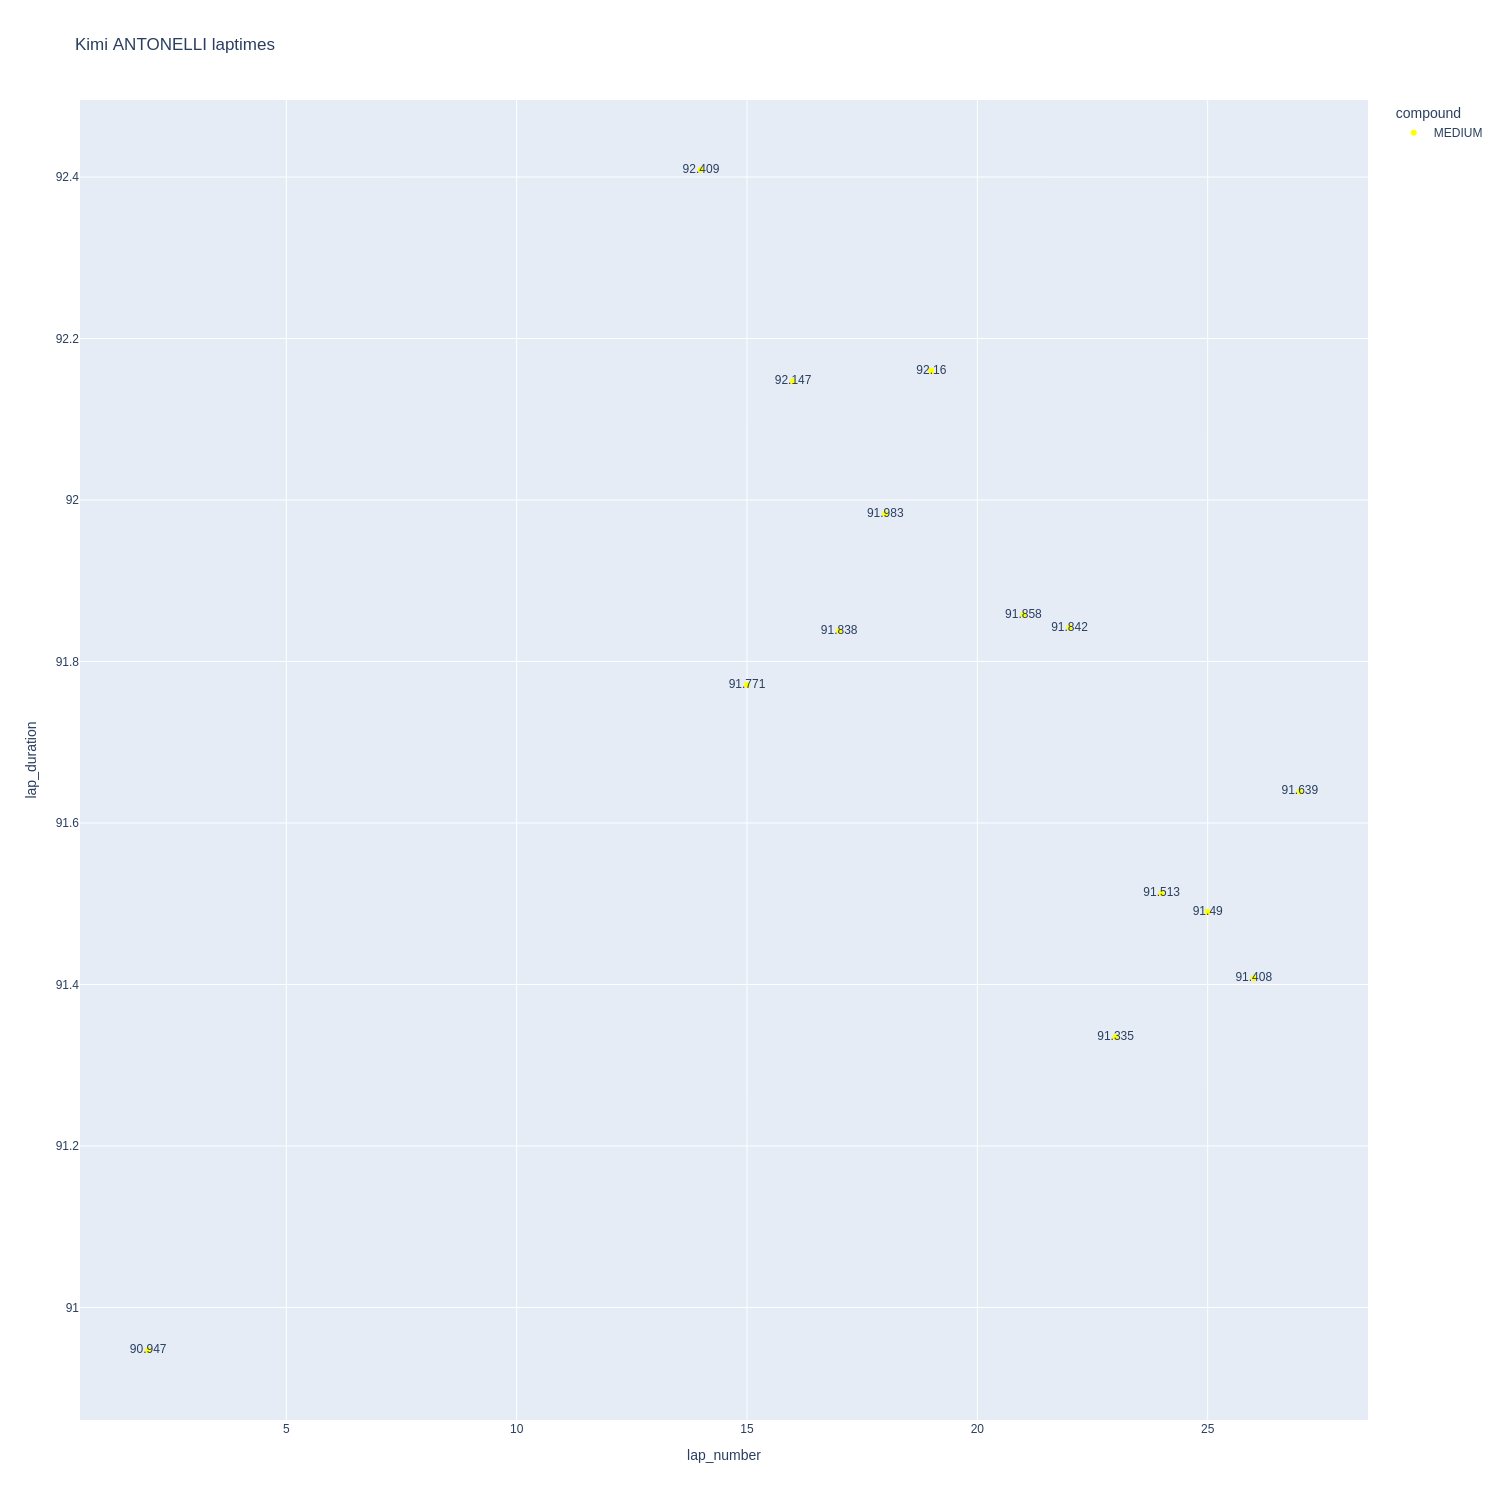

In [131]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

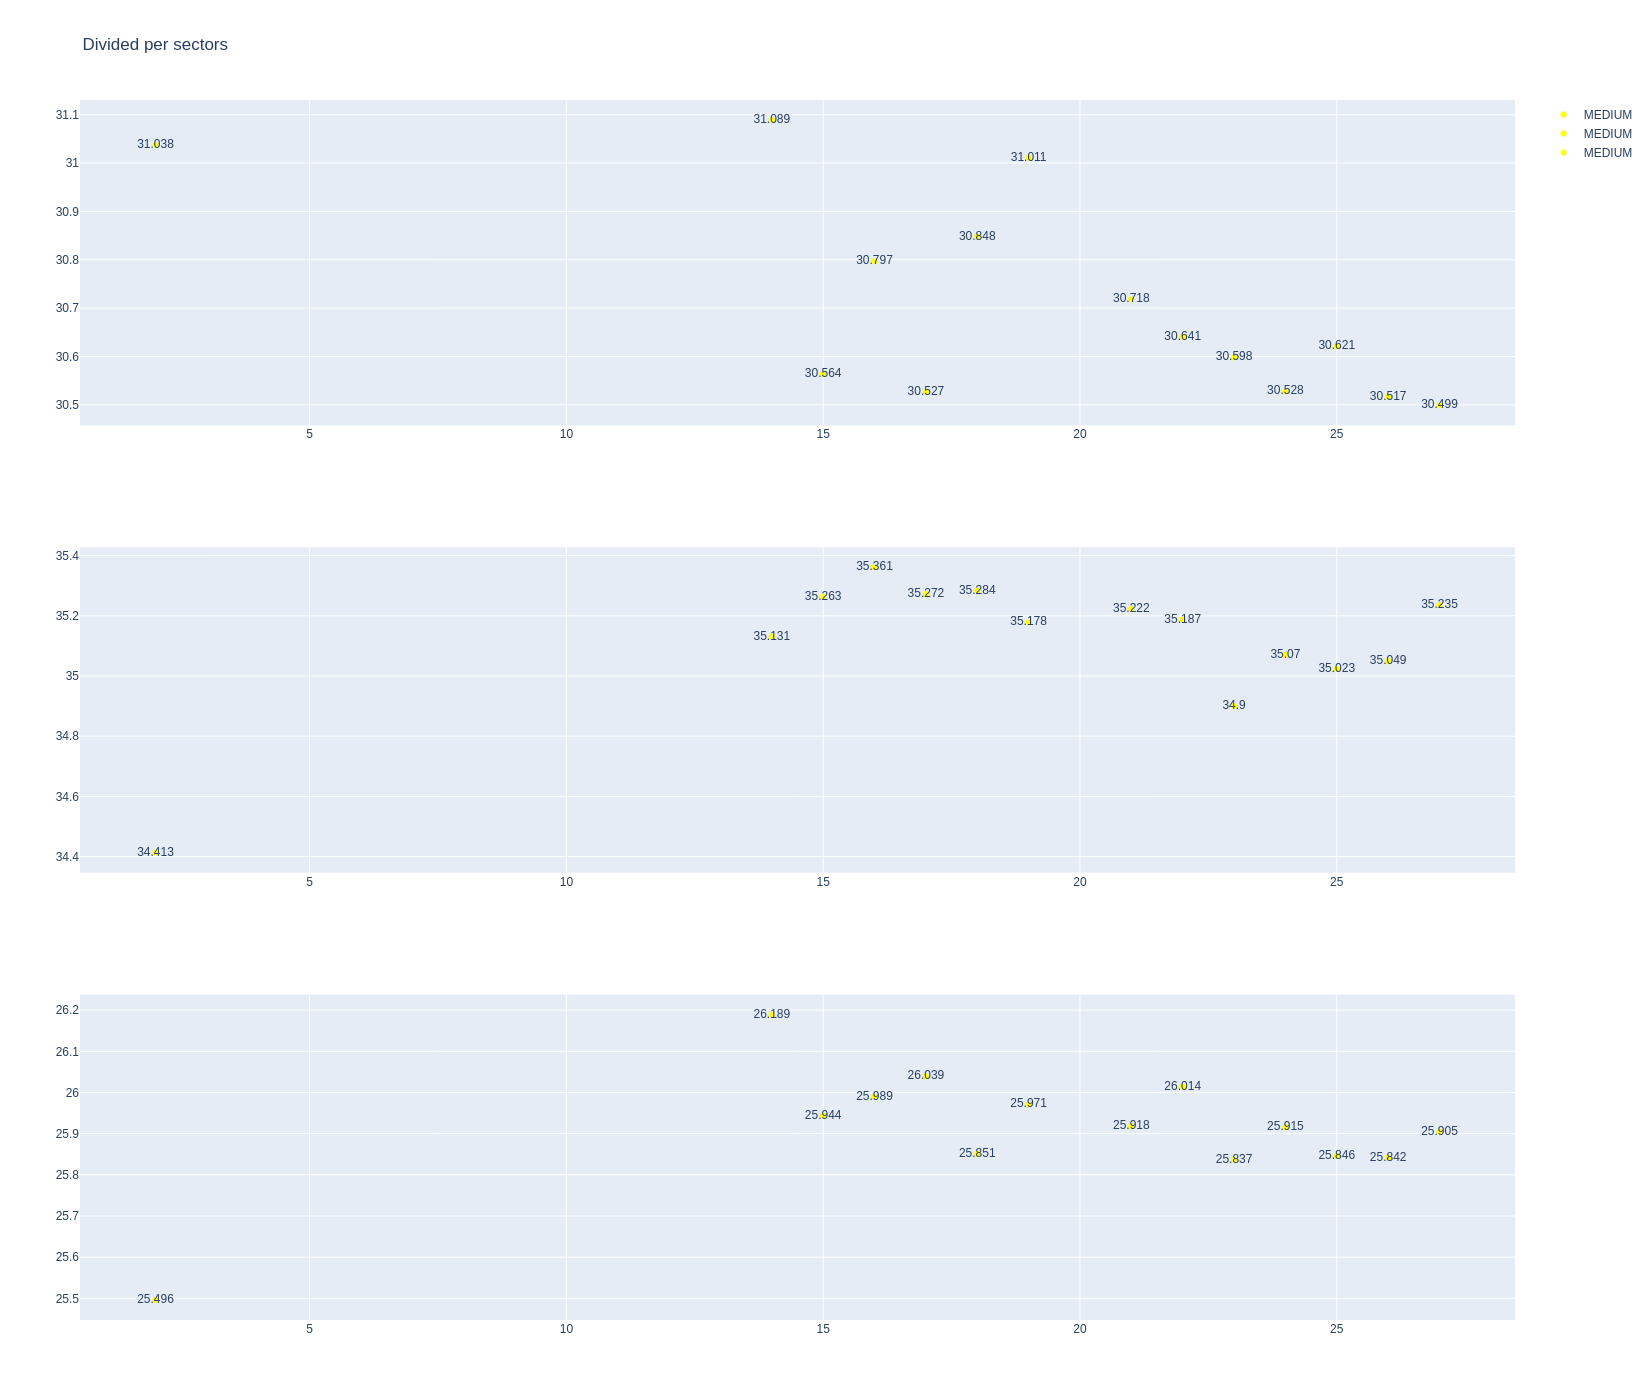

In [132]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [133]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1259        10023             1              4          1        2   
13         1259        10023             1             81          1        9   
22         1259        10023             2              4          3        9   
40         1259        10023             2             81         10       12   
46         1259        10023             3              4         10       19   
57         1259        10023             3             81         13       20   
68         1259        10023             4              4         20       20   
73         1259        10023             5              4         21       22   
75         1259        10023             4             81         21       23   

   compound  tyre_age_at_start  
0    MEDIUM                  0  
13   MEDIUM                  0  
22   MEDIUM                  1  
40   MEDIUM                  8  
46   MEDIUM                  8  
57   MEDIUM                 11  
68     SOFT                 18  
73     SOFT                  0  
75     SOFT                  0

In [134]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
249  Lando NORRIS   MEDIUM  2025-05-02T17:02:27.355000+00:00          12   
316  Lando NORRIS   MEDIUM  2025-05-02T17:08:38.849000+00:00          16   
330  Lando NORRIS   MEDIUM  2025-05-02T17:10:09.937000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
249             29.385             33.729             28.432        91.546  
316             30.473             34.804             25.811        91.088  
330             30.596             34.550             25.777        90.923

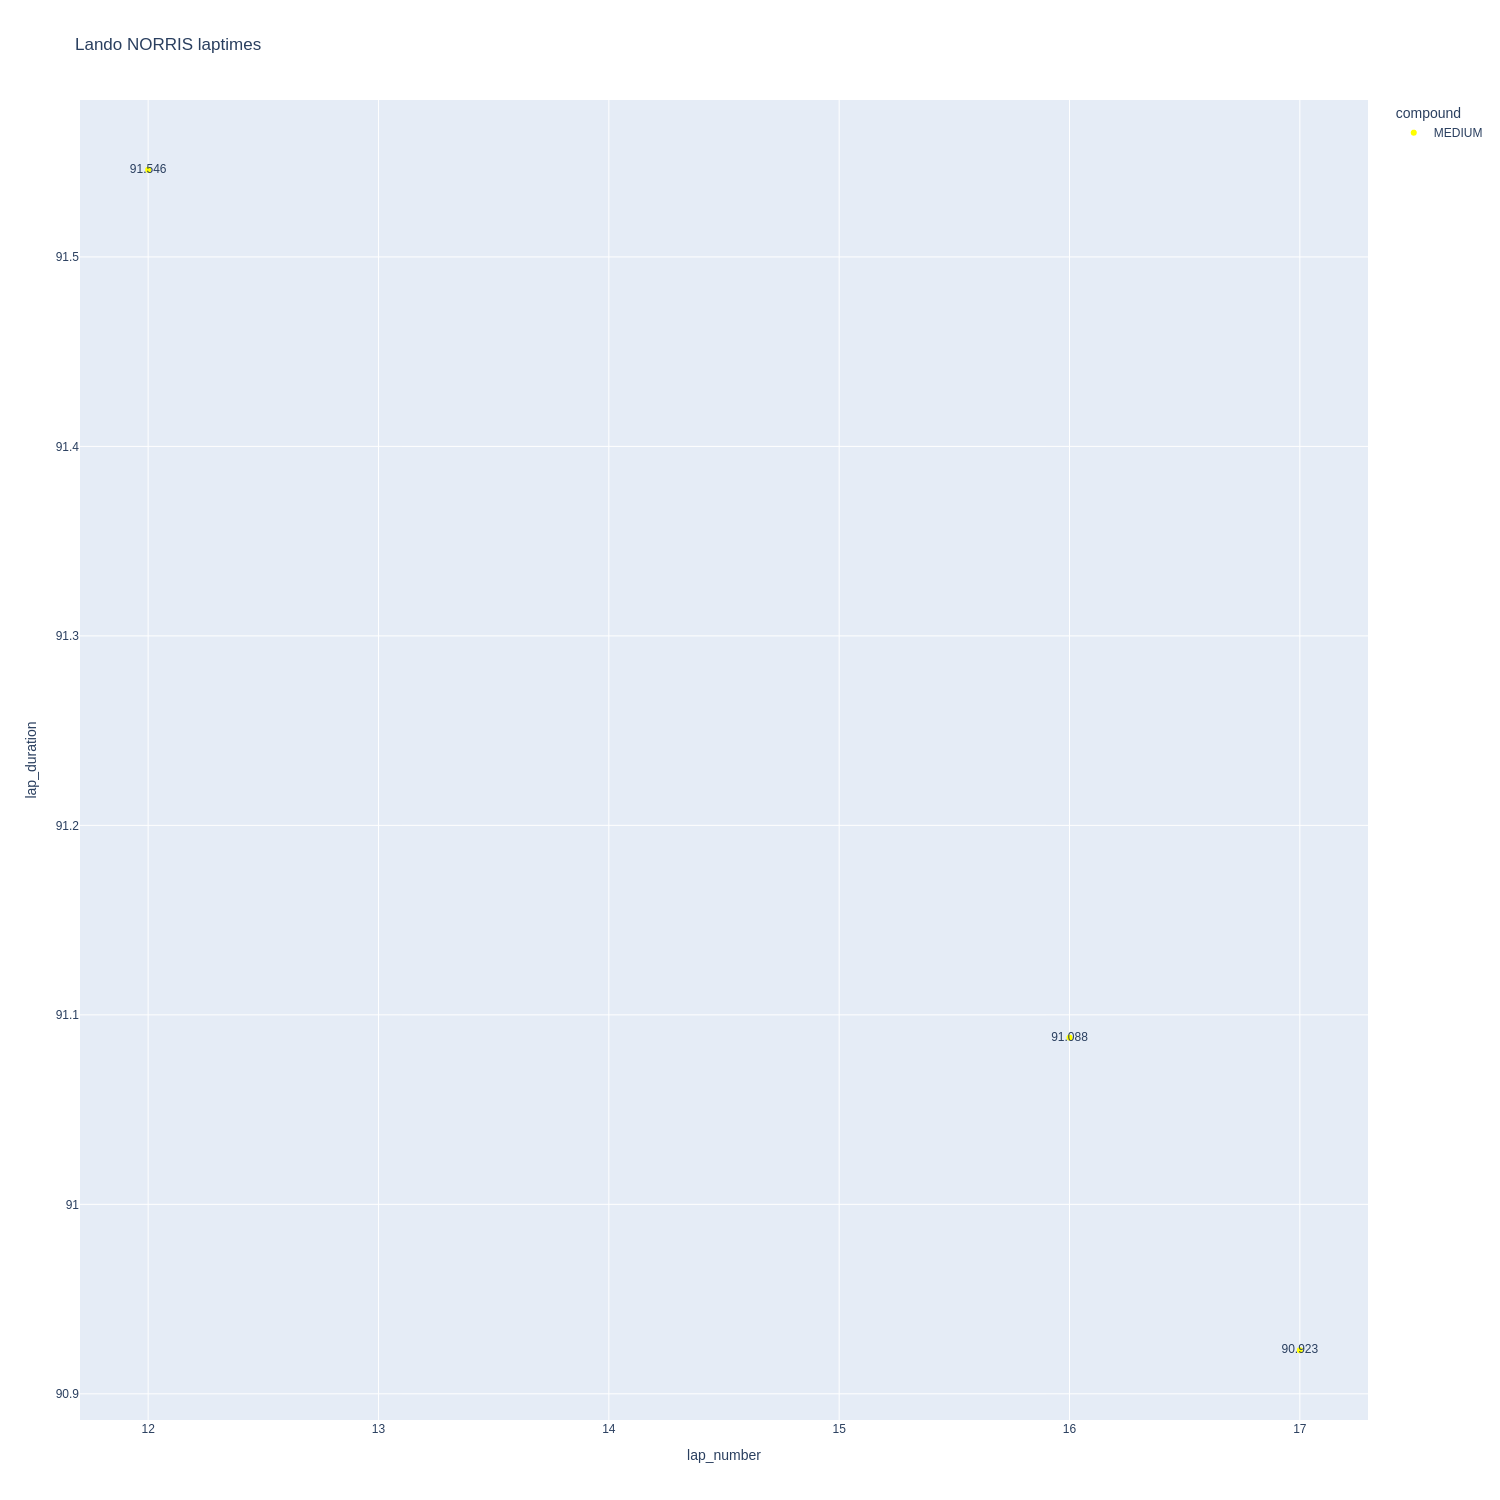

In [135]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

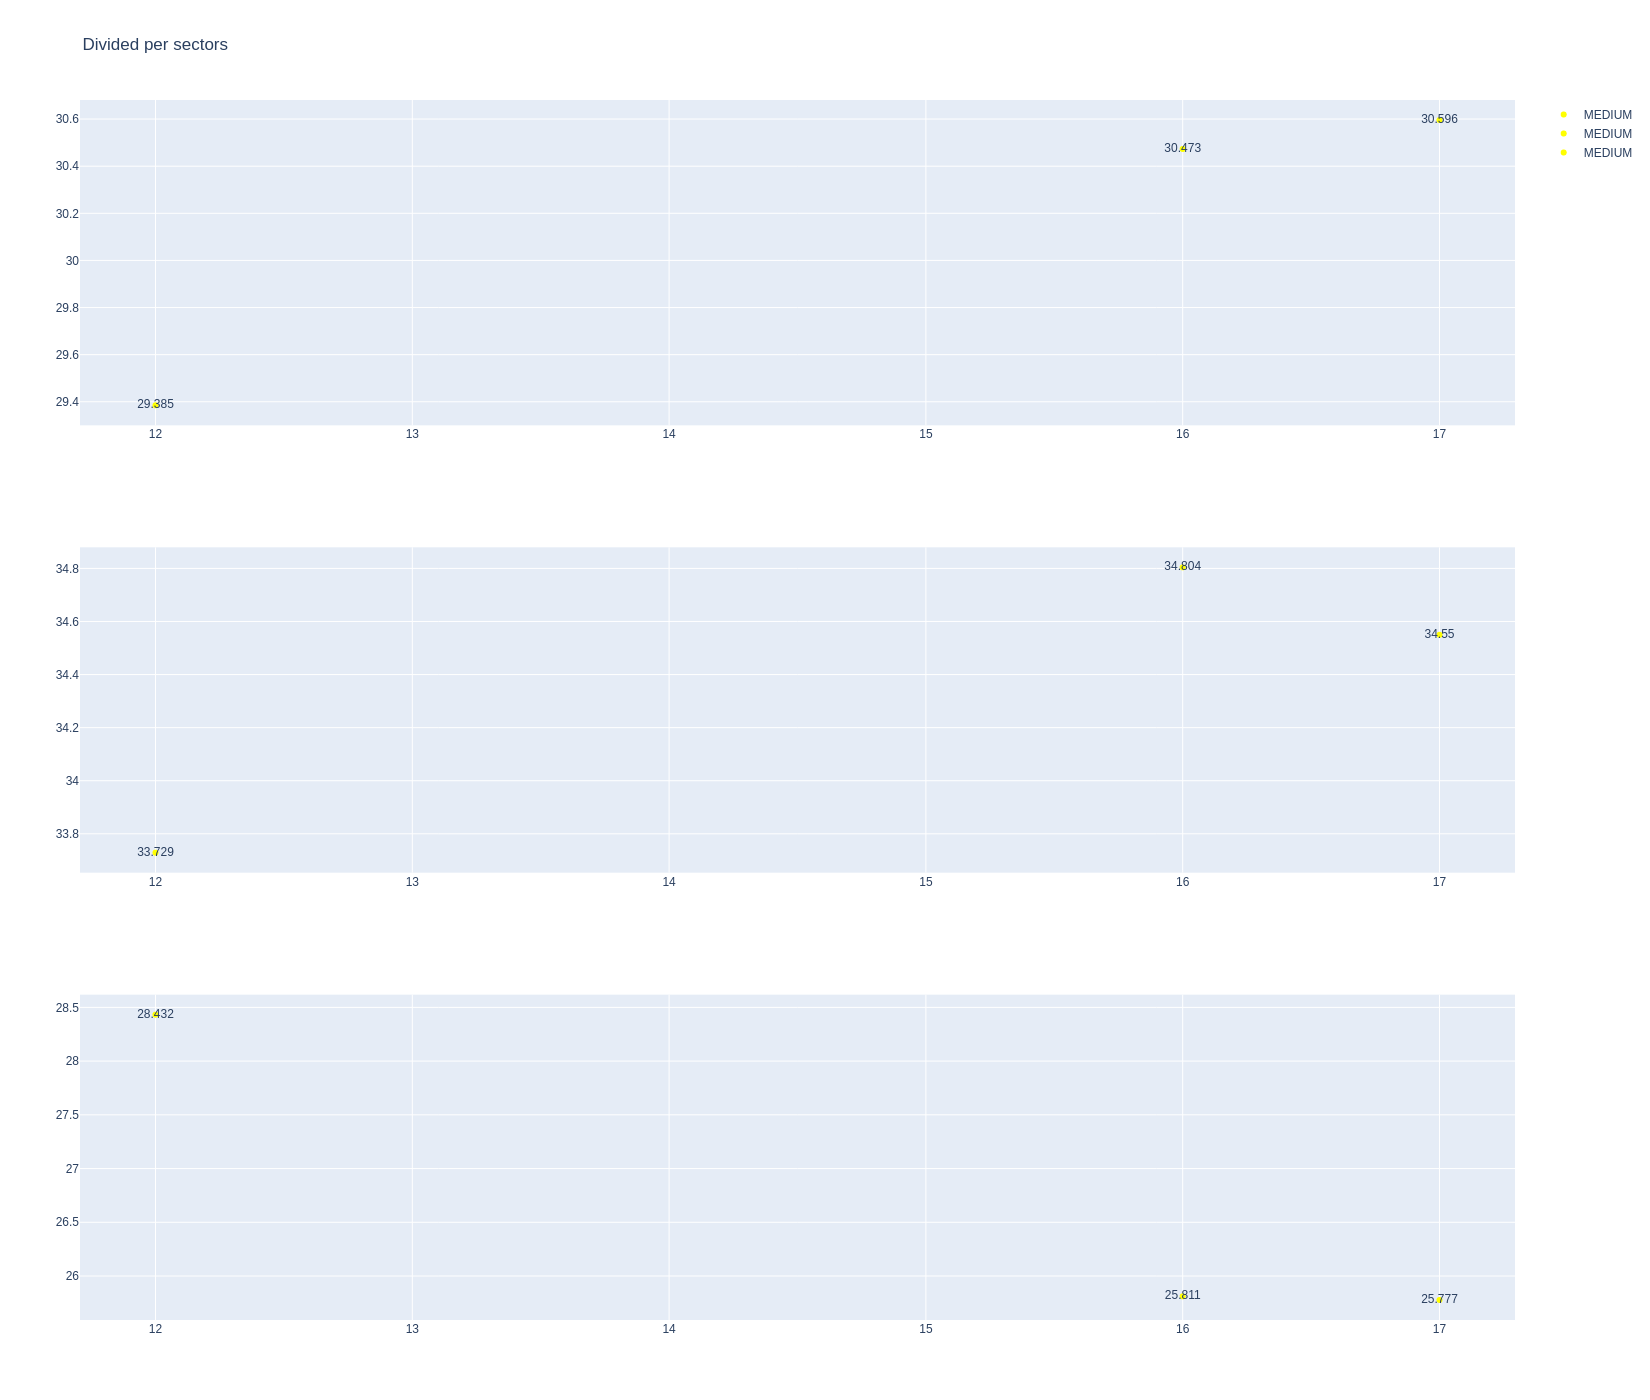

In [136]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [137]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
288  Oscar PIASTRI   MEDIUM  2025-05-02T17:06:14.754000+00:00          14   
304  Oscar PIASTRI   MEDIUM  2025-05-02T17:07:45.998000+00:00          15   
333  Oscar PIASTRI   MEDIUM  2025-05-02T17:10:47.024000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
288             30.708             34.802             25.812        91.322  
304             30.278             34.603             25.673        90.554  
333             30.252             34.566             25.723        90.541

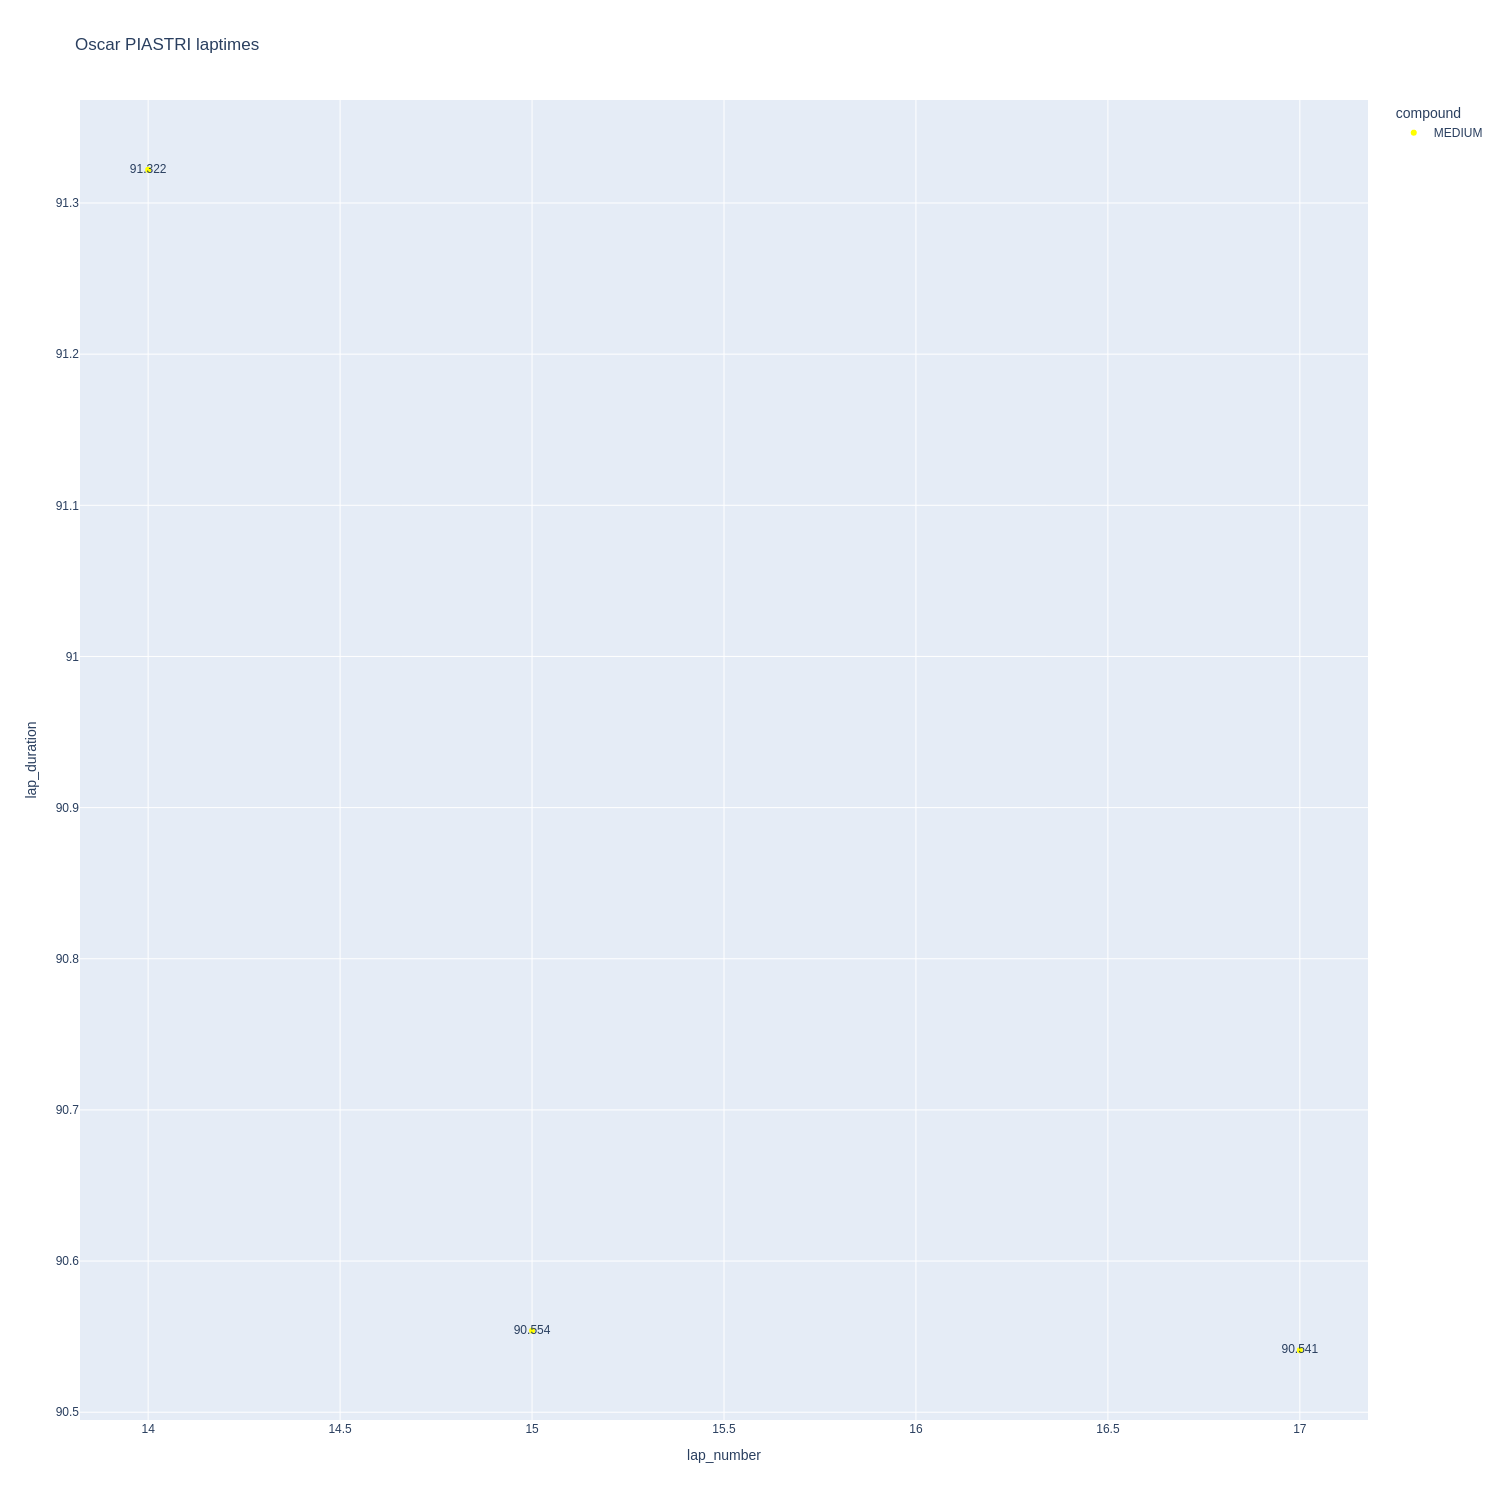

In [138]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

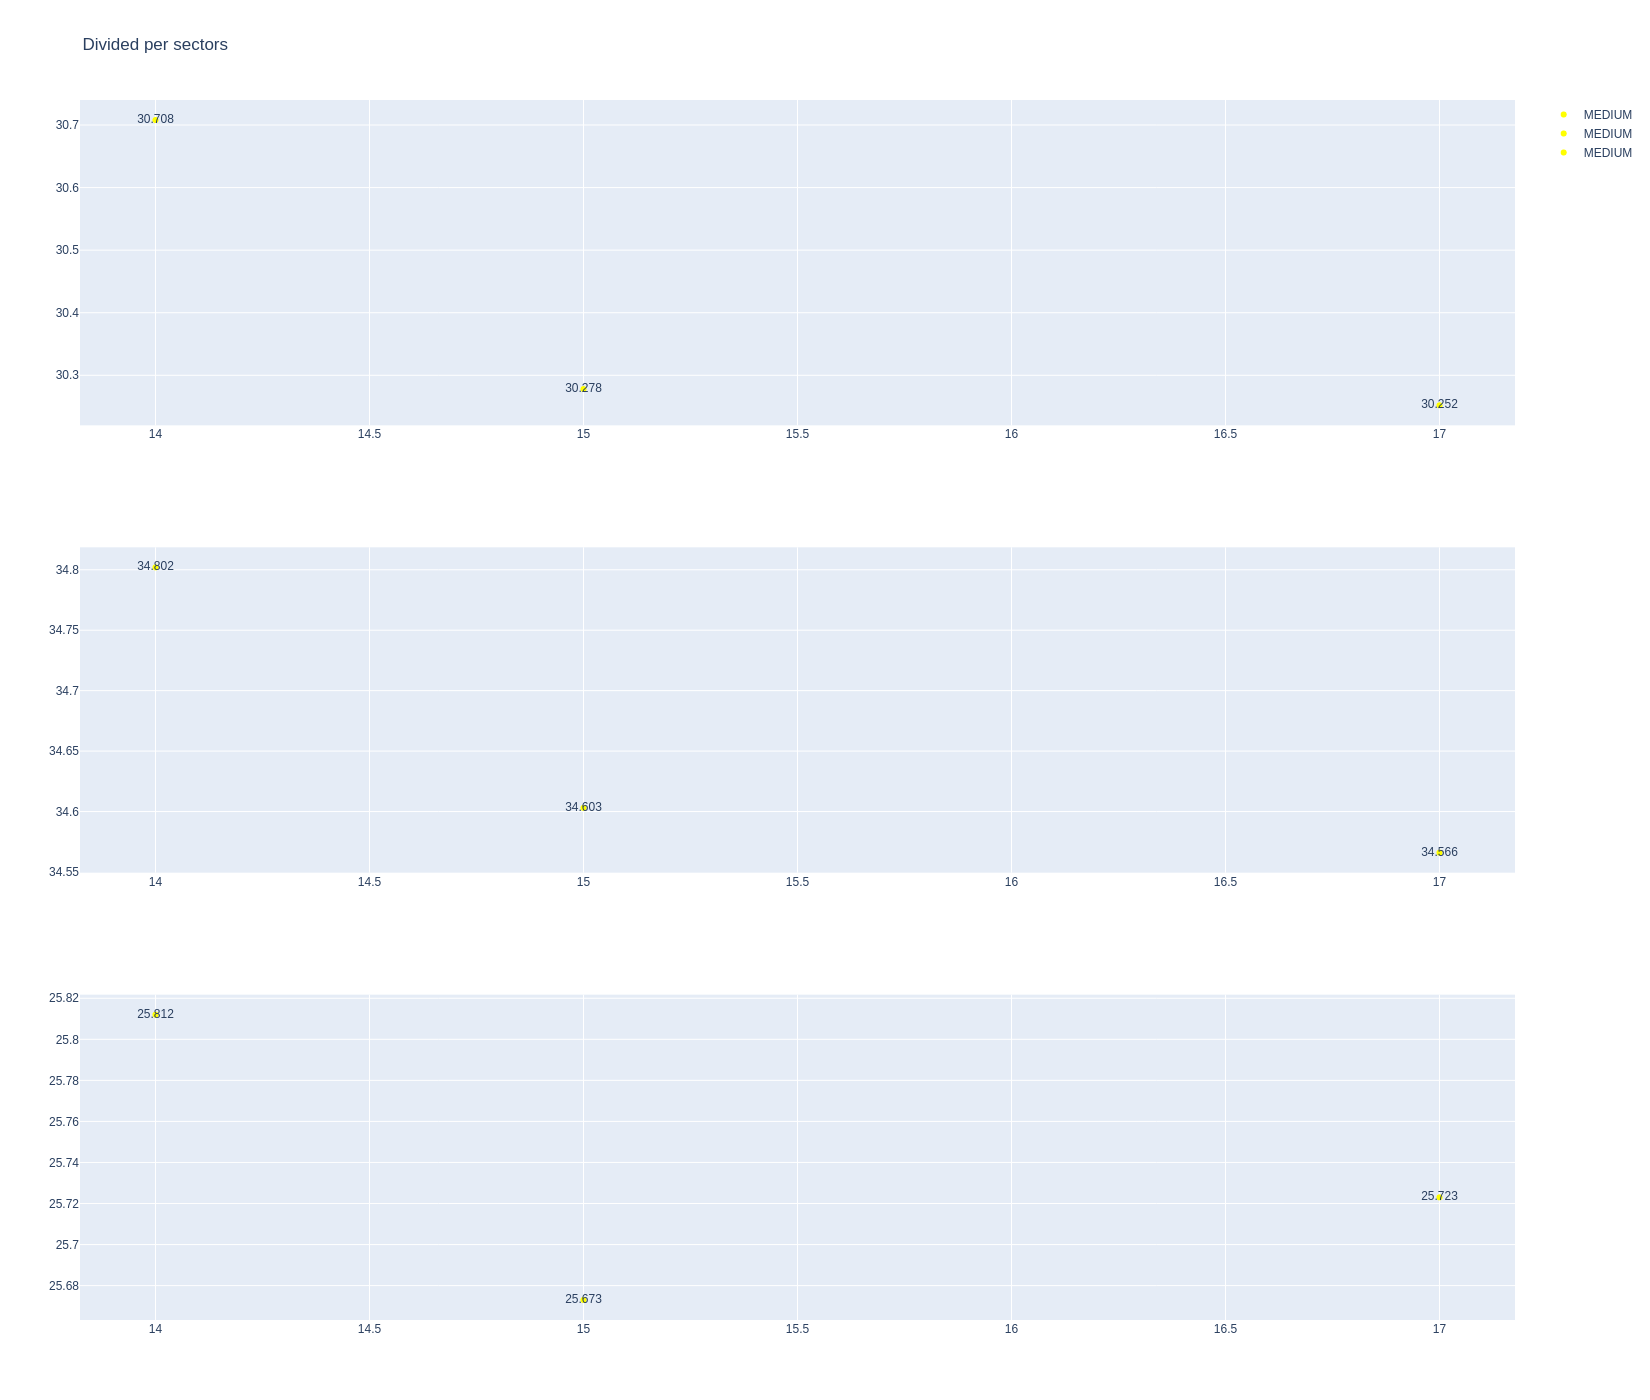

In [139]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [140]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1259        10023             1             14          1        2   
2          1259        10023             1             18          1        2   
20         1259        10023             2             14          3        3   
21         1259        10023             2             18          3        3   
23         1259        10023             3             14          4        4   
24         1259        10023             3             18          4        4   
27         1259        10023             4             14          5        9   
28         1259        10023             4             18          5        9   
41         1259        10023             5             14         10       17   
43         1259        10023             5             18         10       18   
63         1259        10023             6             14         18       20   
66         1259        10023             6             18         19       22   
71         1259        10023             7             14         20       25   

   compound  tyre_age_at_start  
1      HARD                  0  
2      HARD                  0  
20   MEDIUM                  0  
21   MEDIUM                  0  
23     SOFT                  0  
24     SOFT                  0  
27   MEDIUM                  0  
28   MEDIUM                  0  
41   MEDIUM                  5  
43   MEDIUM                  5  
63   MEDIUM                  0  
66     SOFT                  0  
71     SOFT                  0

In [141]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
190  Fernando ALONSO   MEDIUM  2025-05-02T16:55:17.446000+00:00          12   
197  Fernando ALONSO   MEDIUM  2025-05-02T16:56:49.482000+00:00          13   
205  Fernando ALONSO   MEDIUM  2025-05-02T16:58:21.553000+00:00          14   
220  Fernando ALONSO   MEDIUM  2025-05-02T16:59:53.609000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
190             30.770             35.148             26.080        91.998  
197             30.881             35.312             25.881        92.074  
205             30.778             35.322             25.935        92.035  
220             30.721             35.516             26.004        92.241

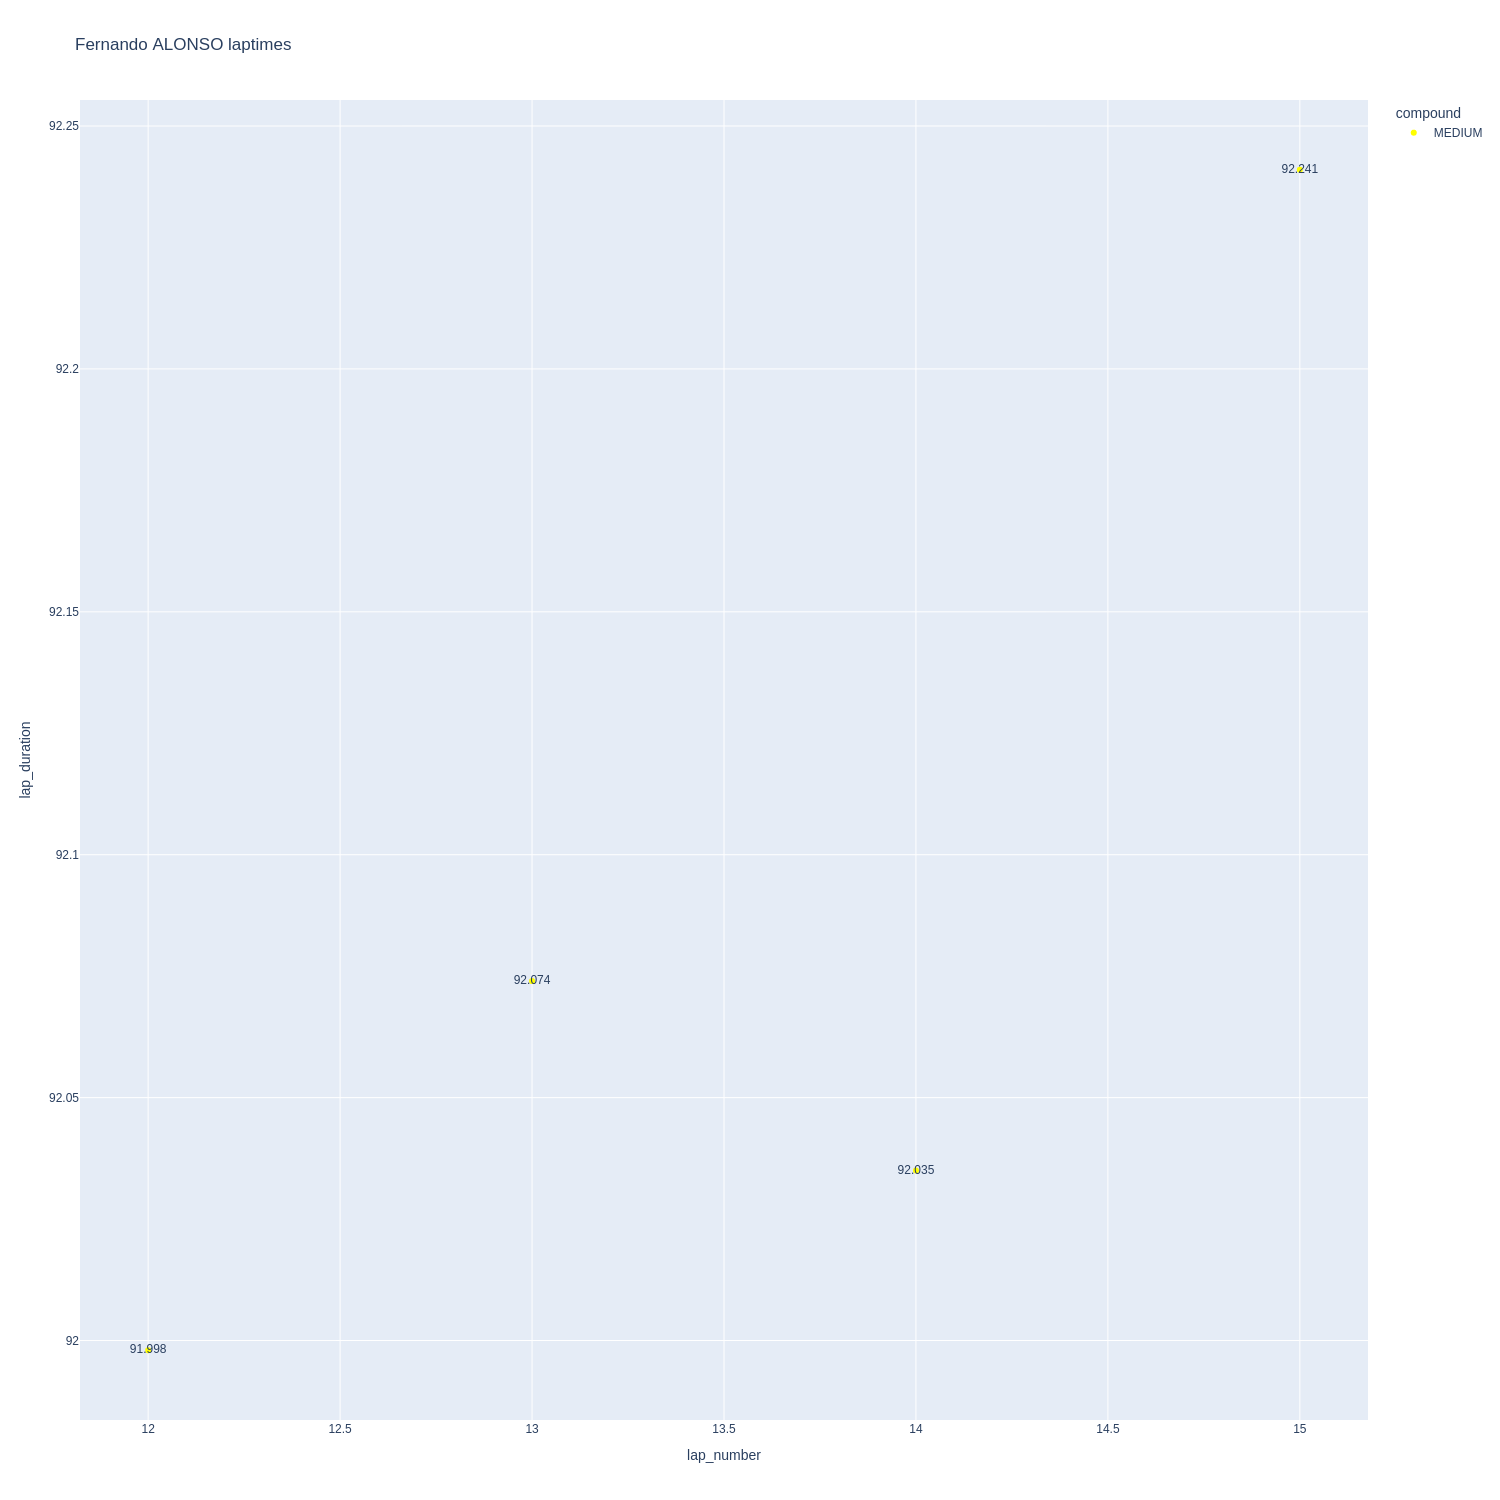

In [142]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

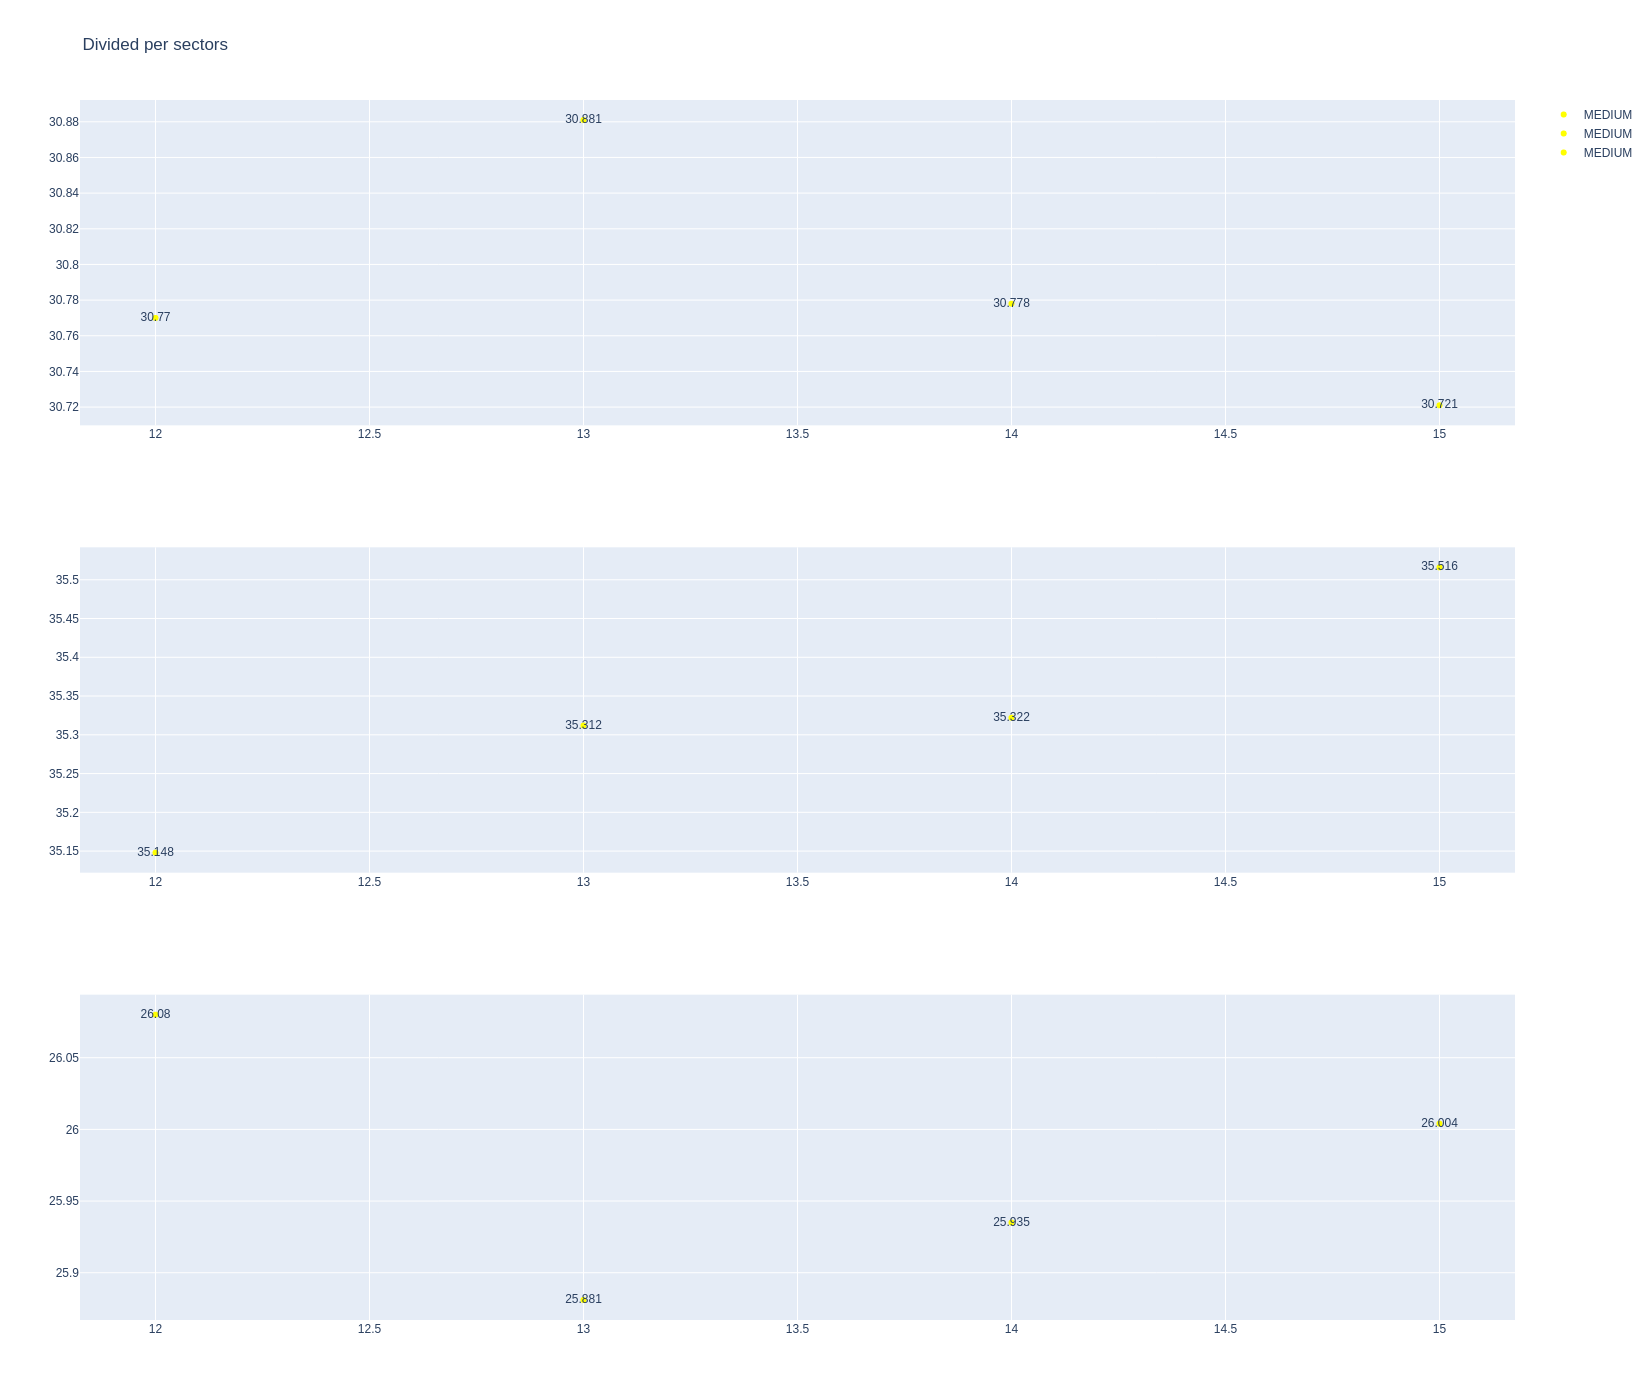

In [143]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [144]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
210  Lance STROLL   MEDIUM  2025-05-02T16:58:48.576000+00:00          14   
223  Lance STROLL   MEDIUM  2025-05-02T17:00:20.184000+00:00          15   
238  Lance STROLL   MEDIUM  2025-05-02T17:01:52.291000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
210             30.219             35.140             26.259        91.618  
223             30.764             35.502             25.770        92.036  
238             30.382             35.231             25.771        91.384

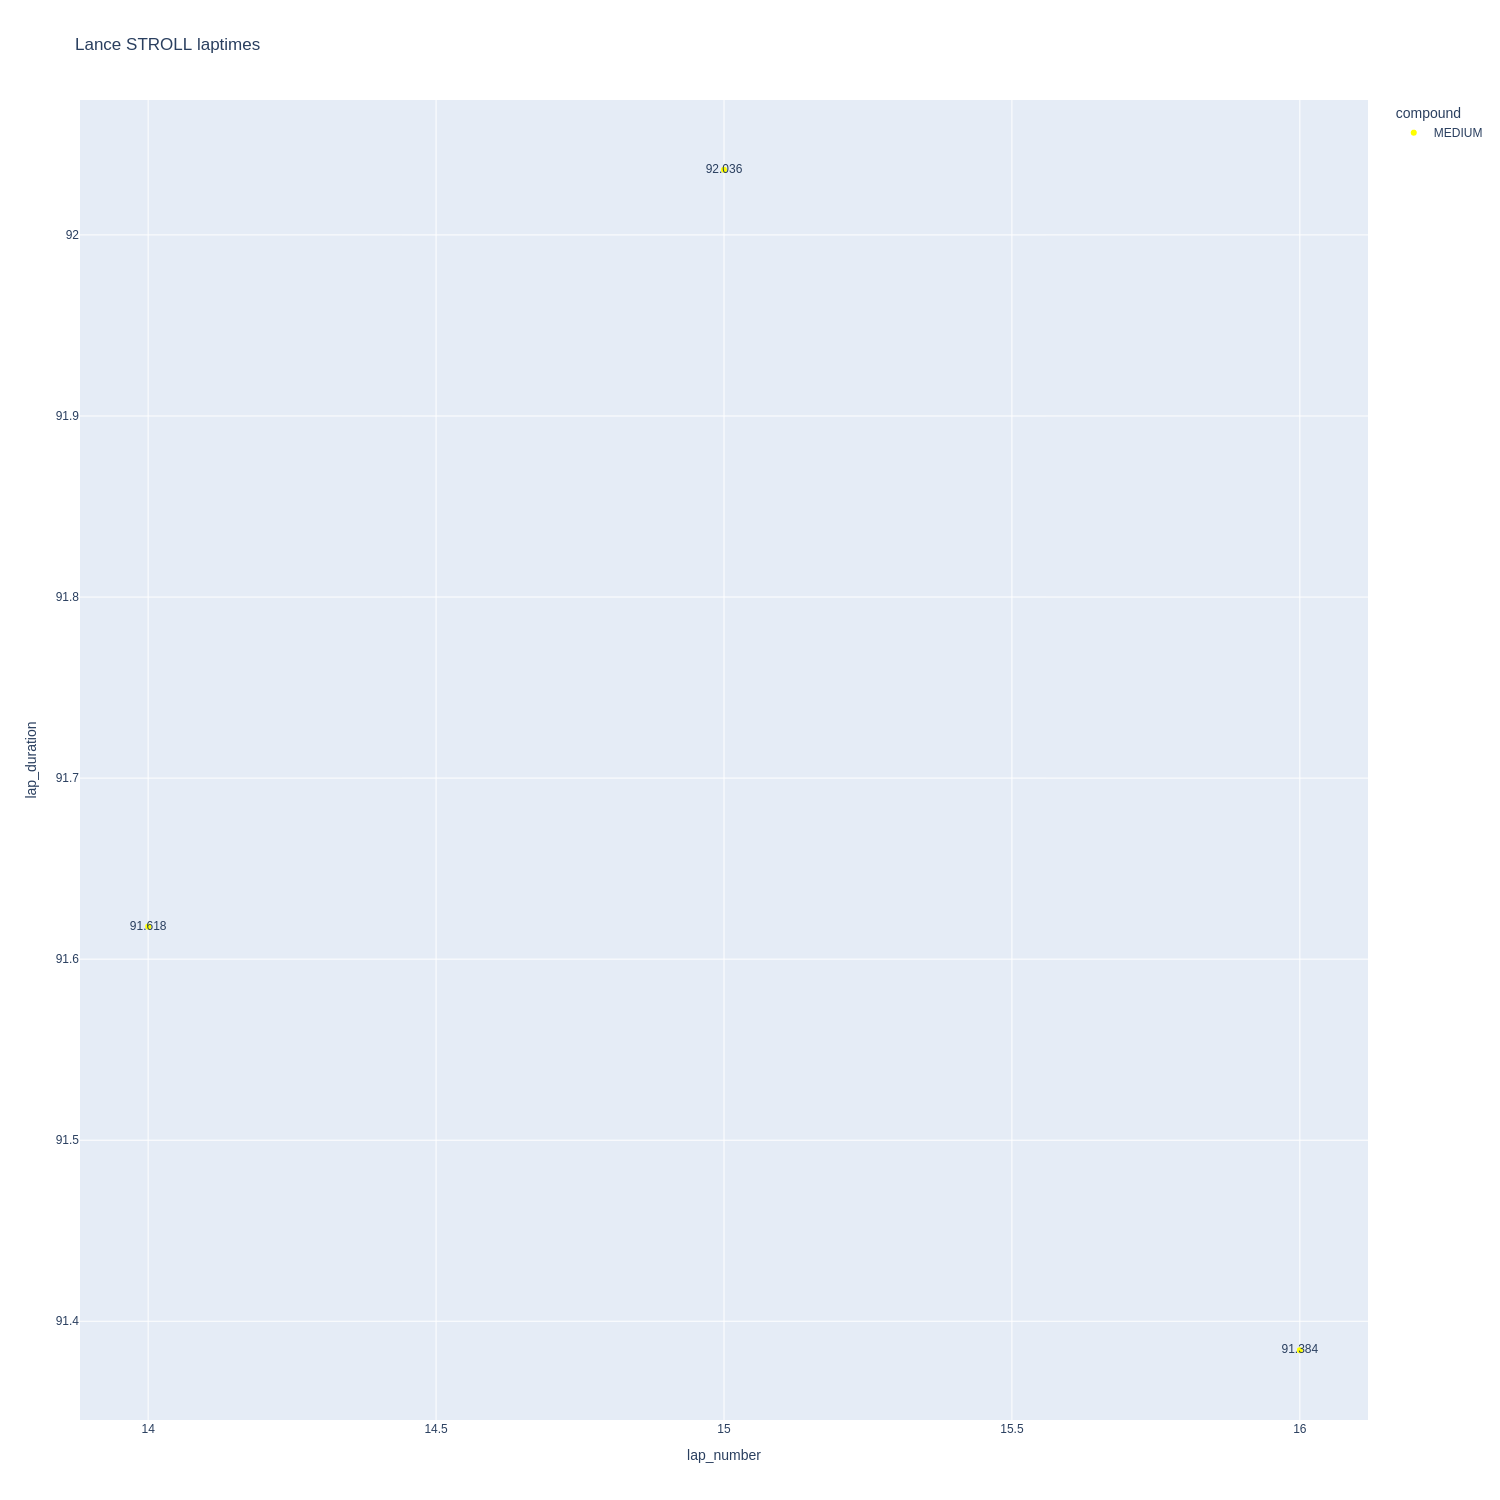

In [145]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

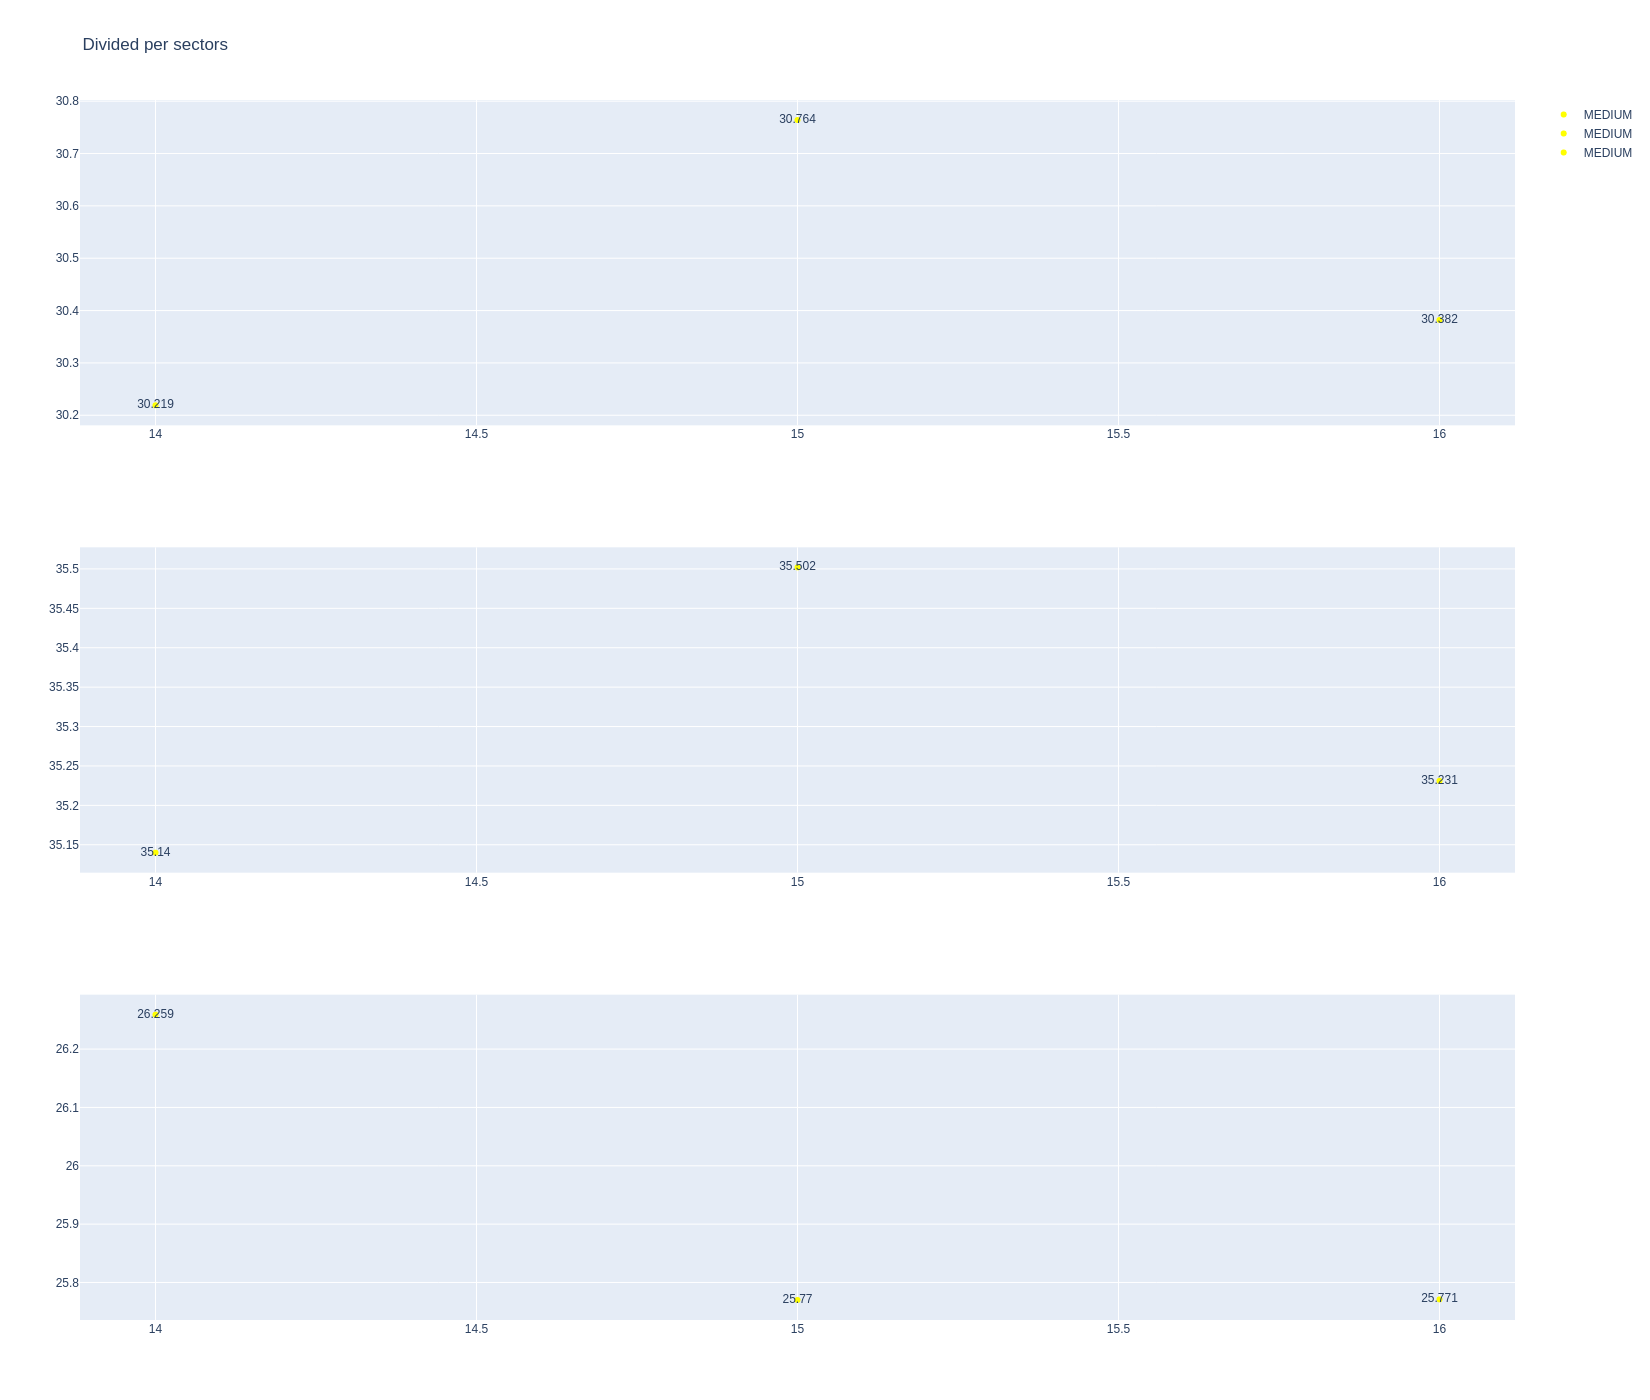

In [146]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Racing Bulls

In [147]:
stintInformation.query('driver_number == 6 or driver_number == 30')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
16         1259        10023             1             30          1       11   
17         1259        10023             1              6          1       12   
52         1259        10023             2             30         12       19   
58         1259        10023             2              6         13       21   
70         1259        10023             3             30         20       22   
78         1259        10023             3              6         22       24   

   compound  tyre_age_at_start  
16     HARD                  0  
17     HARD                  0  
52     HARD                 10  
58     HARD                  0  
70     SOFT                  0  
78     SOFT                  0

In [148]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
25   Isack HADJAR     HARD  2025-05-02T16:32:42.039000+00:00           2   
247  Isack HADJAR     HARD  2025-05-02T17:02:14.869000+00:00          16   
260  Isack HADJAR     HARD  2025-05-02T17:03:47.233000+00:00          17   
278  Isack HADJAR     HARD  2025-05-02T17:05:19.608000+00:00          18   
296  Isack HADJAR     HARD  2025-05-02T17:06:52.074000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
25              30.748             34.907             25.977        91.632  
247             30.906             35.305             26.194        92.405  
260             30.744             35.461             26.084        92.289  
278             30.903             35.431             26.128        92.462  
296             30.934             35.683             26.280        92.897

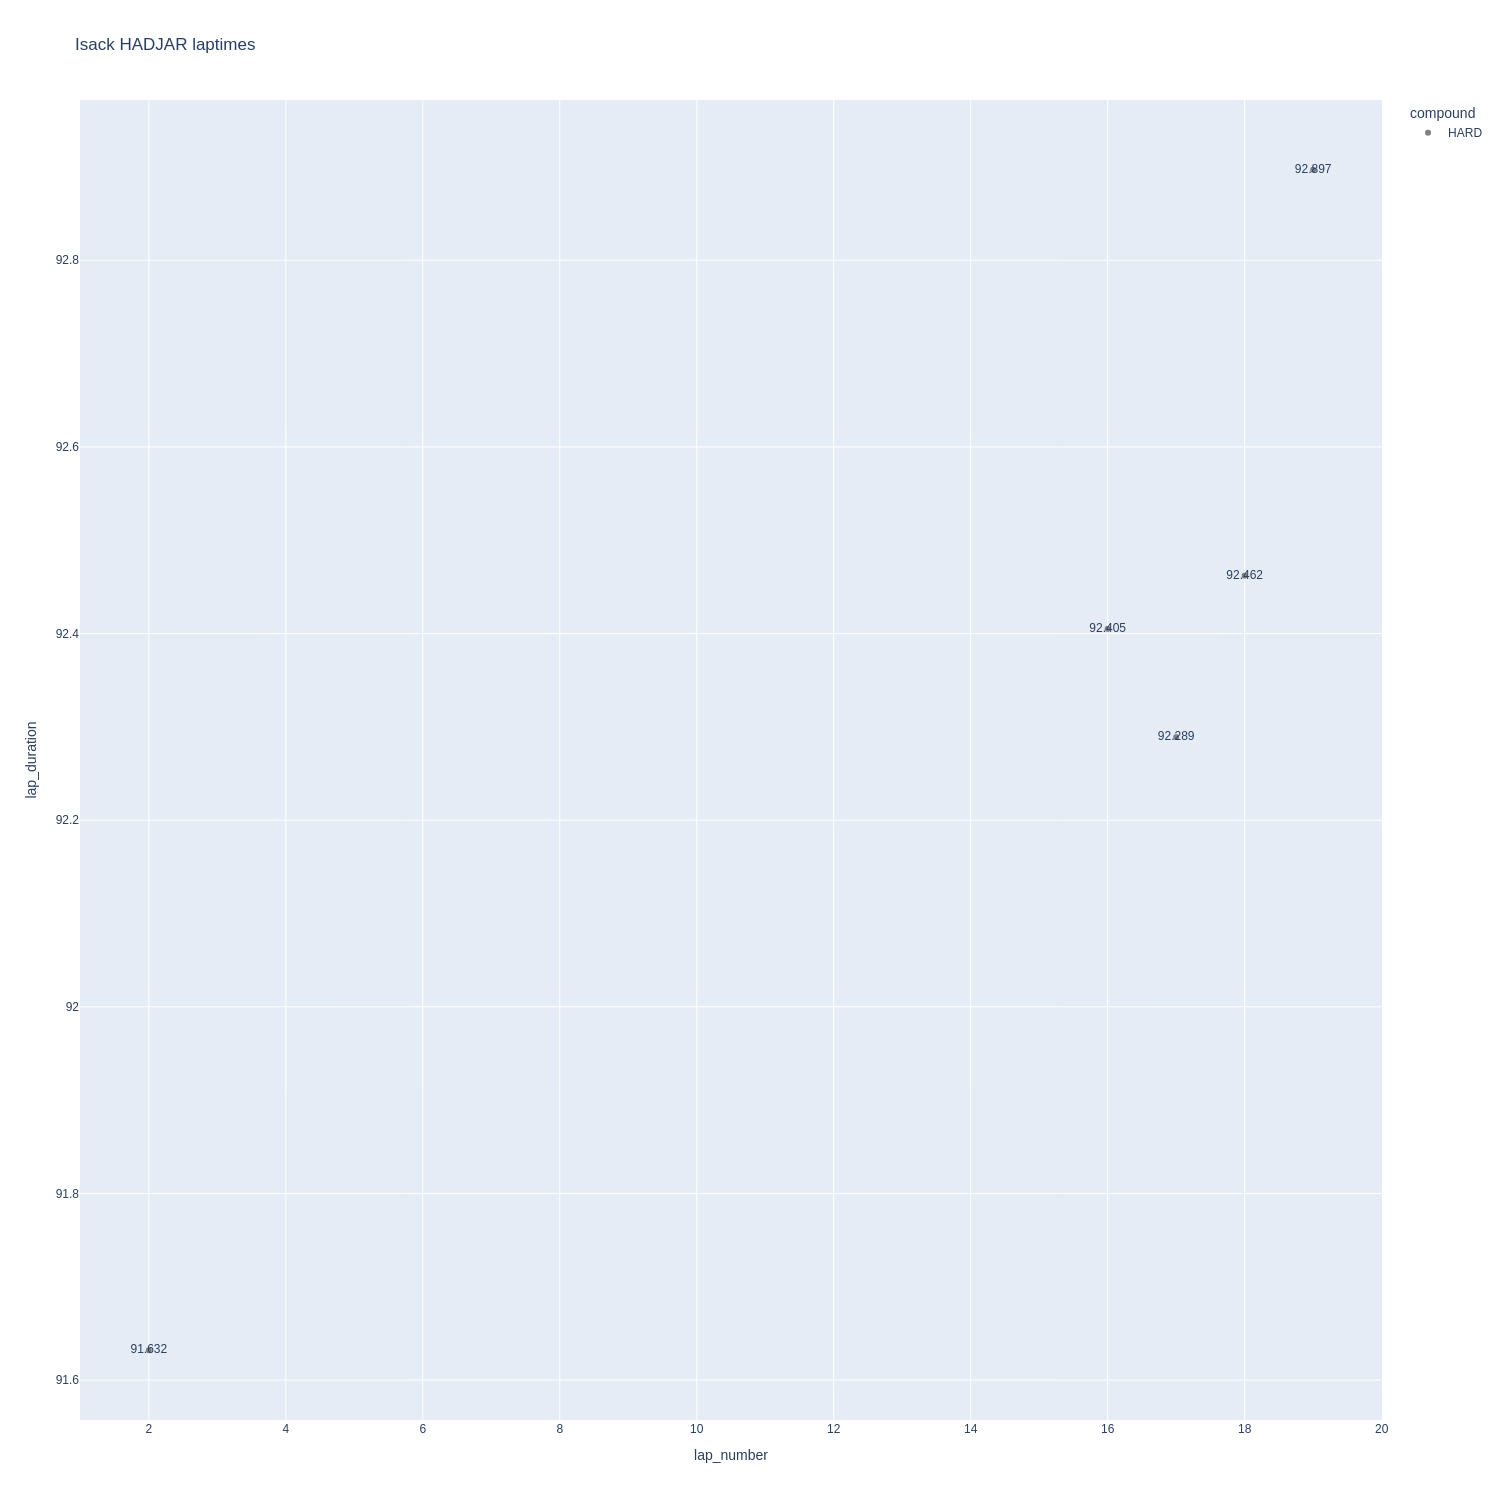

In [149]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

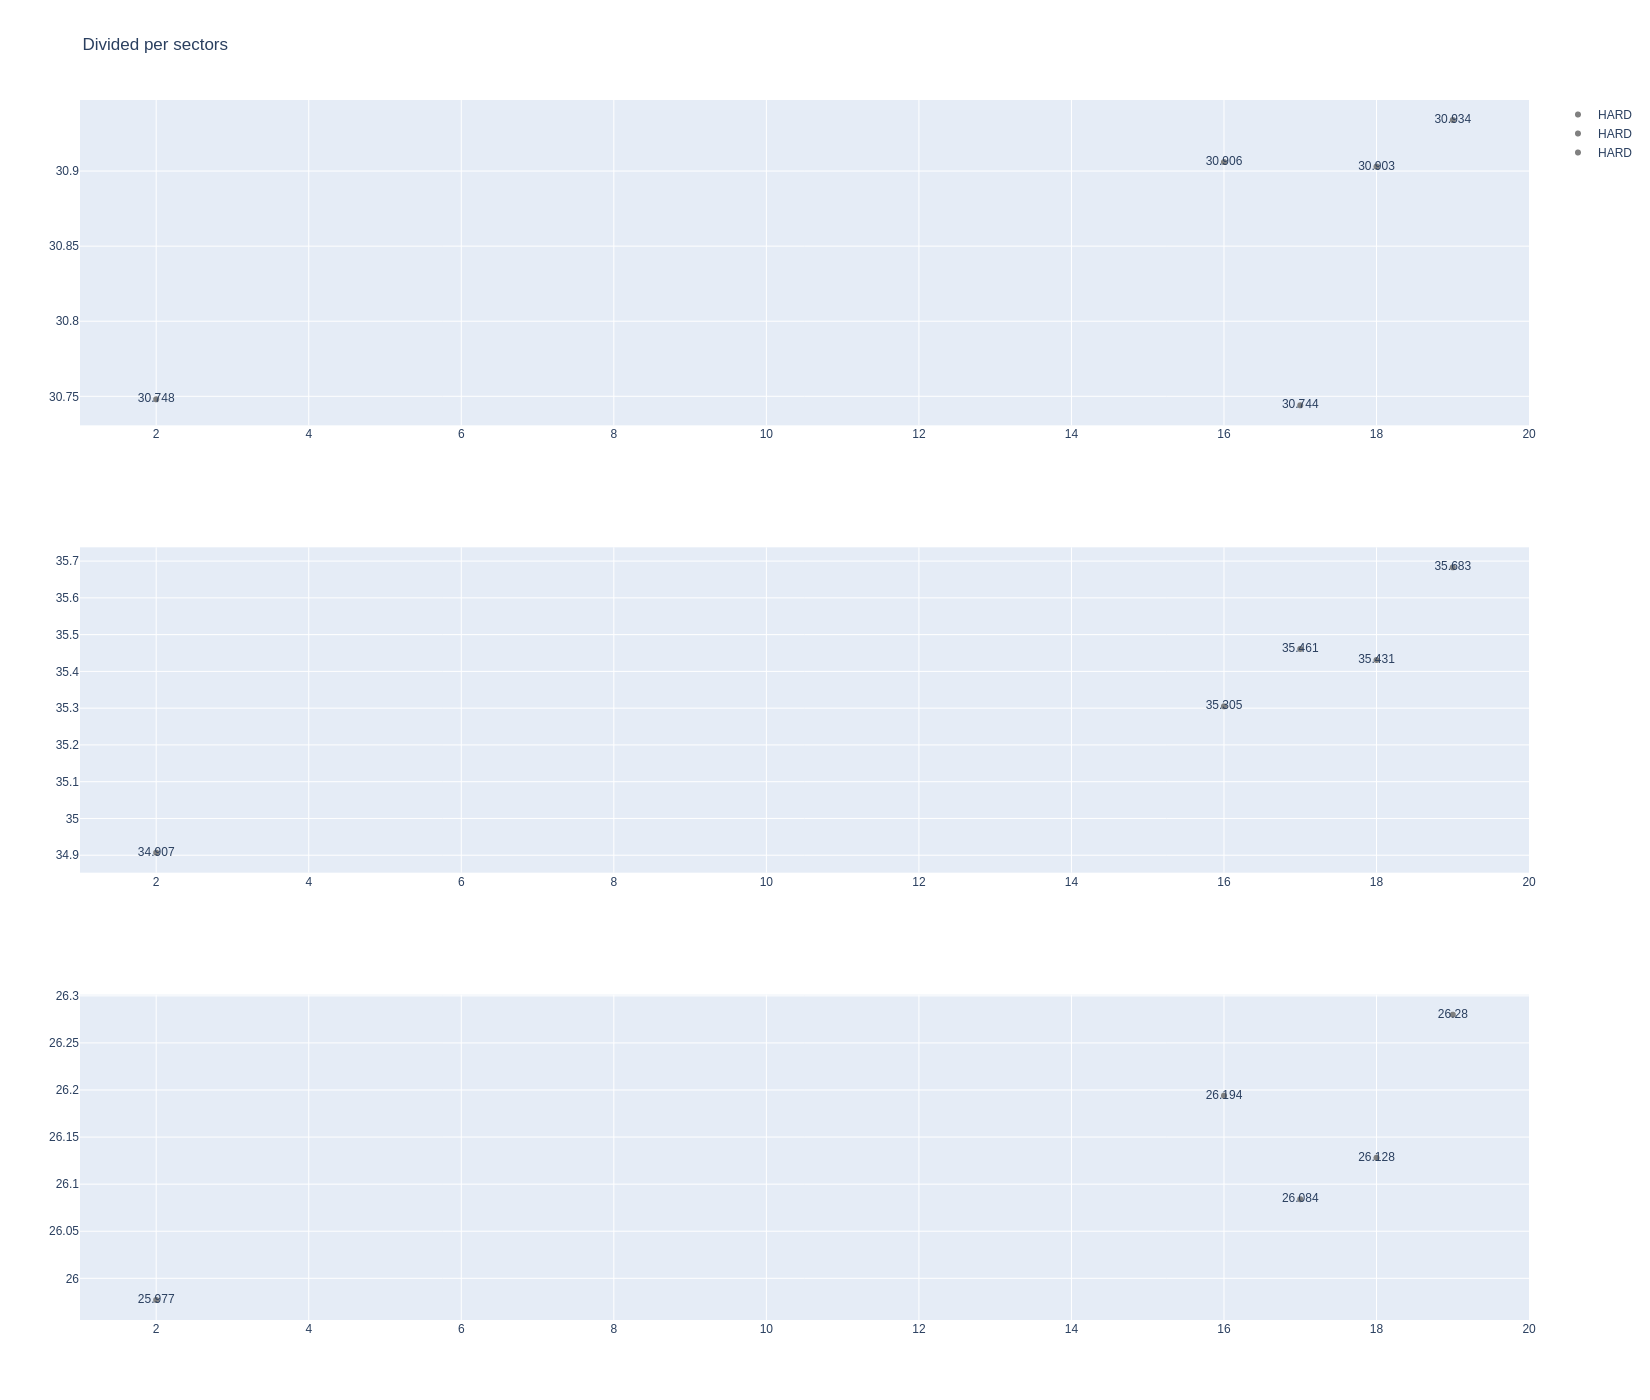

In [150]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [151]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
27   Liam LAWSON     HARD  2025-05-02T16:32:55.929000+00:00           2   
211  Liam LAWSON     HARD  2025-05-02T16:58:58.730000+00:00          13   
226  Liam LAWSON     HARD  2025-05-02T17:00:31.628000+00:00          14   
242  Liam LAWSON     HARD  2025-05-02T17:02:04.412000+00:00          15   
258  Liam LAWSON     HARD  2025-05-02T17:03:36.911000+00:00          16   
275  Liam LAWSON     HARD  2025-05-02T17:05:09.328000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
27              30.942             34.890             26.020        91.852  
211             31.245             35.301             26.354        92.900  
226             31.124             35.397             26.322        92.843  
242             31.118             35.319             26.071        92.508  
258             31.042             35.370             26.000        92.412  
275             30.926             35.365             25.947        92.238

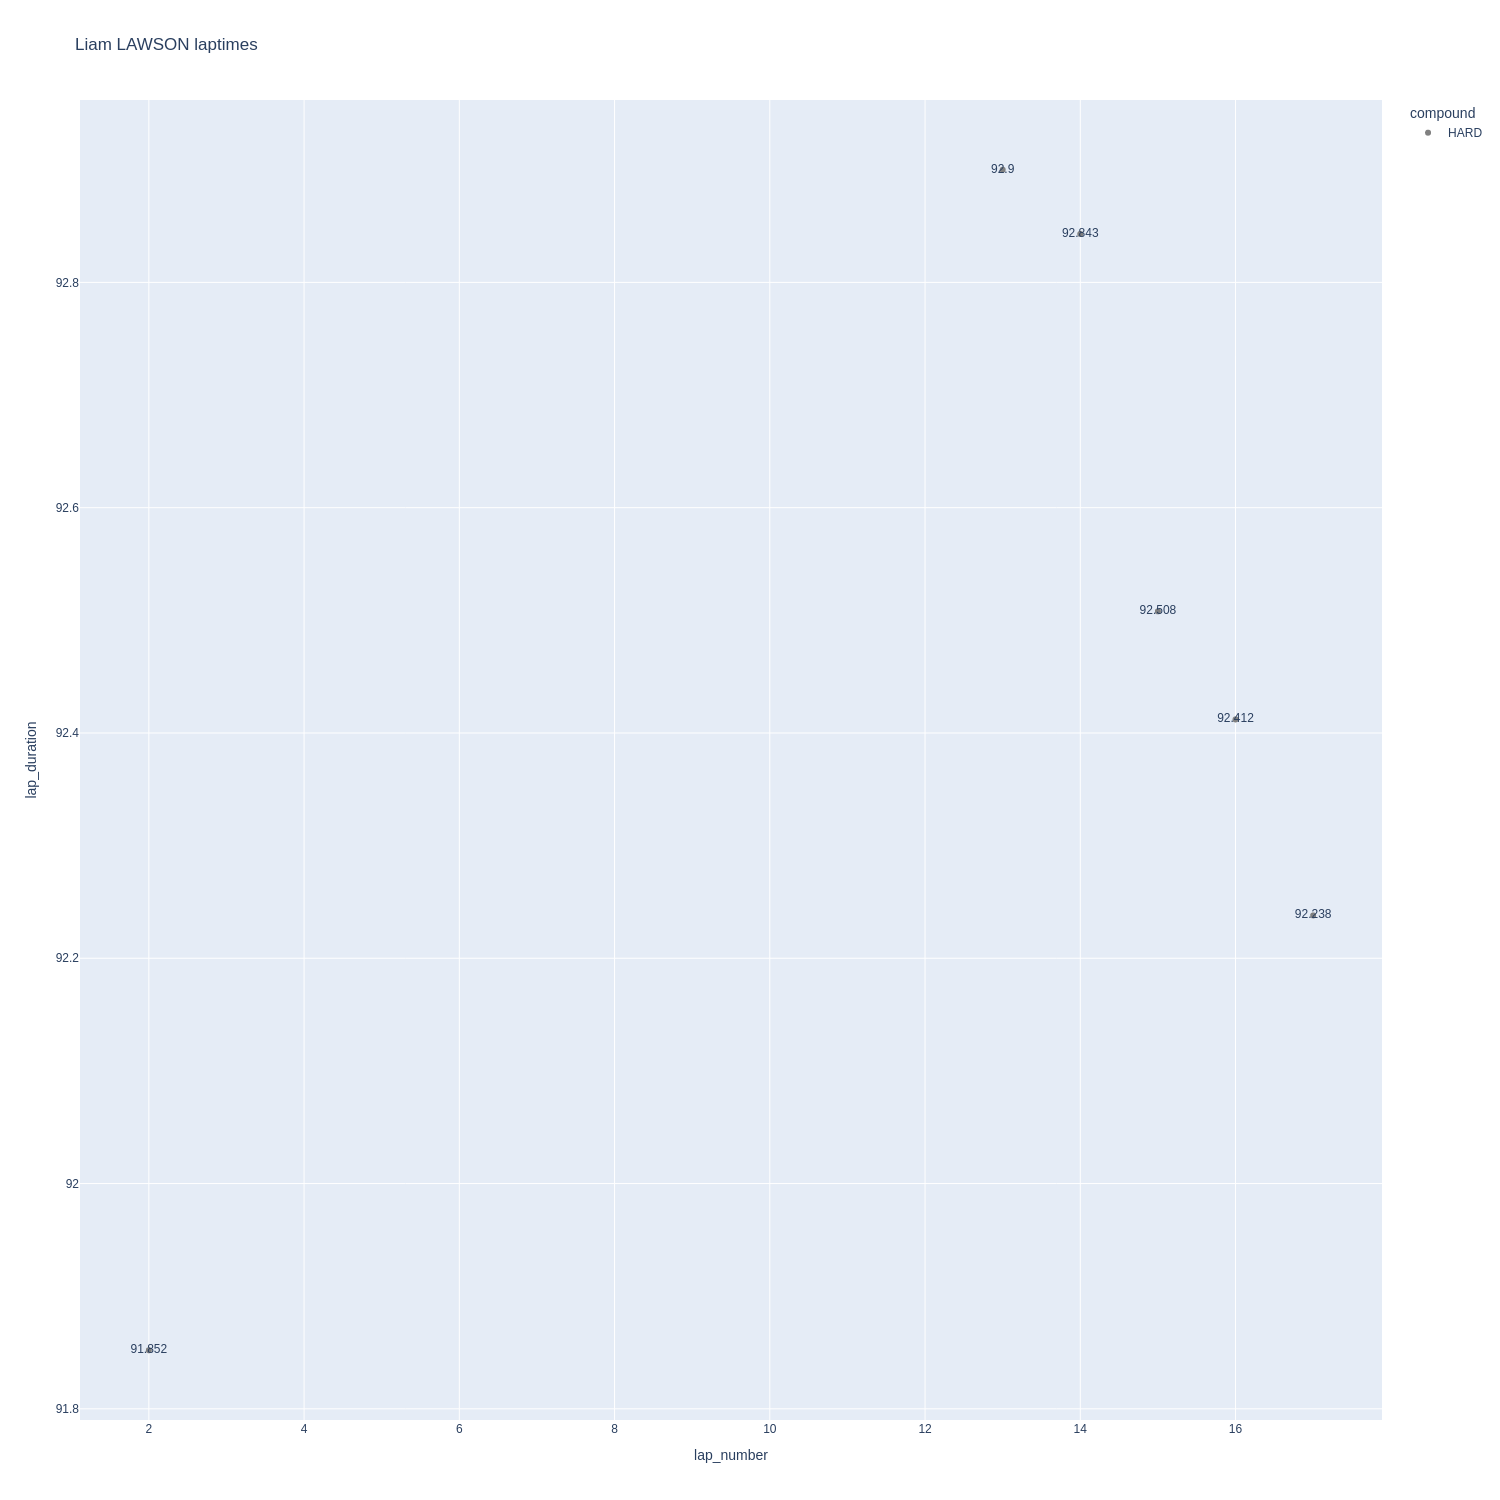

In [152]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

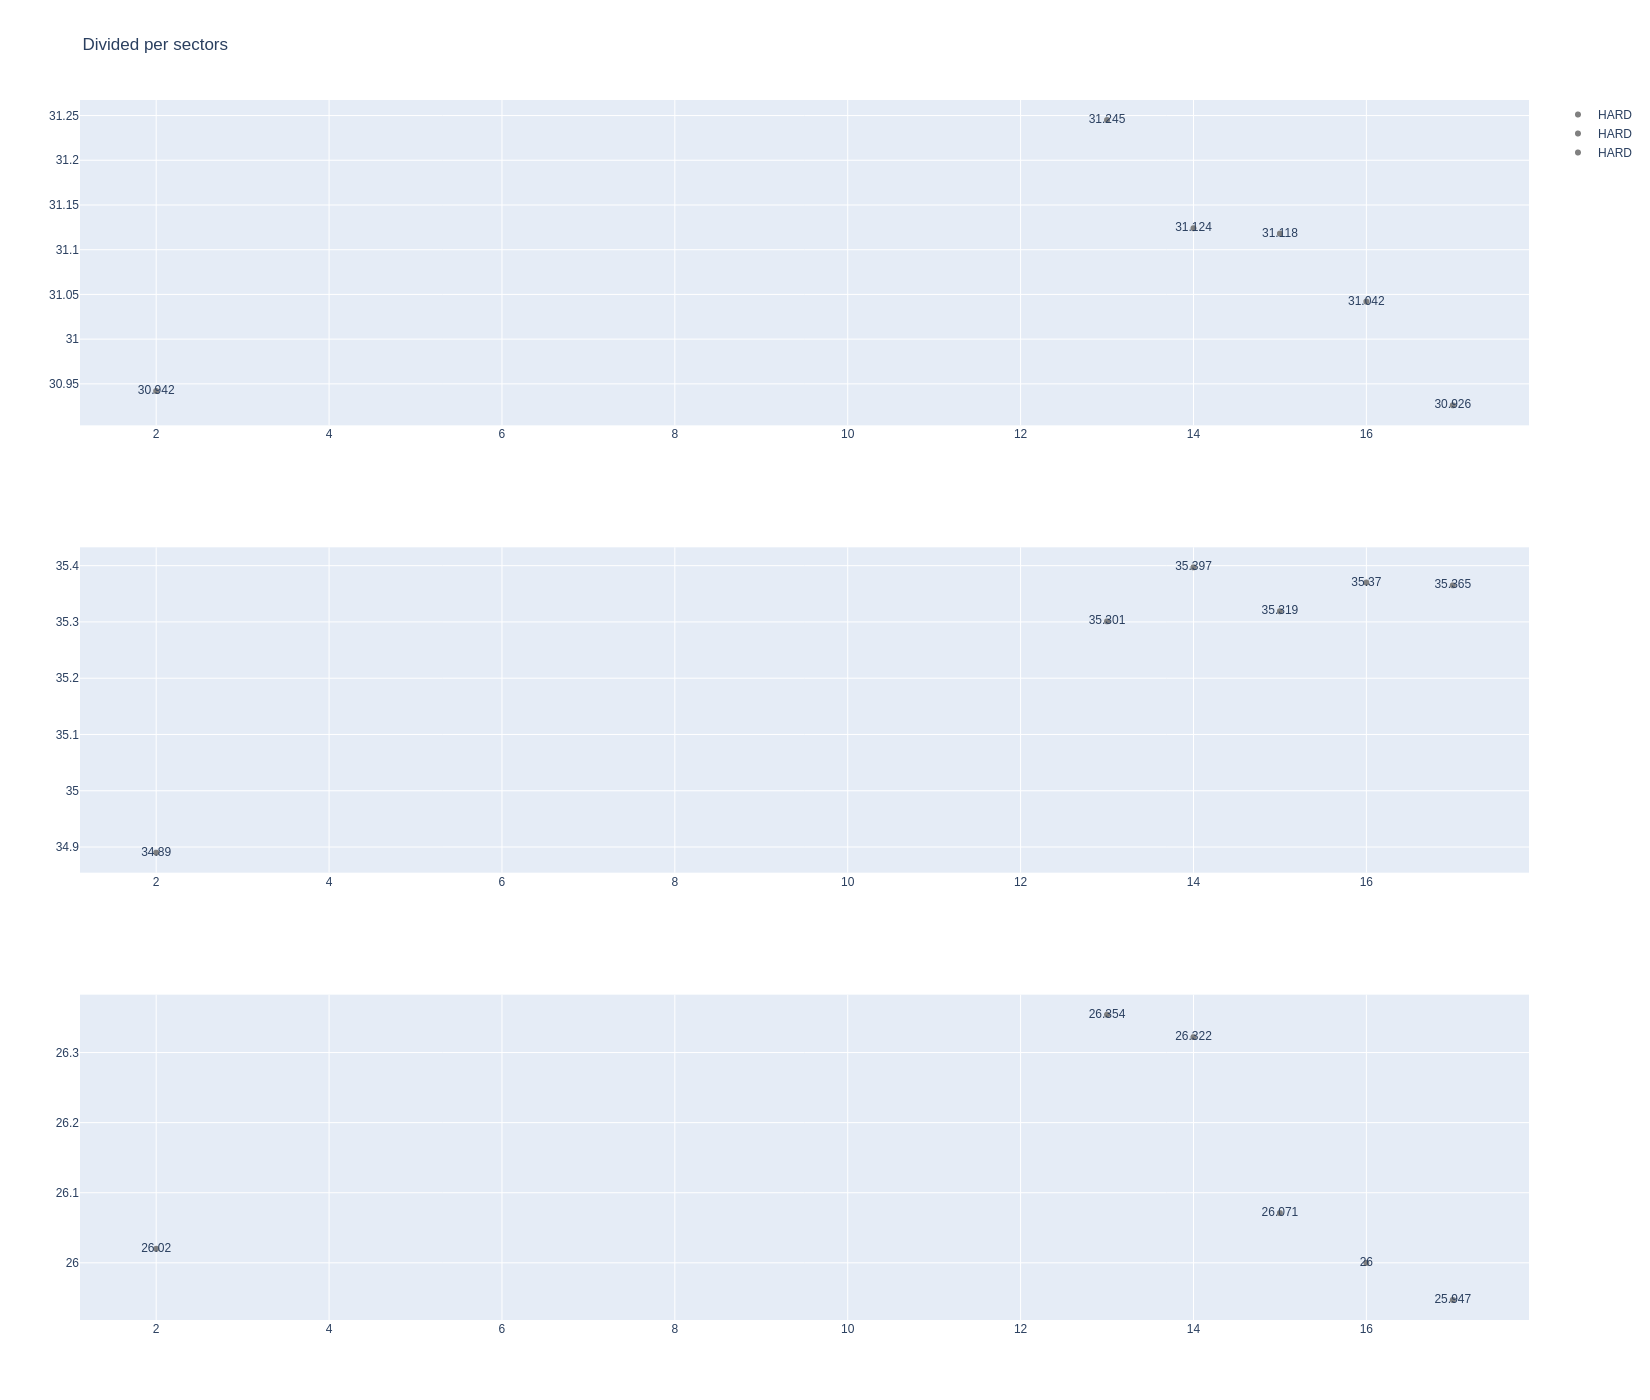

In [153]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [154]:
stintInformation.query('driver_number == 87 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
4          1259        10023             1             87          1        4   
9          1259        10023             1             31          1        6   
26         1259        10023             2             87          5        7   
32         1259        10023             2             31          7        9   
37         1259        10023             3             87          8       10   
45         1259        10023             3             31         10       18   
50         1259        10023             4             87         11       21   
64         1259        10023             4             31         19       20   
77         1259        10023             5             87         22       23   

   compound  tyre_age_at_start  
4    MEDIUM                  0  
9    MEDIUM                  0  
26   MEDIUM                  3  
32   MEDIUM                  5  
37   MEDIUM                  6  
45   MEDIUM                  8  
50   MEDIUM                  9  
64     SOFT                  0  
77     SOFT                  0

In [155]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
26   Oliver BEARMAN   MEDIUM  2025-05-02T16:32:47.951000+00:00           2   
222  Oliver BEARMAN   MEDIUM  2025-05-02T17:00:16.476000+00:00          11   
237  Oliver BEARMAN   MEDIUM  2025-05-02T17:01:48.586000+00:00          12   
256  Oliver BEARMAN   MEDIUM  2025-05-02T17:03:20.608000+00:00          13   
274  Oliver BEARMAN   MEDIUM  2025-05-02T17:04:52.528000+00:00          14   
291  Oliver BEARMAN   MEDIUM  2025-05-02T17:06:24.623000+00:00          15   
307  Oliver BEARMAN   MEDIUM  2025-05-02T17:07:56.678000+00:00          16   
323  Oliver BEARMAN   MEDIUM  2025-05-02T17:09:29.020000+00:00          17   
336  Oliver BEARMAN   MEDIUM  2025-05-02T17:11:01.212000+00:00          18   
348  Oliver BEARMAN   MEDIUM  2025-05-02T17:12:33.116000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
26              31.258             34.699             25.834        91.791  
222             31.146             34.844             26.131        92.121  
237             30.918             35.007             26.062        91.987  
256             30.985             34.964             26.069        92.018  
274             30.809             35.292             26.039        92.140  
291             30.910             35.203             25.937        92.050  
307             30.828             35.468             26.021        92.317  
323             30.740             35.264             26.107        92.111  
336             30.844             35.050             26.097        91.991  
348             30.995             34.885             25.843        91.723

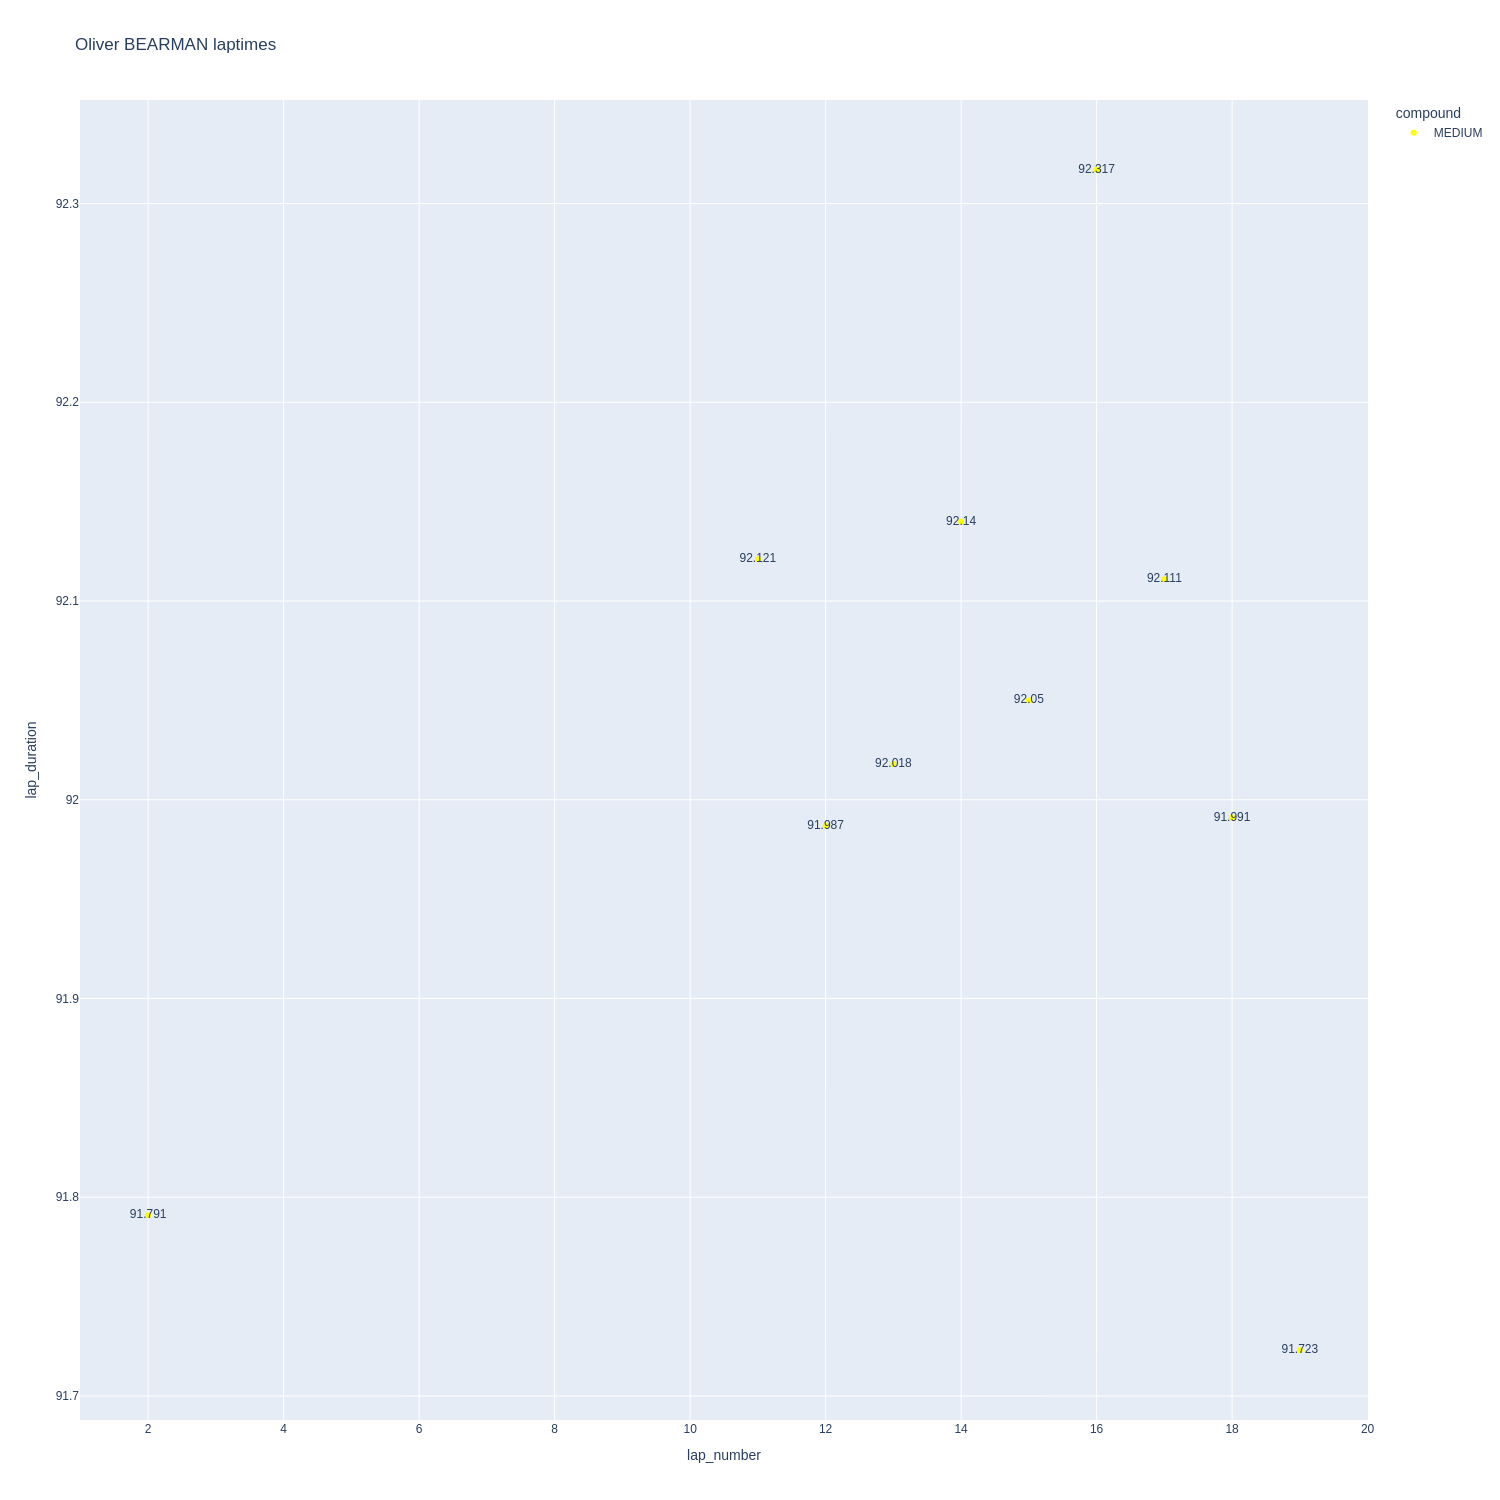

In [156]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

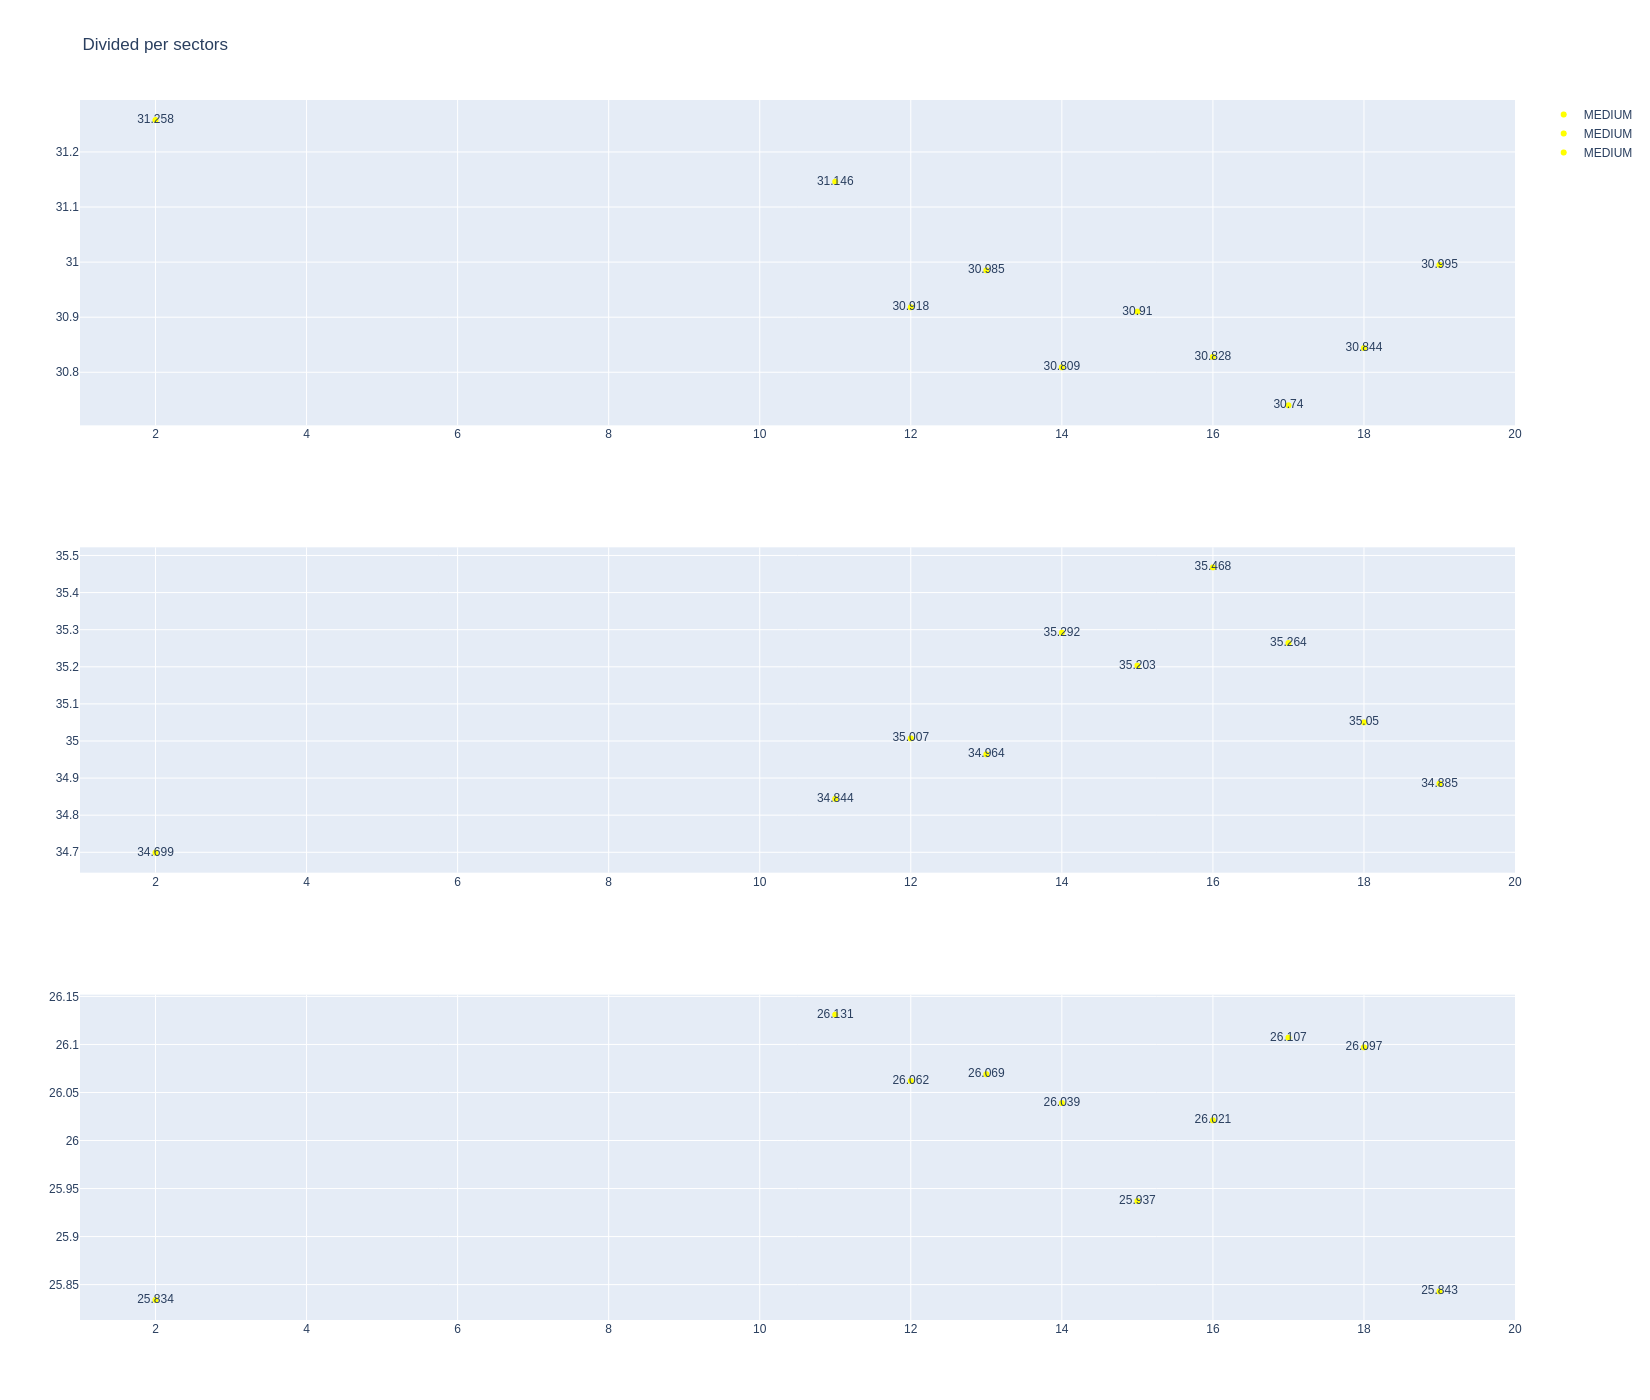

In [157]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [158]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
34   Esteban OCON   MEDIUM  2025-05-02T16:33:35.203000+00:00           2   
308  Esteban OCON   MEDIUM  2025-05-02T17:08:01.225000+00:00          12   
324  Esteban OCON   MEDIUM  2025-05-02T17:09:32.986000+00:00          13   
337  Esteban OCON   MEDIUM  2025-05-02T17:11:05.301000+00:00          14   
349  Esteban OCON   MEDIUM  2025-05-02T17:12:36.967000+00:00          15   
360  Esteban OCON   MEDIUM  2025-05-02T17:14:09.125000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
34              30.957             34.723             26.046        91.726  
308             30.647             35.075             26.001        91.723  
324             30.959             35.166             26.164        92.289  
337             30.625             35.070             26.025        91.720  
349             30.851             35.191             25.998        92.040  
360             30.688             35.125             26.021        91.834

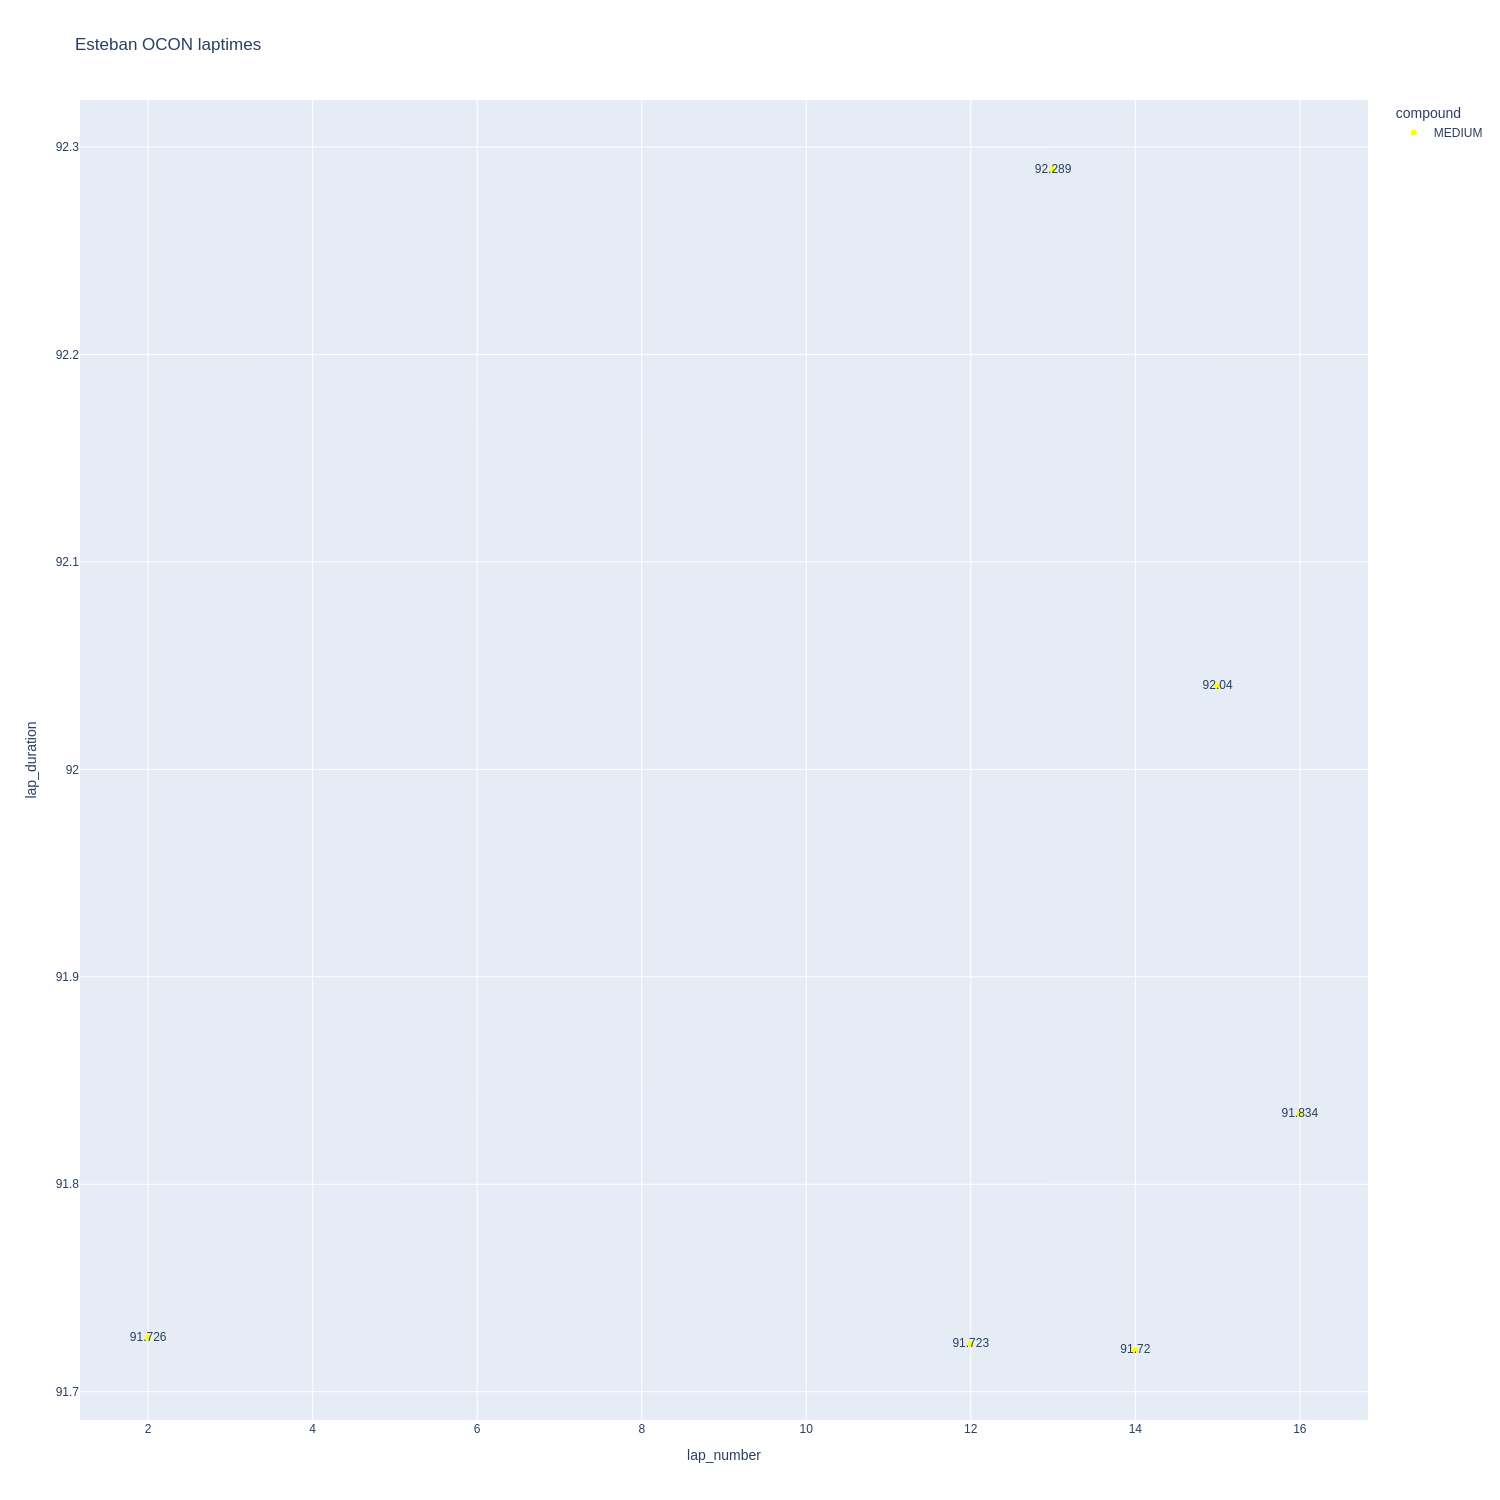

In [159]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

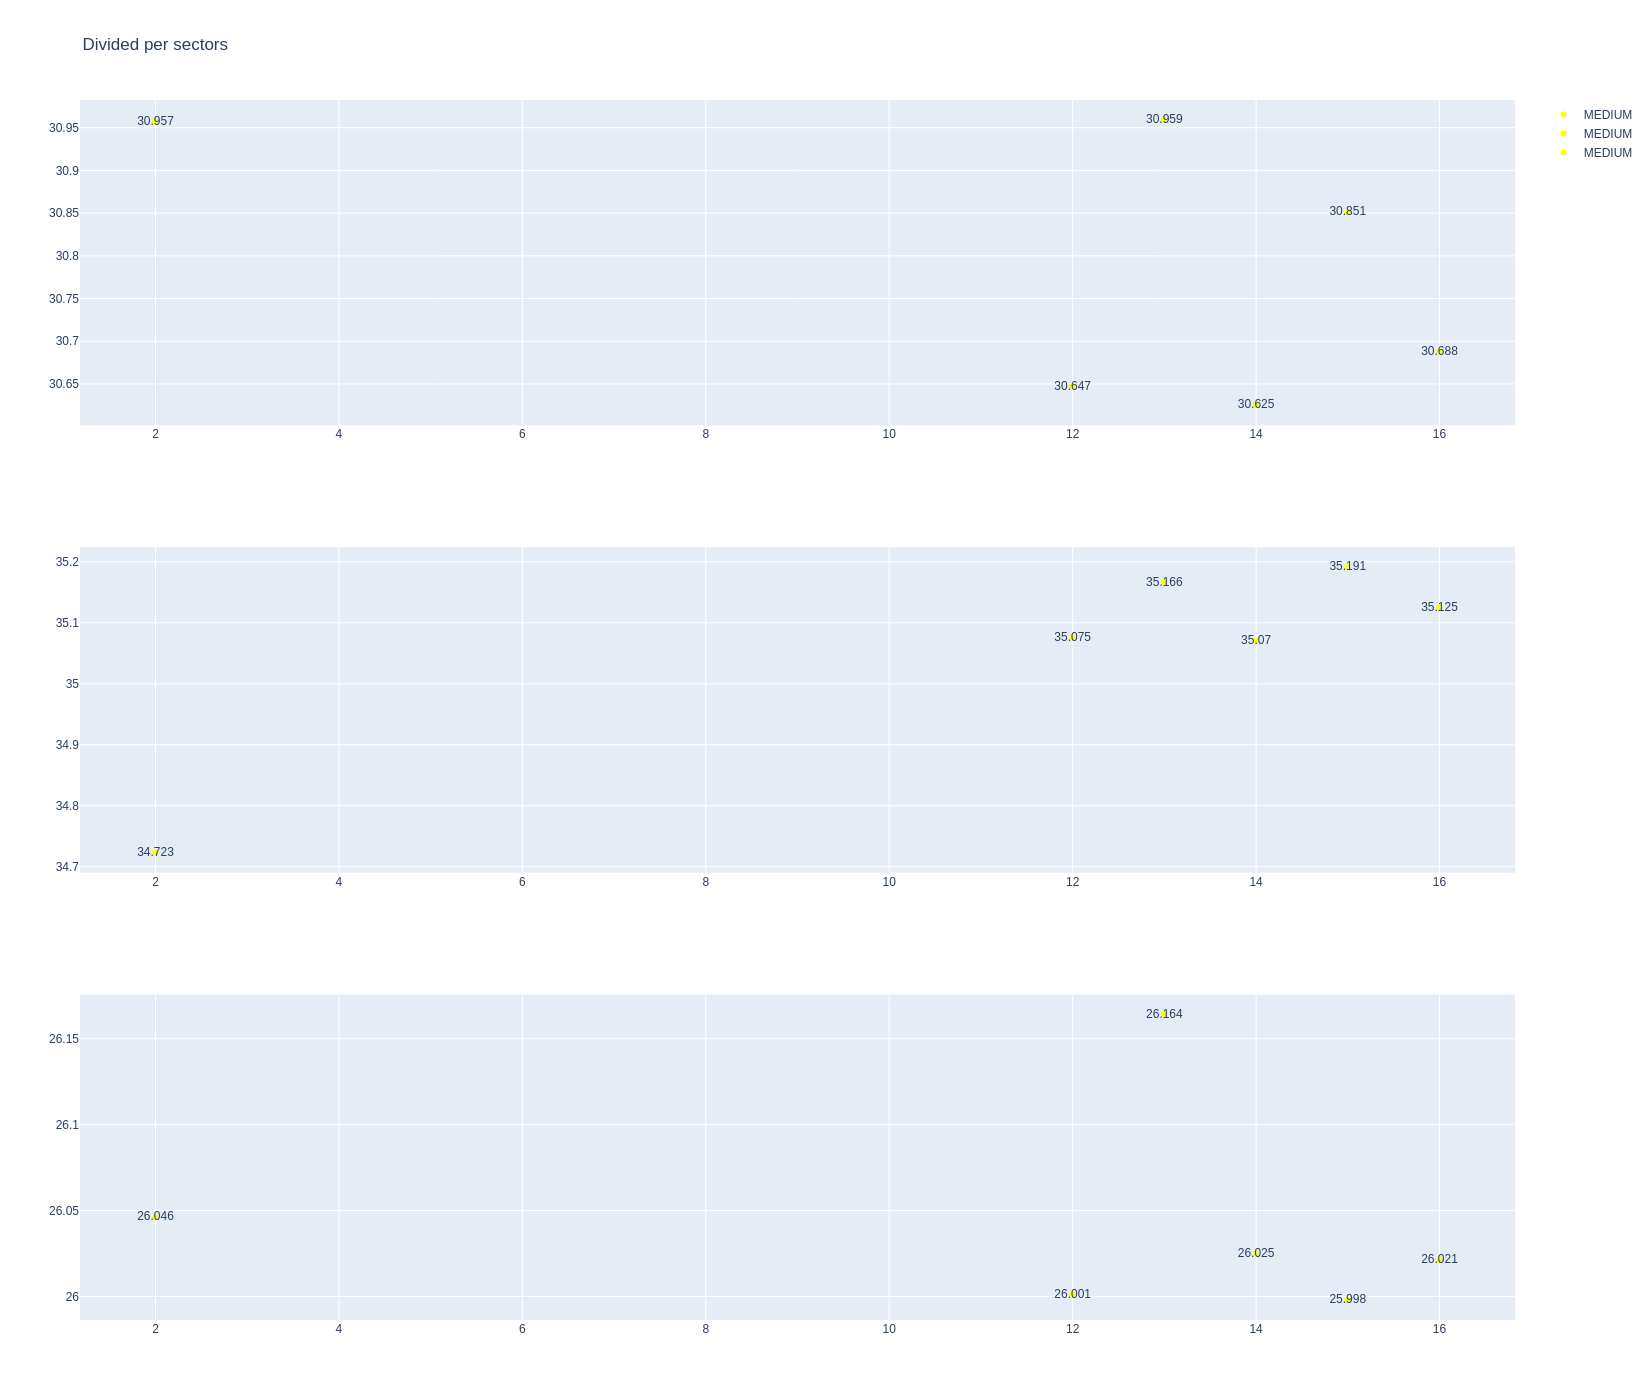

In [160]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [161]:
stintInformation.query('driver_number == 10 or driver_number == 7')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
14         1259        10023             1             10          1       11   
19         1259        10023             1              7          1       13   
54         1259        10023             2             10         12       22   
60         1259        10023             2              7         14       22   
81         1259        10023             3              7         23       23   
82         1259        10023             3             10         23       23   

   compound  tyre_age_at_start  
14   MEDIUM                  0  
19   MEDIUM                  0  
54   MEDIUM                 10  
60   MEDIUM                 12  
81     SOFT                  0  
82     SOFT                  0

In [162]:
data =libraryDataF1.getinfolongruns(jointables2,7,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
29   Jack DOOHAN   MEDIUM  2025-05-02T16:33:03.001000+00:00           2   
90   Jack DOOHAN   MEDIUM  2025-05-02T16:39:17.141000+00:00           5   
263  Jack DOOHAN   MEDIUM  2025-05-02T17:03:58.967000+00:00          14   
280  Jack DOOHAN   MEDIUM  2025-05-02T17:05:30.484000+00:00          15   
298  Jack DOOHAN   MEDIUM  2025-05-02T17:07:02.314000+00:00          16   
314  Jack DOOHAN   MEDIUM  2025-05-02T17:08:33.935000+00:00          17   
328  Jack DOOHAN   MEDIUM  2025-05-02T17:10:05.716000+00:00          18   
340  Jack DOOHAN   MEDIUM  2025-05-02T17:11:37.546000+00:00          19   
352  Jack DOOHAN   MEDIUM  2025-05-02T17:13:09.477000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
29              30.283             34.728             25.648        90.659  
90              30.421             34.510             25.616        90.547  
263             30.207             35.313             25.990        91.510  
280             30.948             35.215             25.808        91.971  
298             30.730             35.149             25.734        91.613  
314             30.632             35.180             25.889        91.701  
328             30.764             35.229             25.789        91.782  
340             30.857             35.313             25.833        92.003  
352             30.759             35.279             25.900        91.938

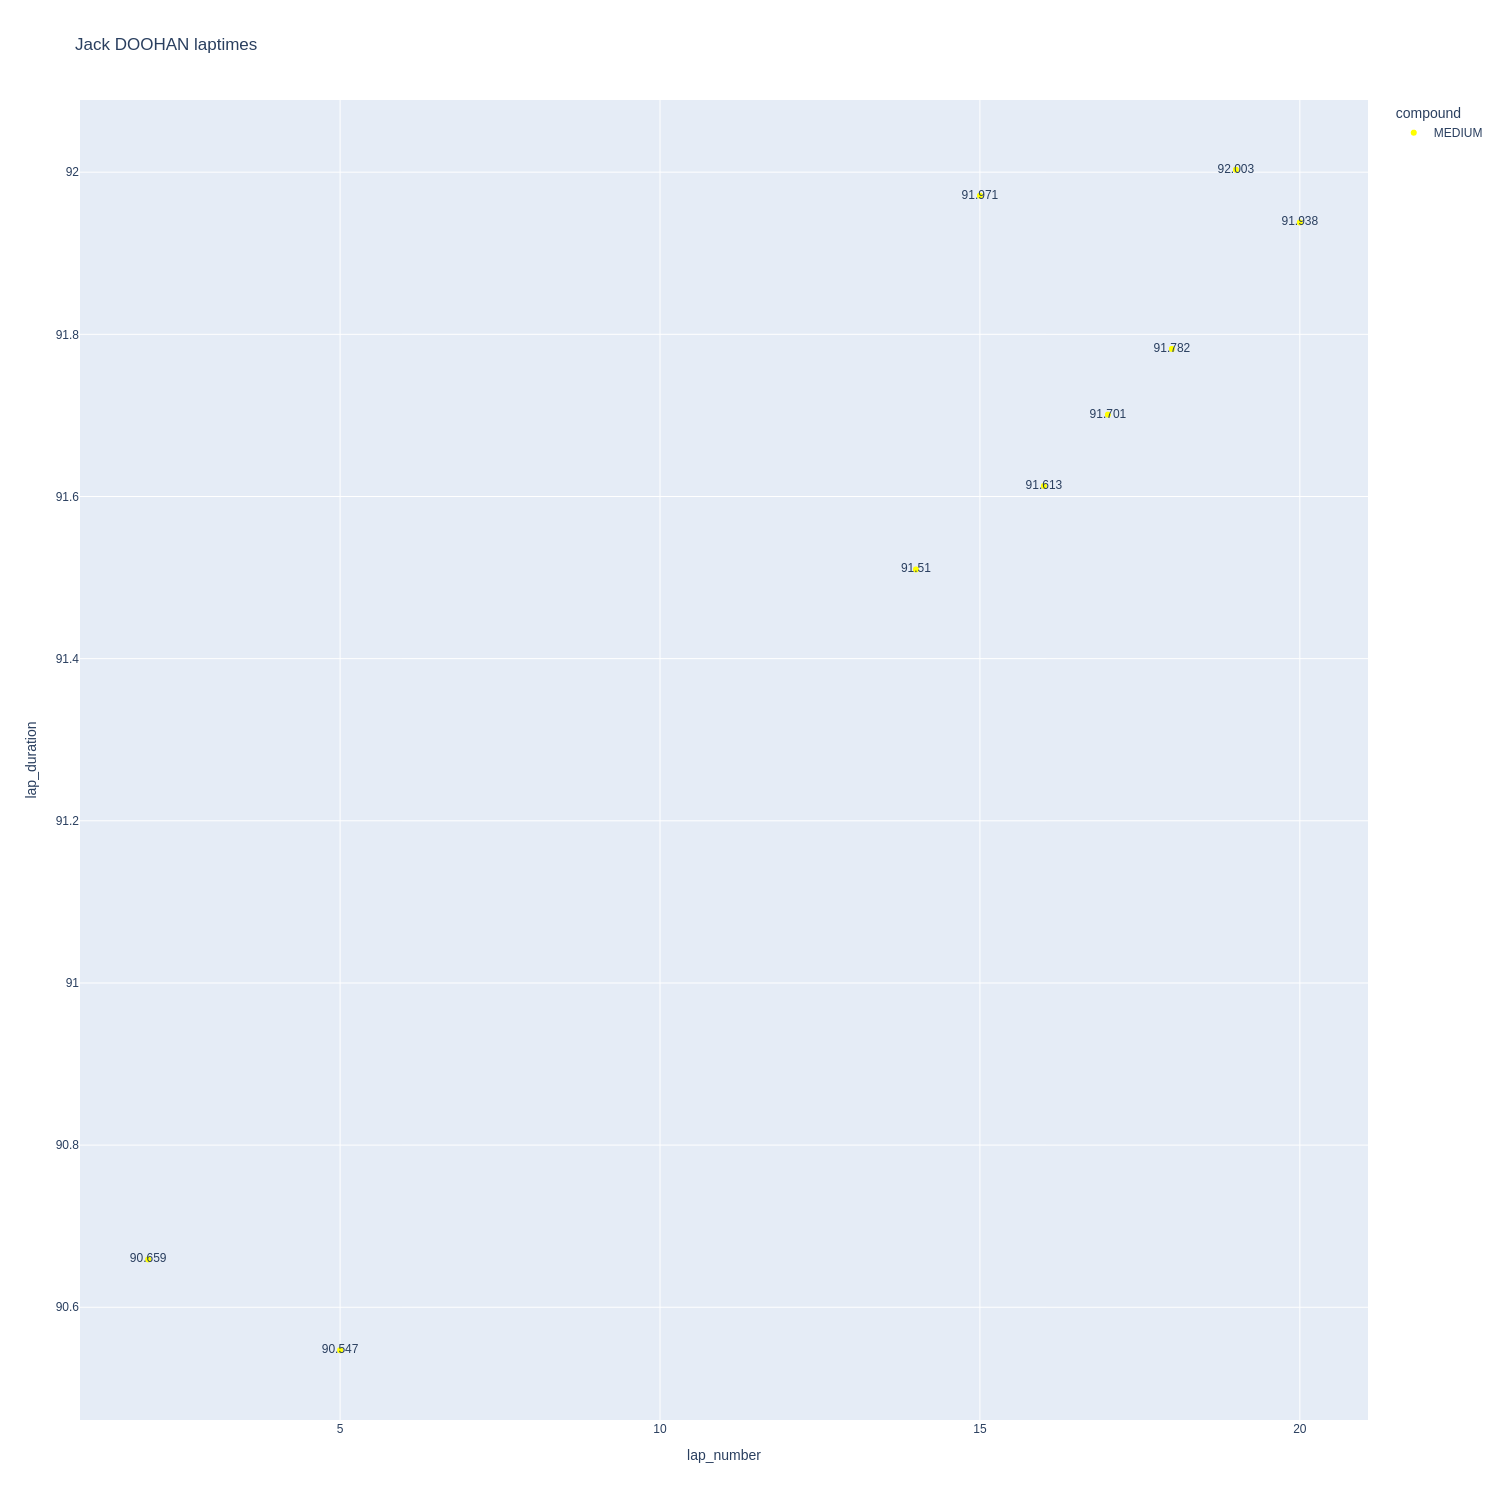

In [163]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

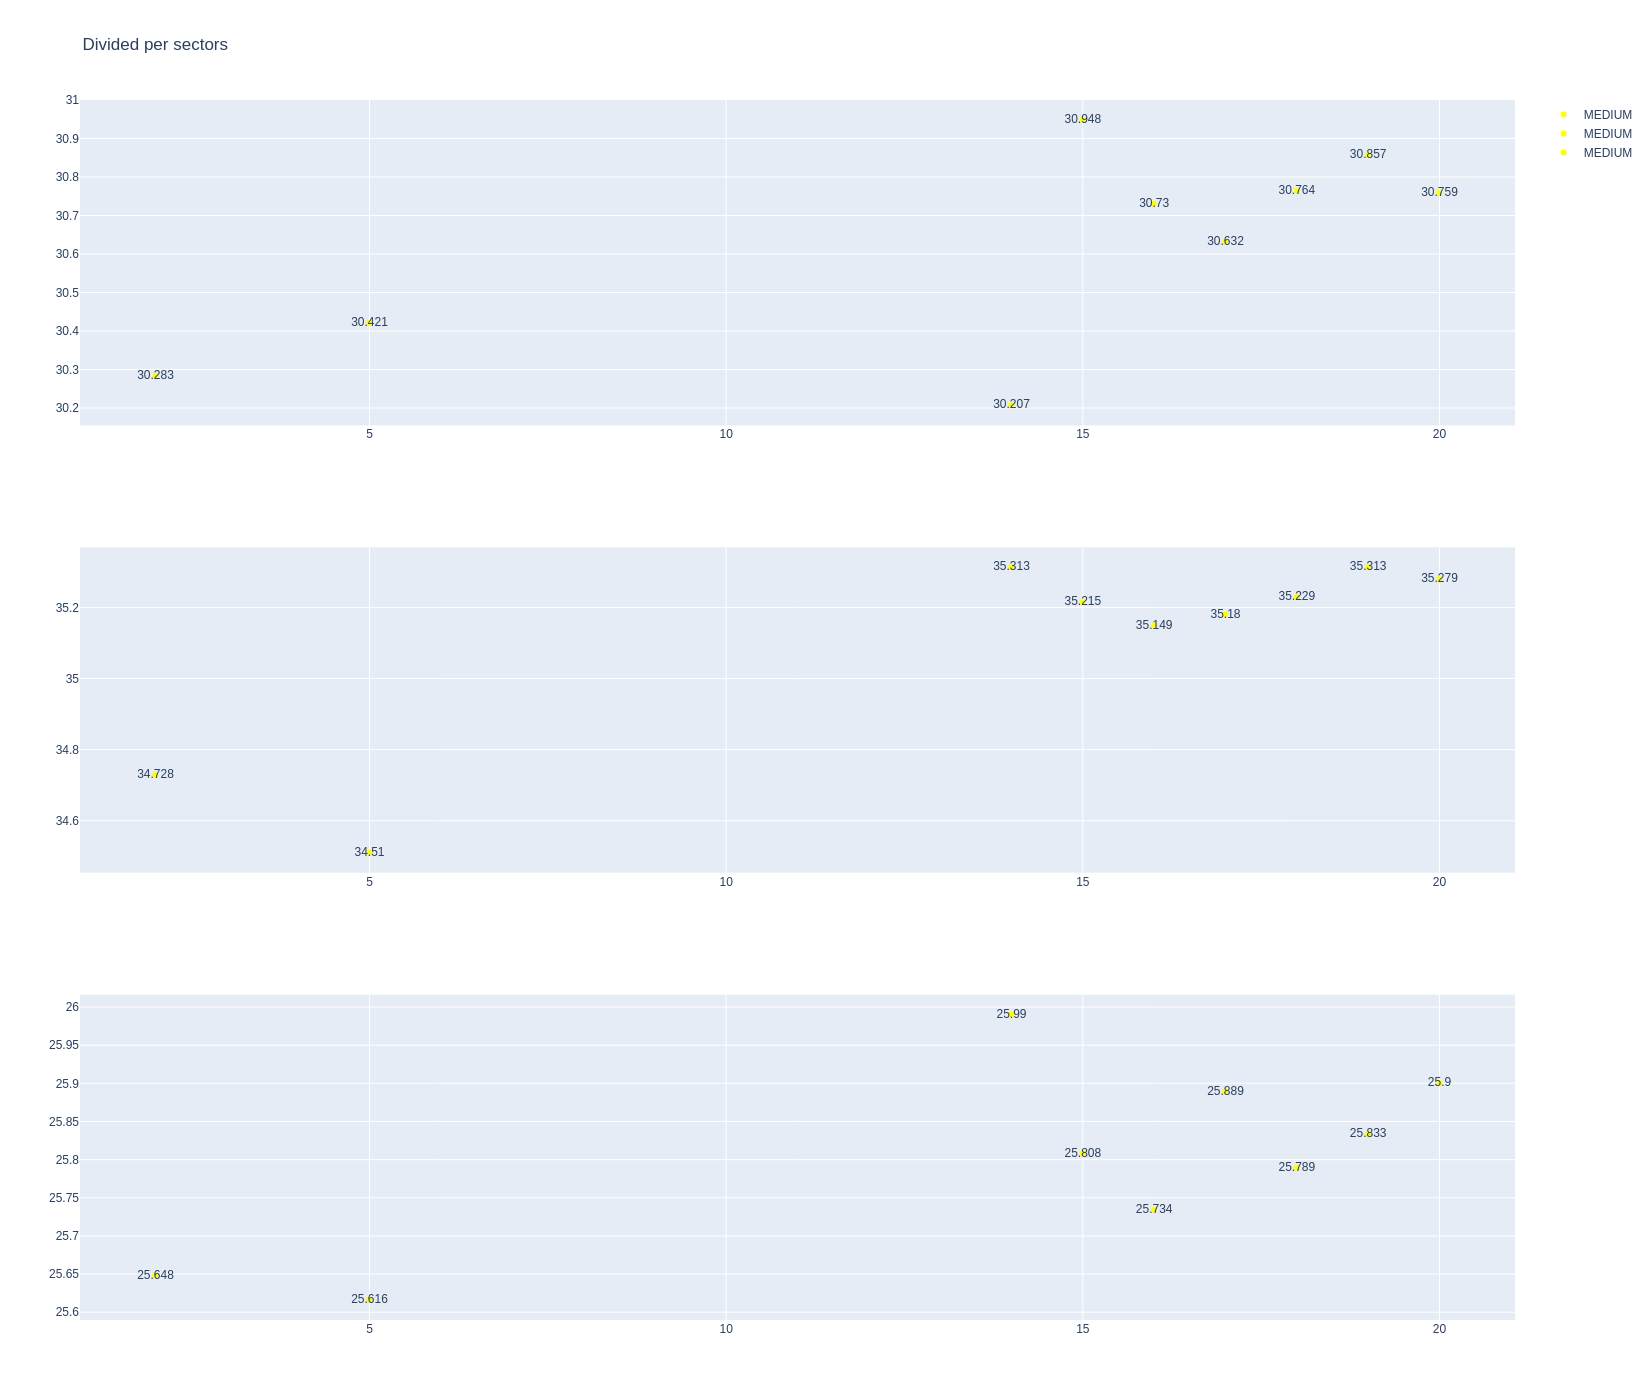

In [164]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [165]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
321  Pierre GASLY   MEDIUM  2025-05-02T17:09:25.298000+00:00          17   
334  Pierre GASLY   MEDIUM  2025-05-02T17:10:57.025000+00:00          18   
346  Pierre GASLY   MEDIUM  2025-05-02T17:12:29.498000+00:00          19   
358  Pierre GASLY   MEDIUM  2025-05-02T17:14:01.235000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
321             31.274             35.169             25.916        92.359  
334             31.260             35.231             25.934        92.425  
346             30.932             35.086             25.755        91.773  
358             30.744             35.113             25.811        91.668

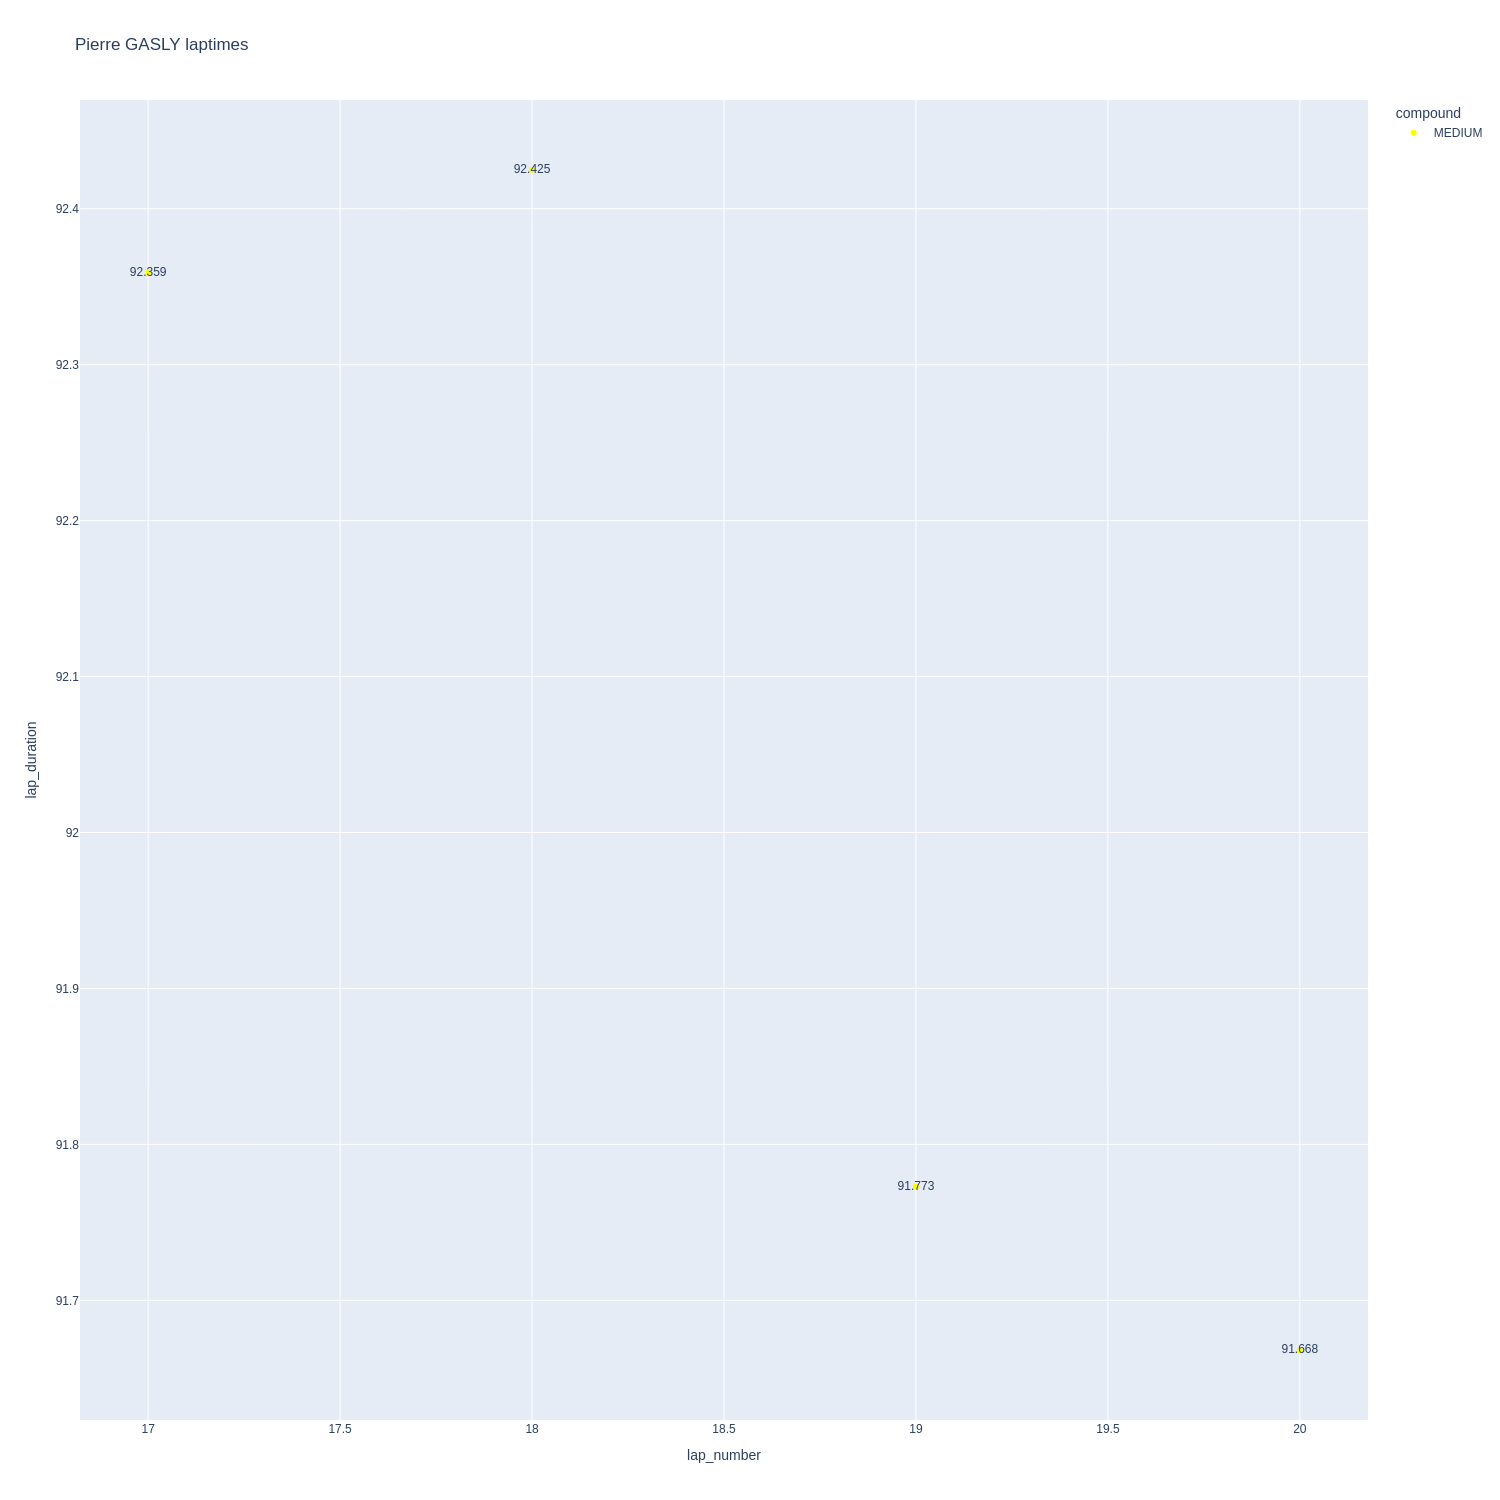

In [166]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

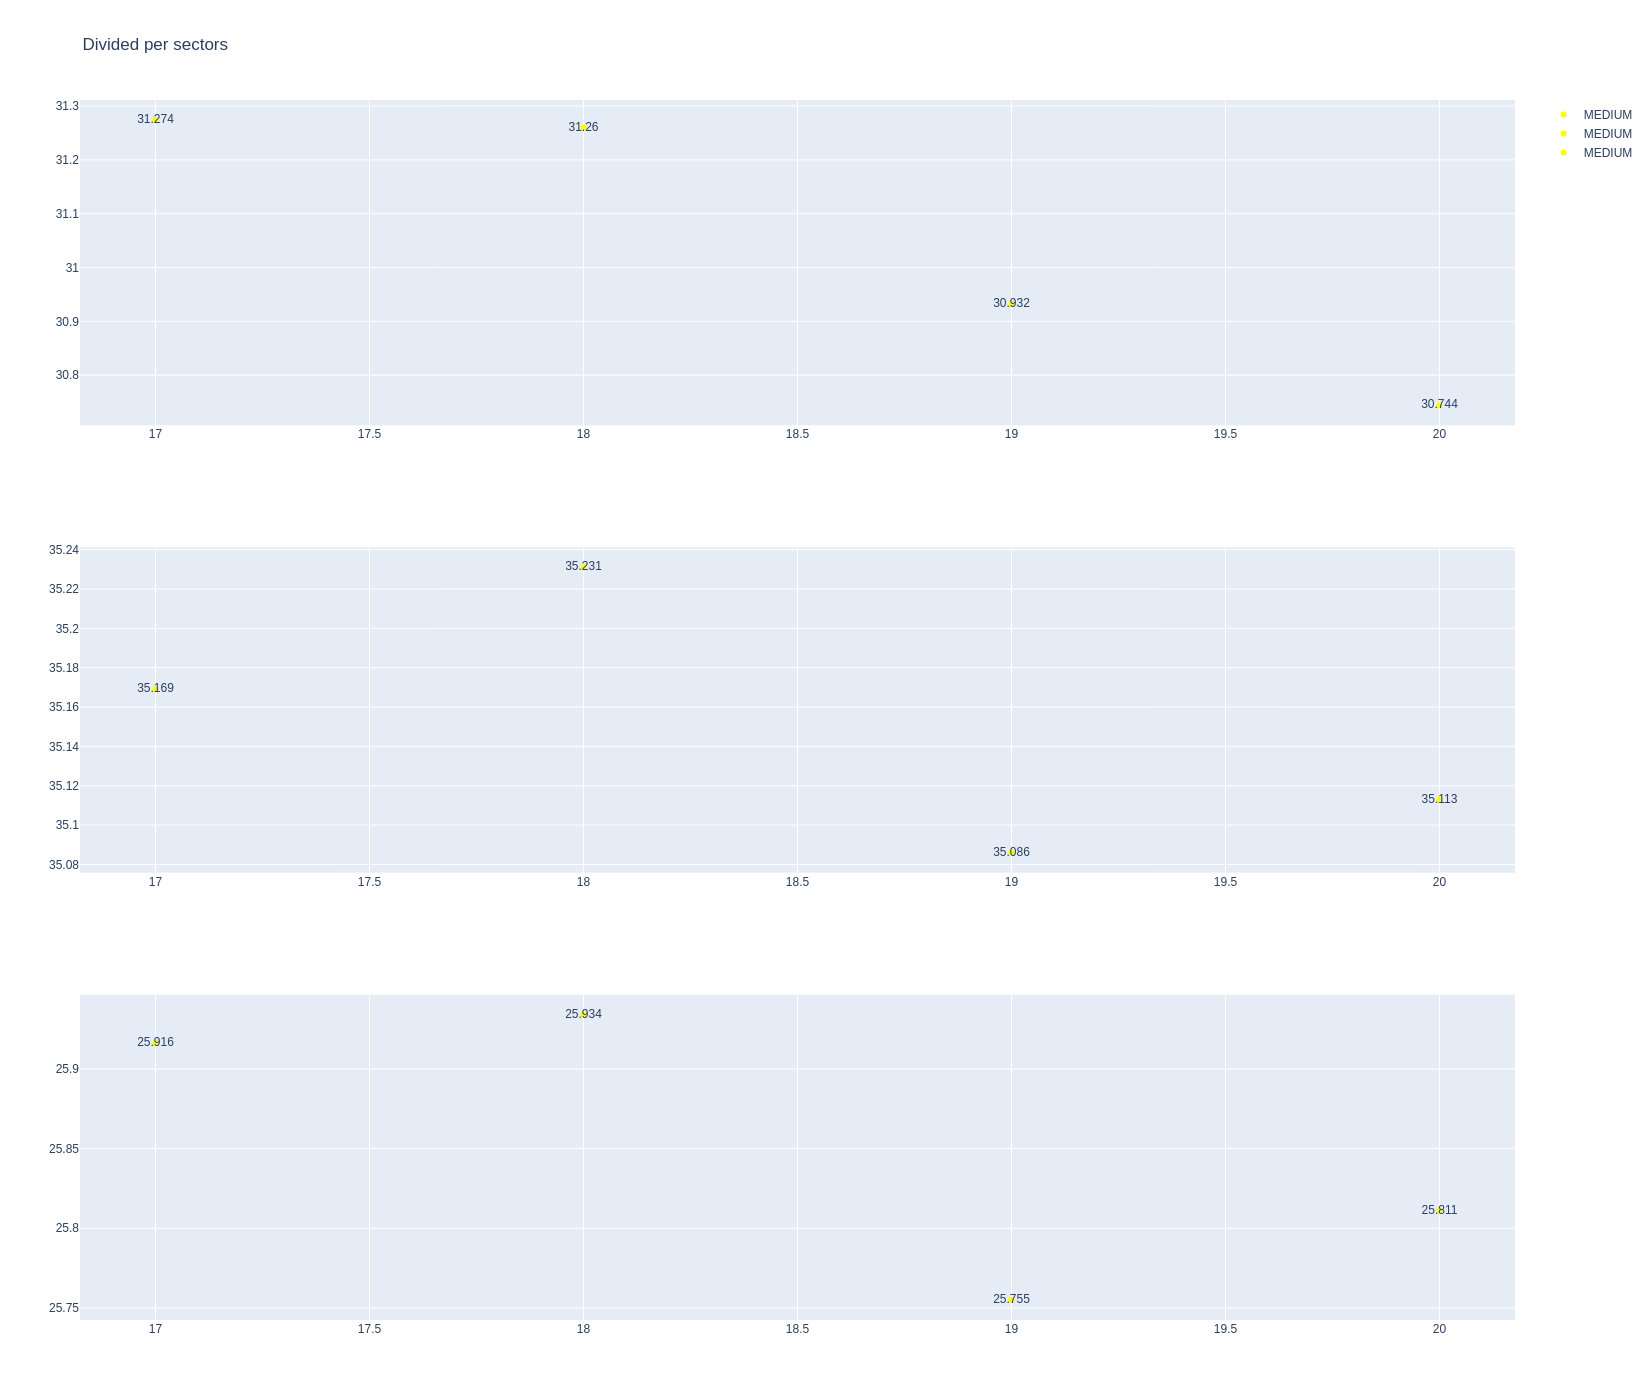

In [167]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [168]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
8          1259        10023             1             23          1        6   
10         1259        10023             1             55          1        6   
31         1259        10023             2             23          7        9   
35         1259        10023             2             55          7       13   
39         1259        10023             3             23         10       12   
56         1259        10023             4             23         13       20   
59         1259        10023             3             55         14       21   
72         1259        10023             5             23         21       21   
79         1259        10023             4             55         22       24   
80         1259        10023             6             23         22       26   

   compound  tyre_age_at_start  
8    MEDIUM                  0  
10   MEDIUM                  0  
31   MEDIUM                  5  
35   MEDIUM                  5  
39   MEDIUM                  0  
56   MEDIUM                  0  
59   MEDIUM                  0  
72   MEDIUM                 19  
79     SOFT                  0  
80     SOFT                  0

In [169]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
24   Alexander ALBON   MEDIUM  2025-05-02T16:32:32.341000+00:00           2   
229  Alexander ALBON   MEDIUM  2025-05-02T17:00:50.332000+00:00          13   
248  Alexander ALBON   MEDIUM  2025-05-02T17:02:20.823000+00:00          14   
261  Alexander ALBON   MEDIUM  2025-05-02T17:03:51.653000+00:00          15   
279  Alexander ALBON   MEDIUM  2025-05-02T17:05:22.734000+00:00          16   
297  Alexander ALBON   MEDIUM  2025-05-02T17:06:54.046000+00:00          17   
313  Alexander ALBON   MEDIUM  2025-05-02T17:08:25.550000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
24              30.885             34.398             25.457        90.740  
229             30.576             34.385             25.561        90.522  
248             30.678             34.659             25.606        90.943  
261             30.562             34.791             25.641        90.994  
279             30.904             34.814             25.643        91.361  
297             30.831             35.085             25.526        91.442  
313             31.353             34.813             25.647        91.813

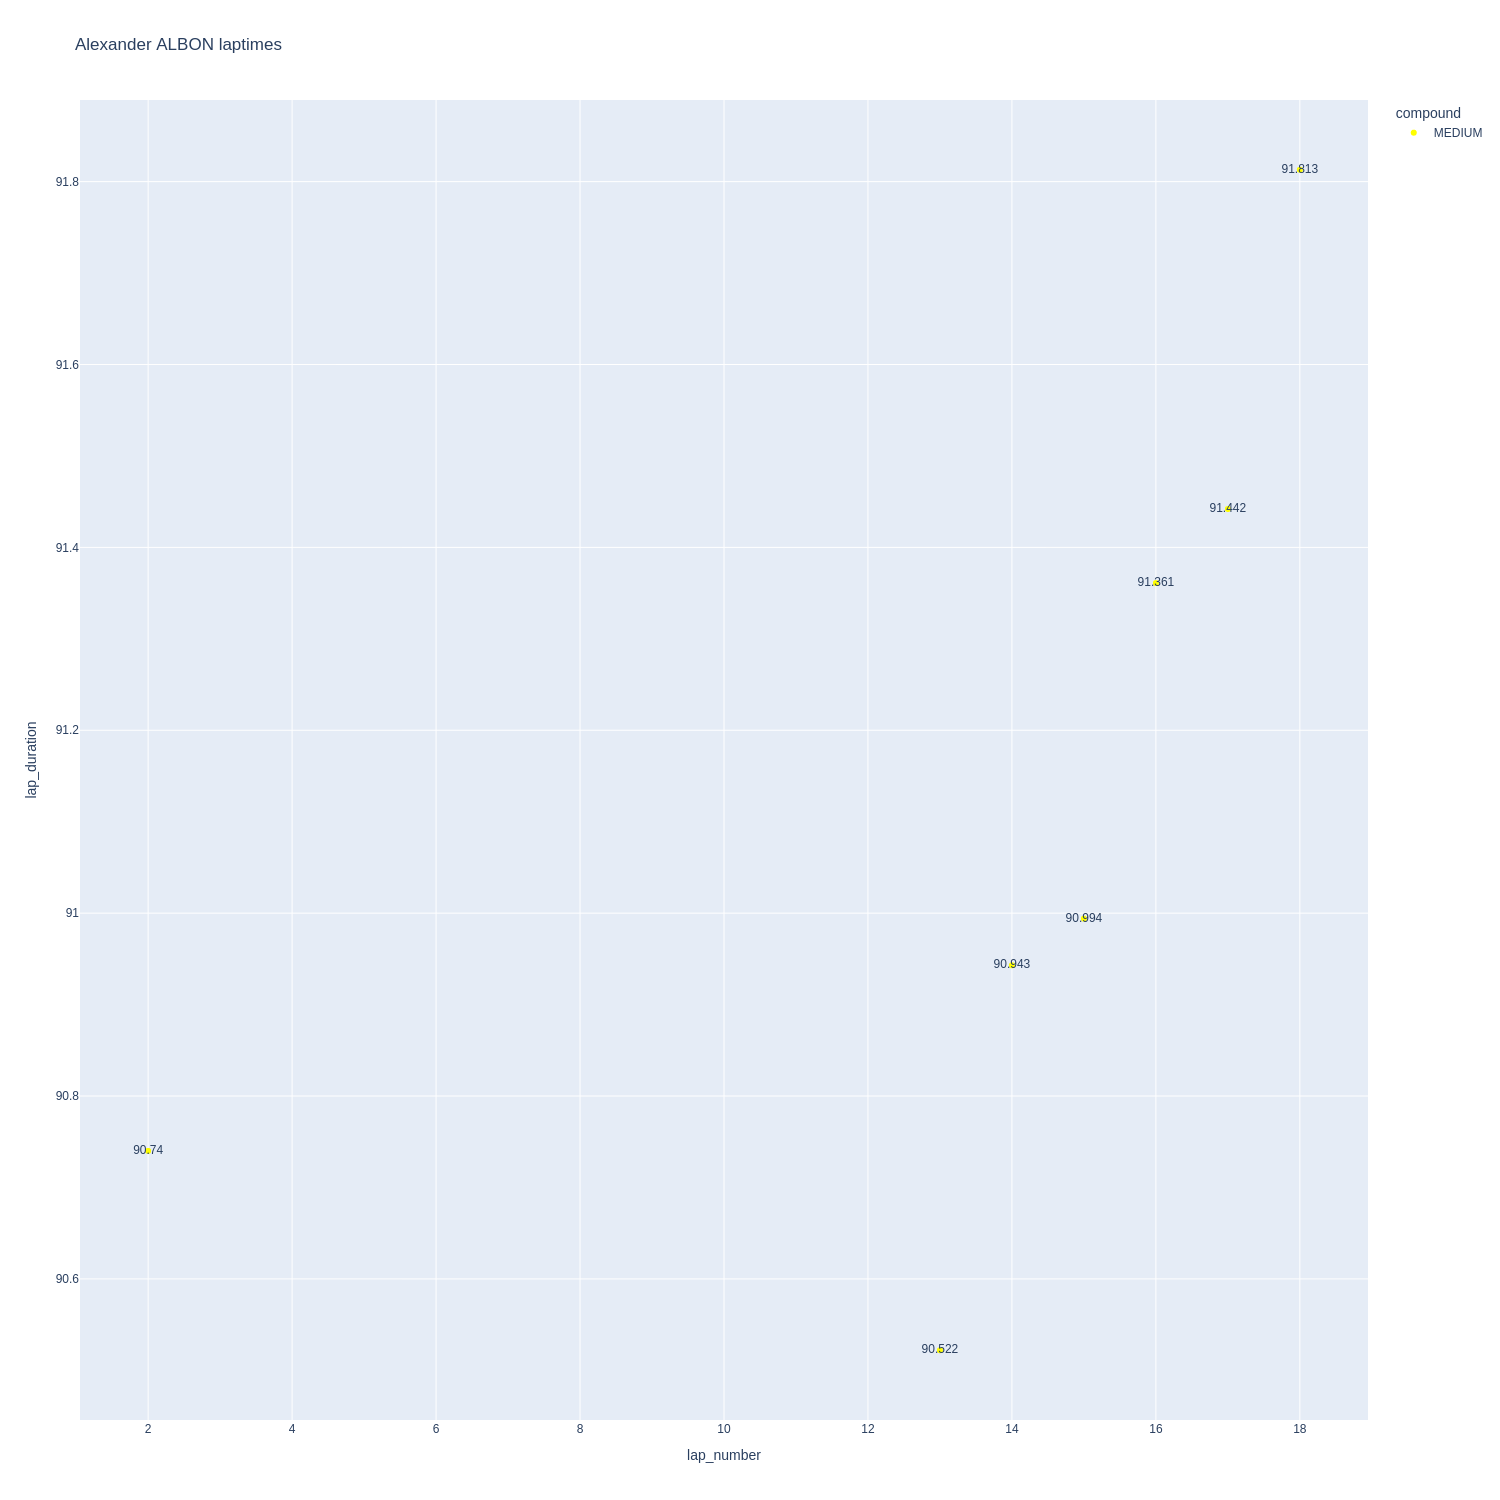

In [170]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

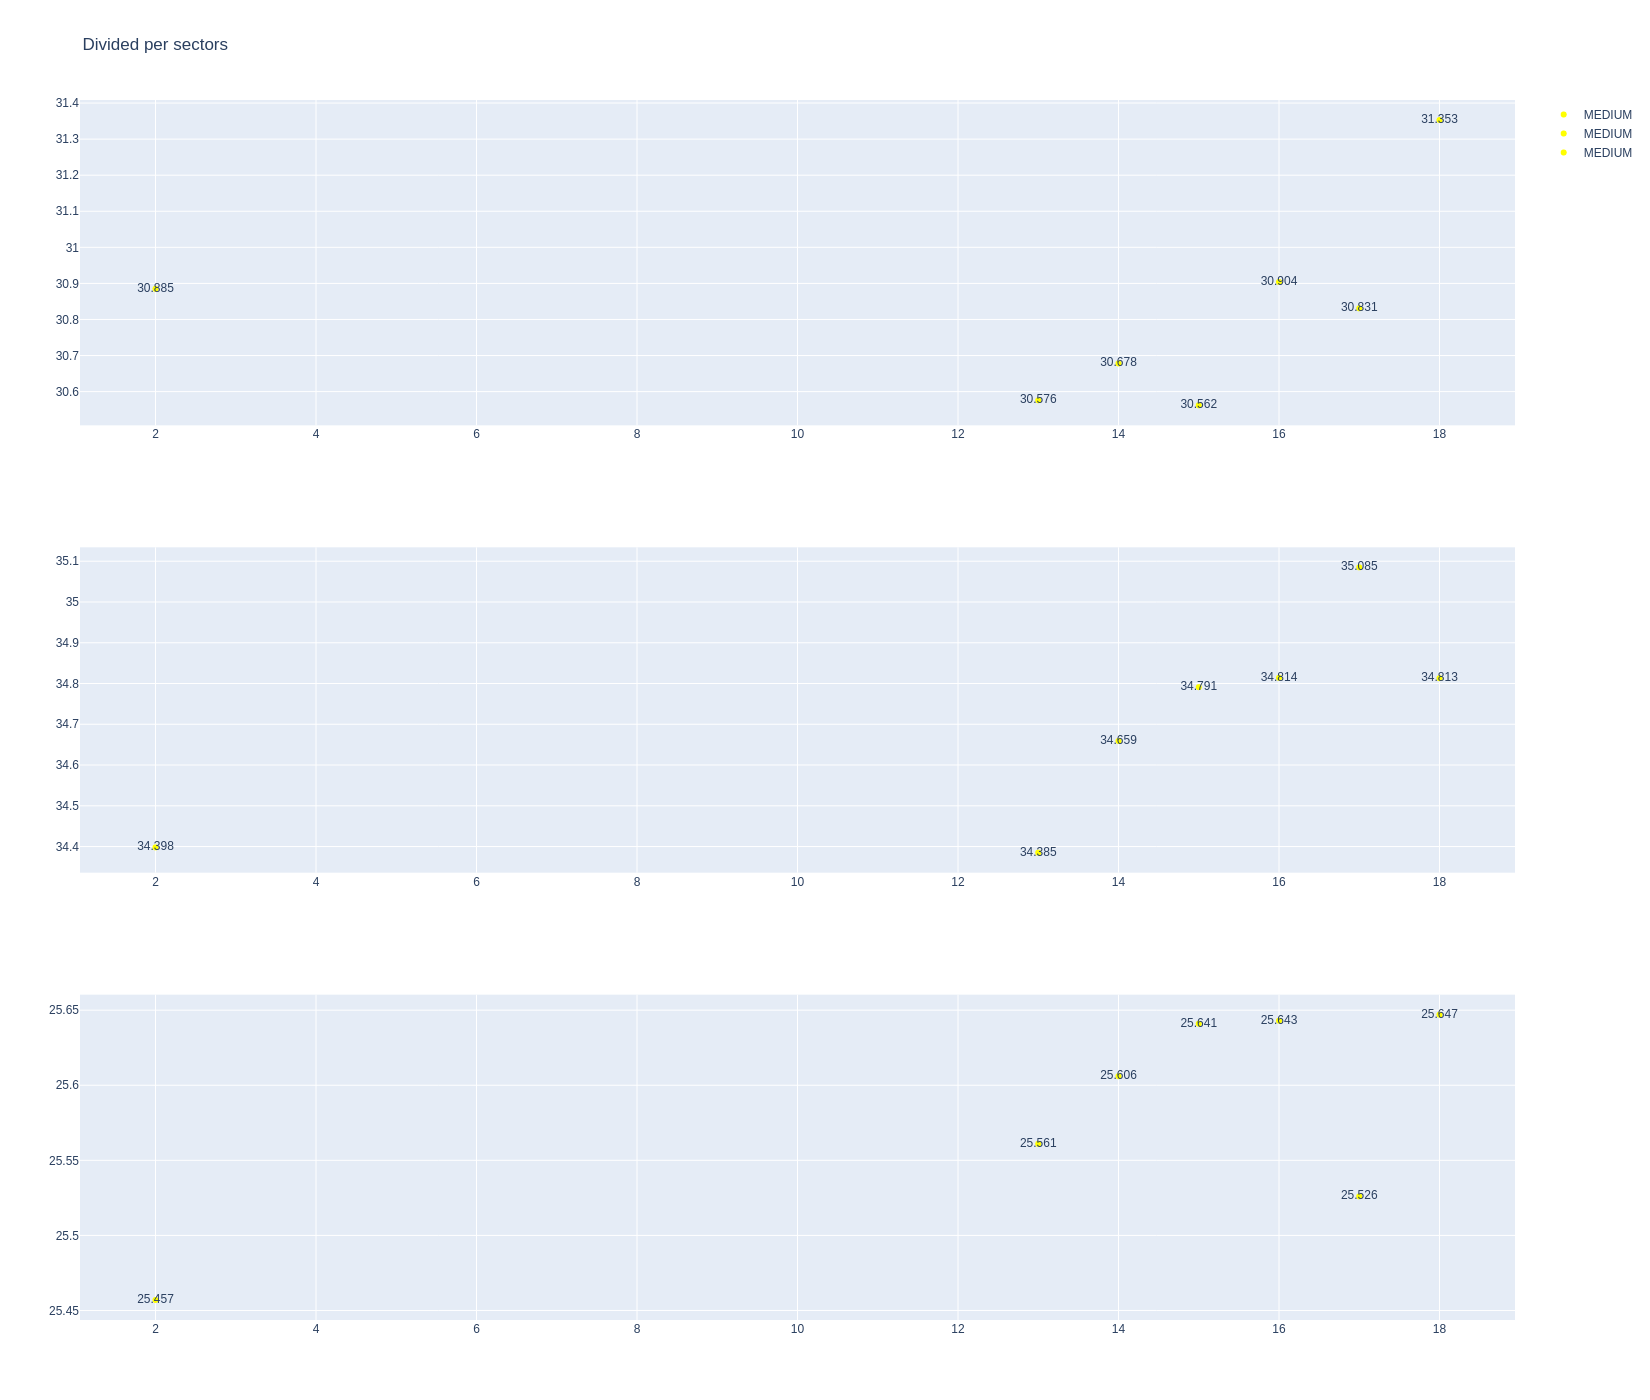

In [171]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [172]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
23   Carlos SAINZ   MEDIUM  2025-05-02T16:32:25.876000+00:00           2   
230  Carlos SAINZ   MEDIUM  2025-05-02T17:00:58.284000+00:00          14   
250  Carlos SAINZ   MEDIUM  2025-05-02T17:02:28.791000+00:00          15   
281  Carlos SAINZ   MEDIUM  2025-05-02T17:05:34.385000+00:00          17   
299  Carlos SAINZ   MEDIUM  2025-05-02T17:07:05.508000+00:00          18   
315  Carlos SAINZ   MEDIUM  2025-05-02T17:08:36.967000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
23              30.338             34.440             25.753        90.531  
230             30.322             34.710             25.558        90.590  
250             30.567             34.811             26.178        91.556  
281             30.734             34.771             25.648        91.153  
299             30.584             34.920             25.816        91.320  
315             30.796             35.034             25.809        91.639

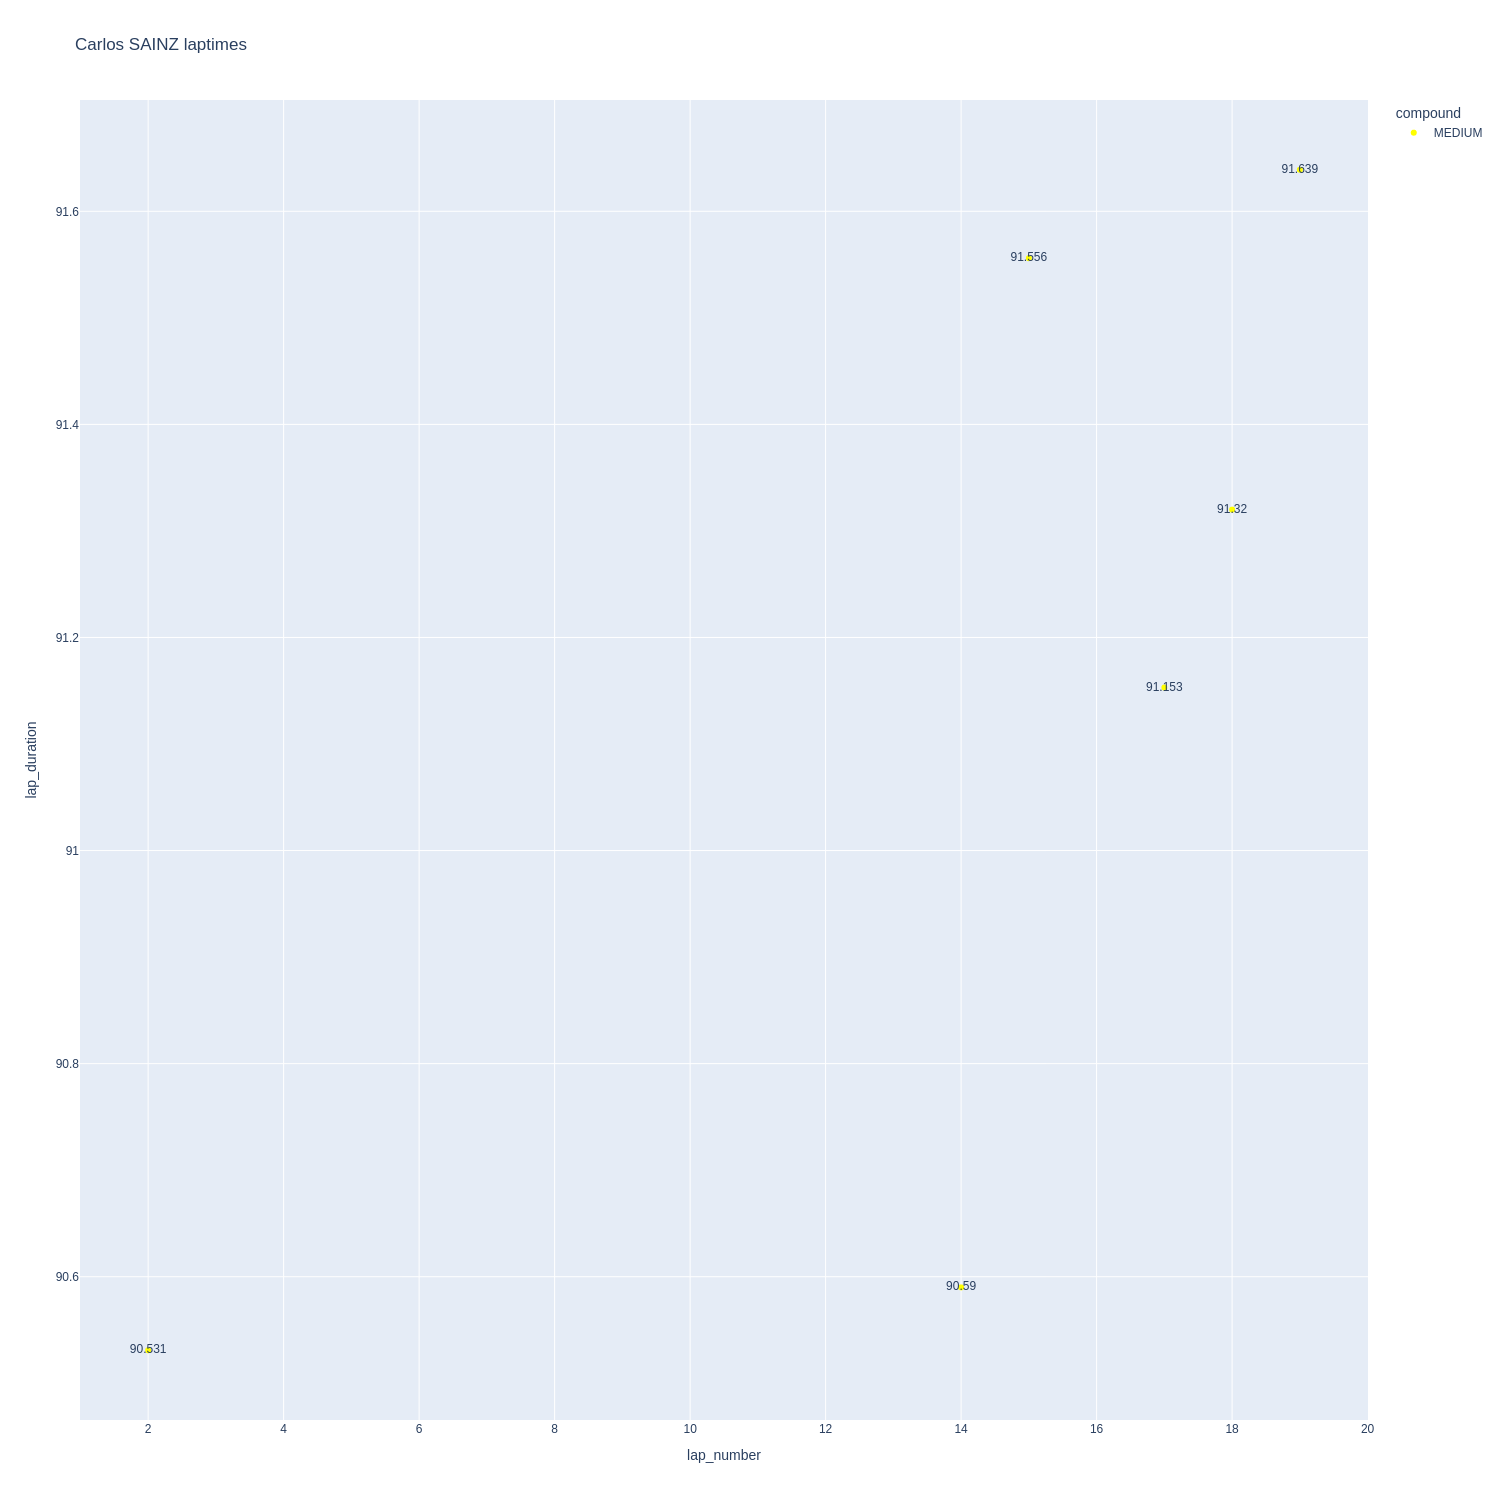

In [173]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

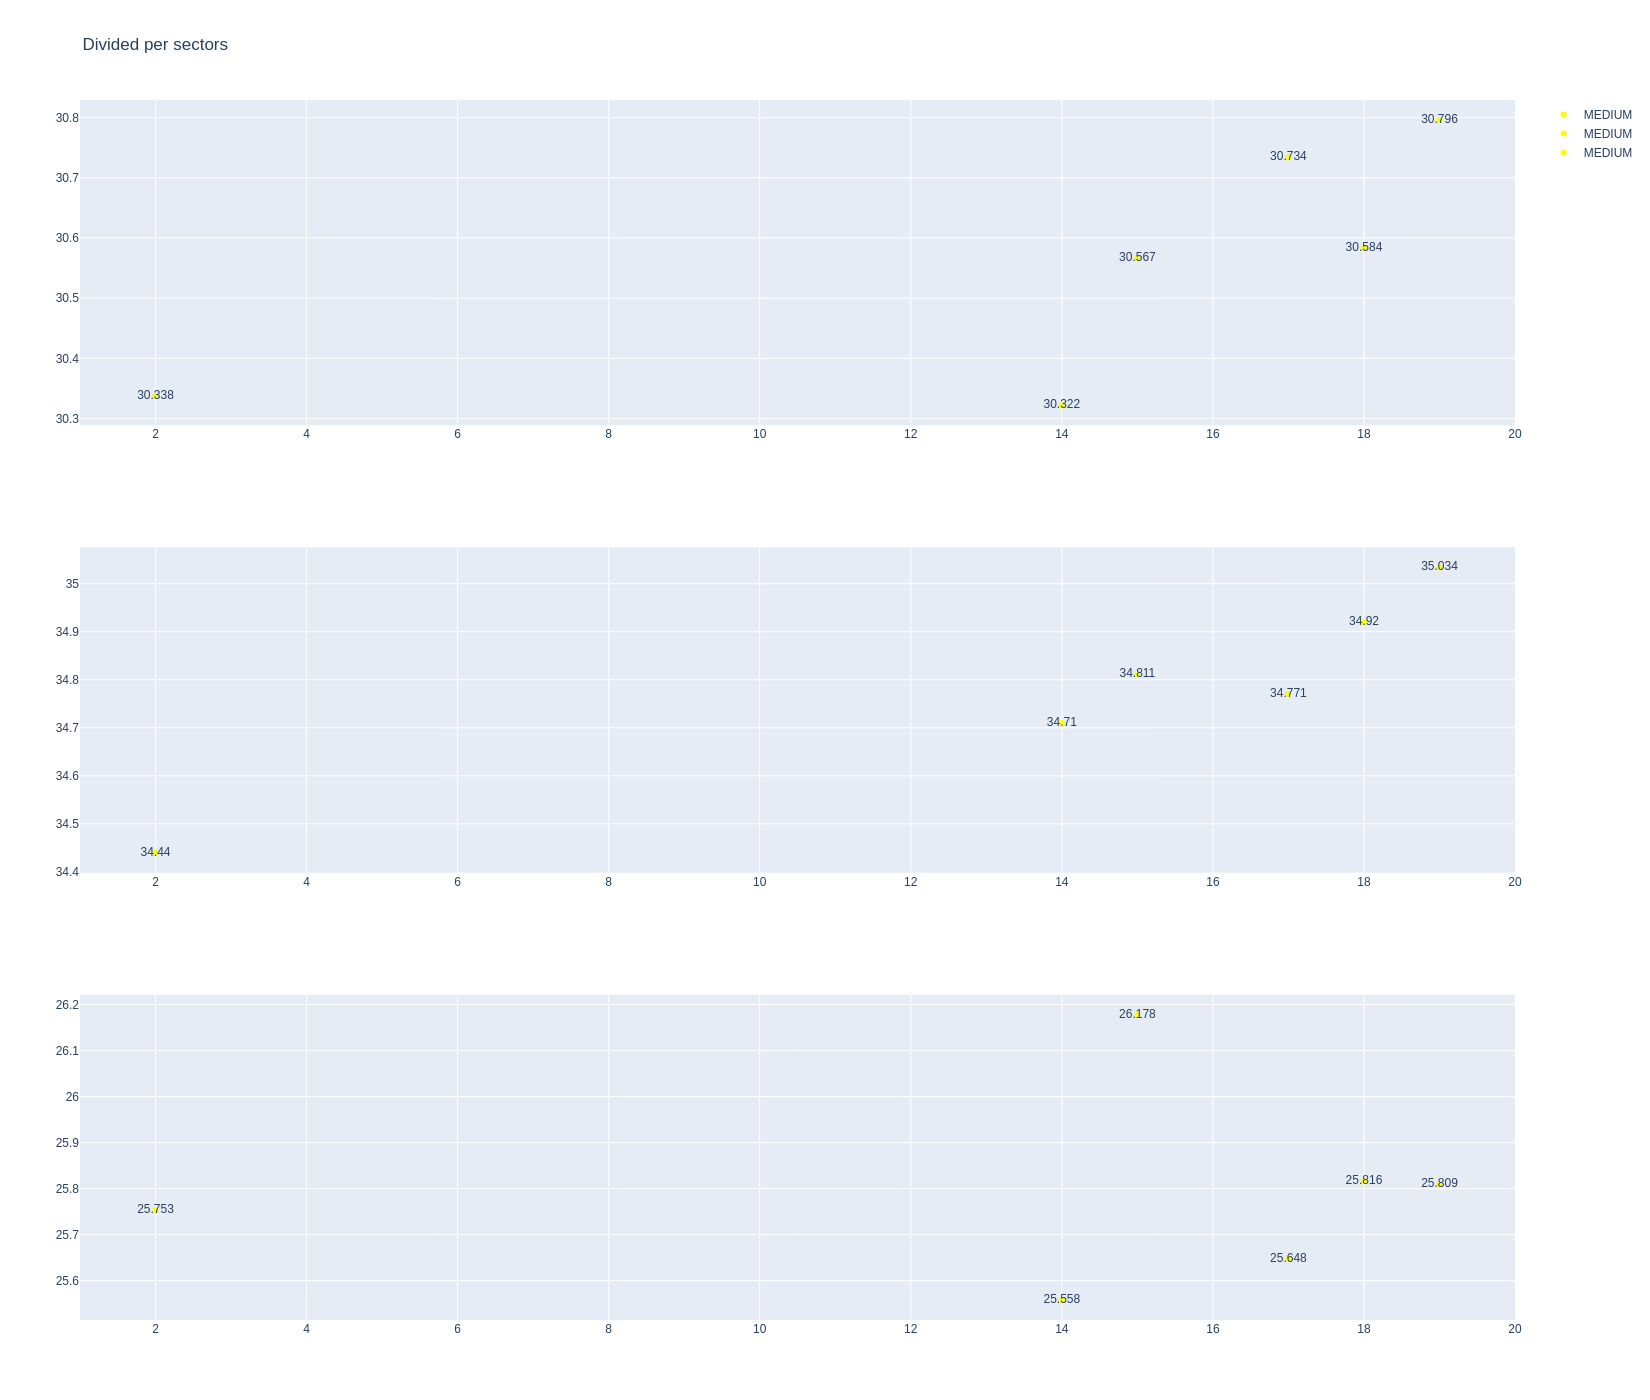

In [174]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [175]:
stintInformation.query('driver_number == 5 or driver_number == 27')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1259        10023             1             27          1        5   
11         1259        10023             1              5          1        7   
29         1259        10023             2             27          6        8   
36         1259        10023             2              5          8       10   
38         1259        10023             3             27          9       11   
49         1259        10023             3              5         11       17   
51         1259        10023             4             27         12       14   
62         1259        10023             4              5         18       20   

   compound  tyre_age_at_start  
5    MEDIUM                  0  
11   MEDIUM                  0  
29     SOFT                  0  
36   MEDIUM                  6  
38     SOFT                  0  
49   MEDIUM                  0  
51     SOFT                  6  
62     SOFT                  0

In [176]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
19   Gabriel BORTOLETO   MEDIUM  2025-05-02T16:32:09.093000+00:00           2   
58   Gabriel BORTOLETO   MEDIUM  2025-05-02T16:36:08.867000+00:00           4   
235  Gabriel BORTOLETO   MEDIUM  2025-05-02T17:01:30.084000+00:00          11   
254  Gabriel BORTOLETO   MEDIUM  2025-05-02T17:03:02.248000+00:00          12   
271  Gabriel BORTOLETO   MEDIUM  2025-05-02T17:04:34.608000+00:00          13   
287  Gabriel BORTOLETO   MEDIUM  2025-05-02T17:06:07.348000+00:00          14   
303  Gabriel BORTOLETO   MEDIUM  2025-05-02T17:07:39.574000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
19              31.717             35.248             25.862        92.827  
58              30.448             34.644             26.664        91.756  
235             30.766             35.276             25.964        92.006  
254             30.964             35.457             25.981        92.402  
271             30.806             36.082             25.889        92.777  
287             30.542             35.802             25.934        92.278  
303             30.737             35.353             25.799        91.889

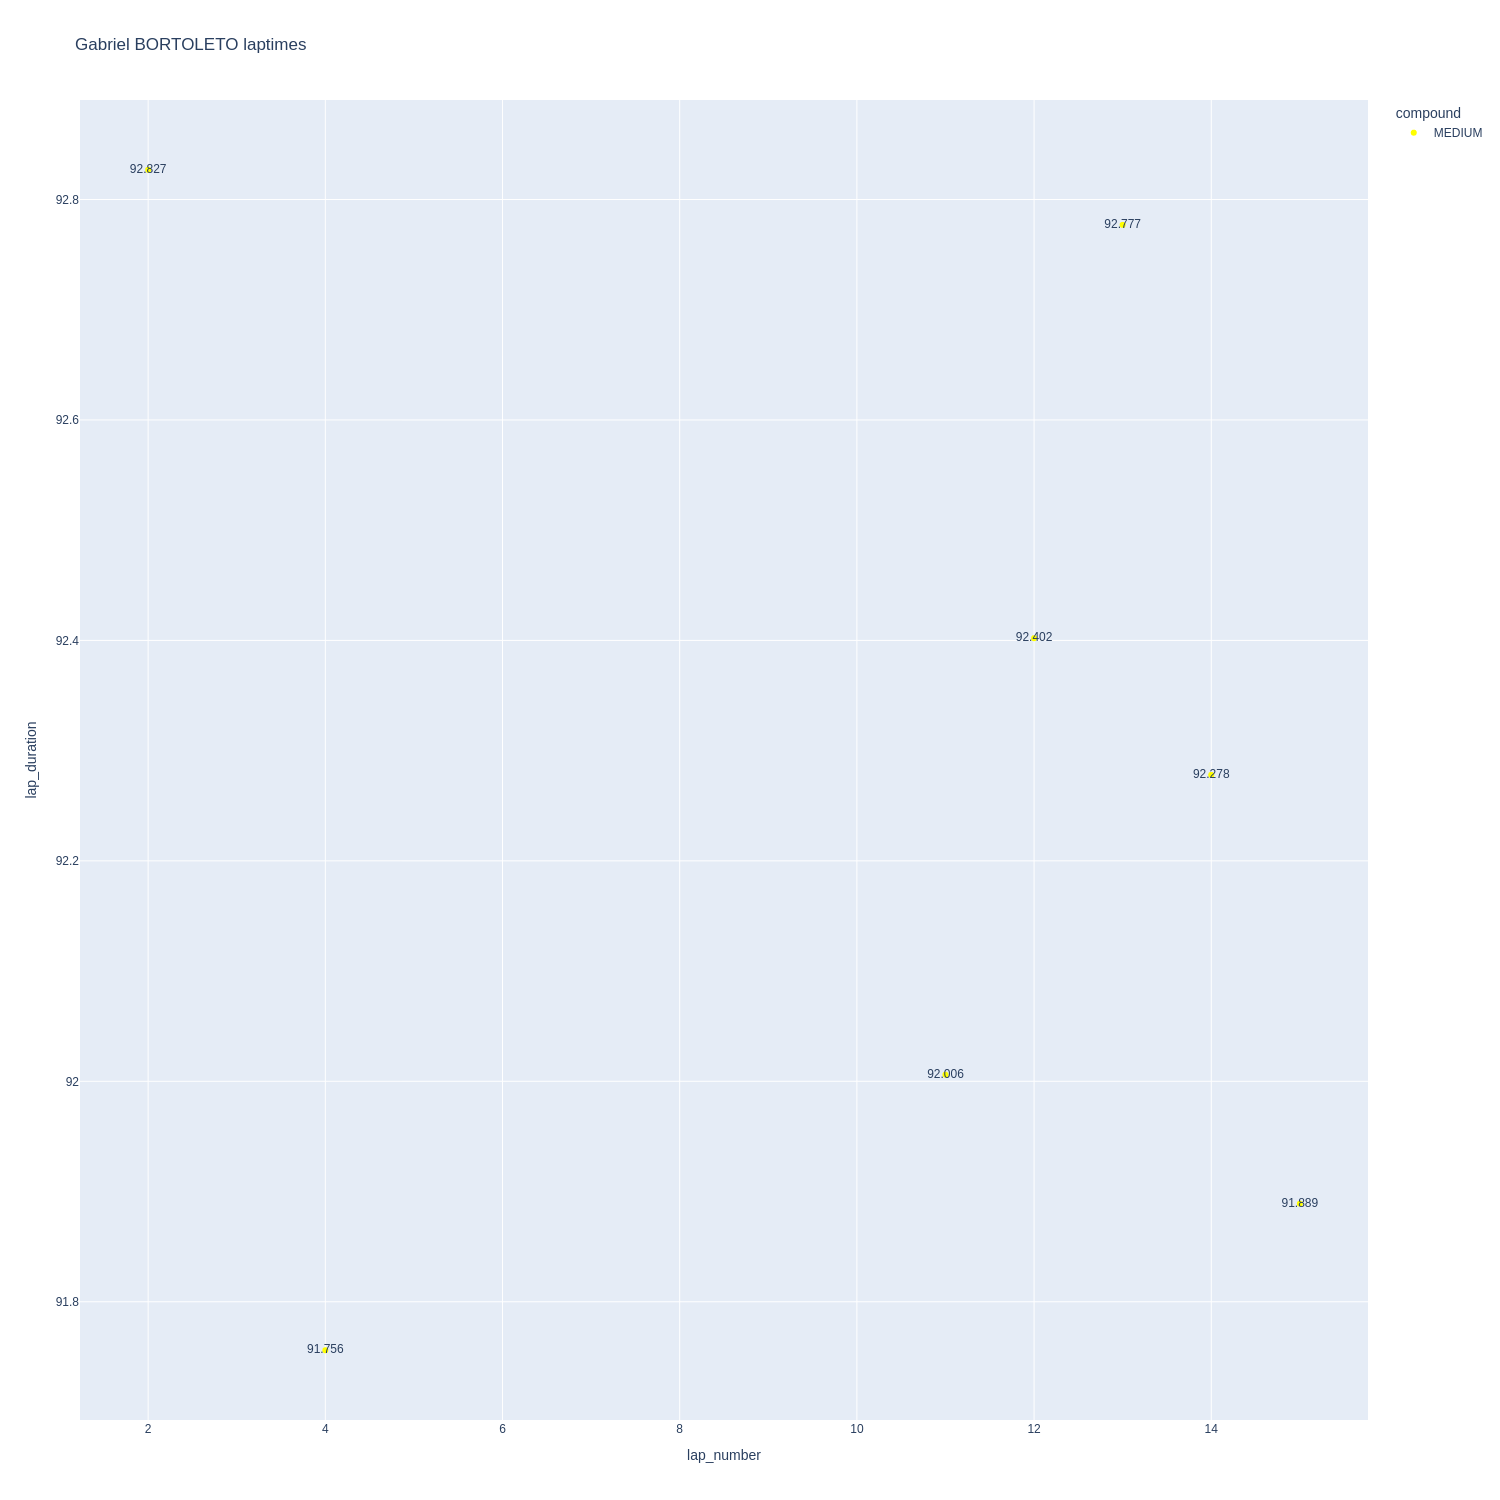

In [177]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

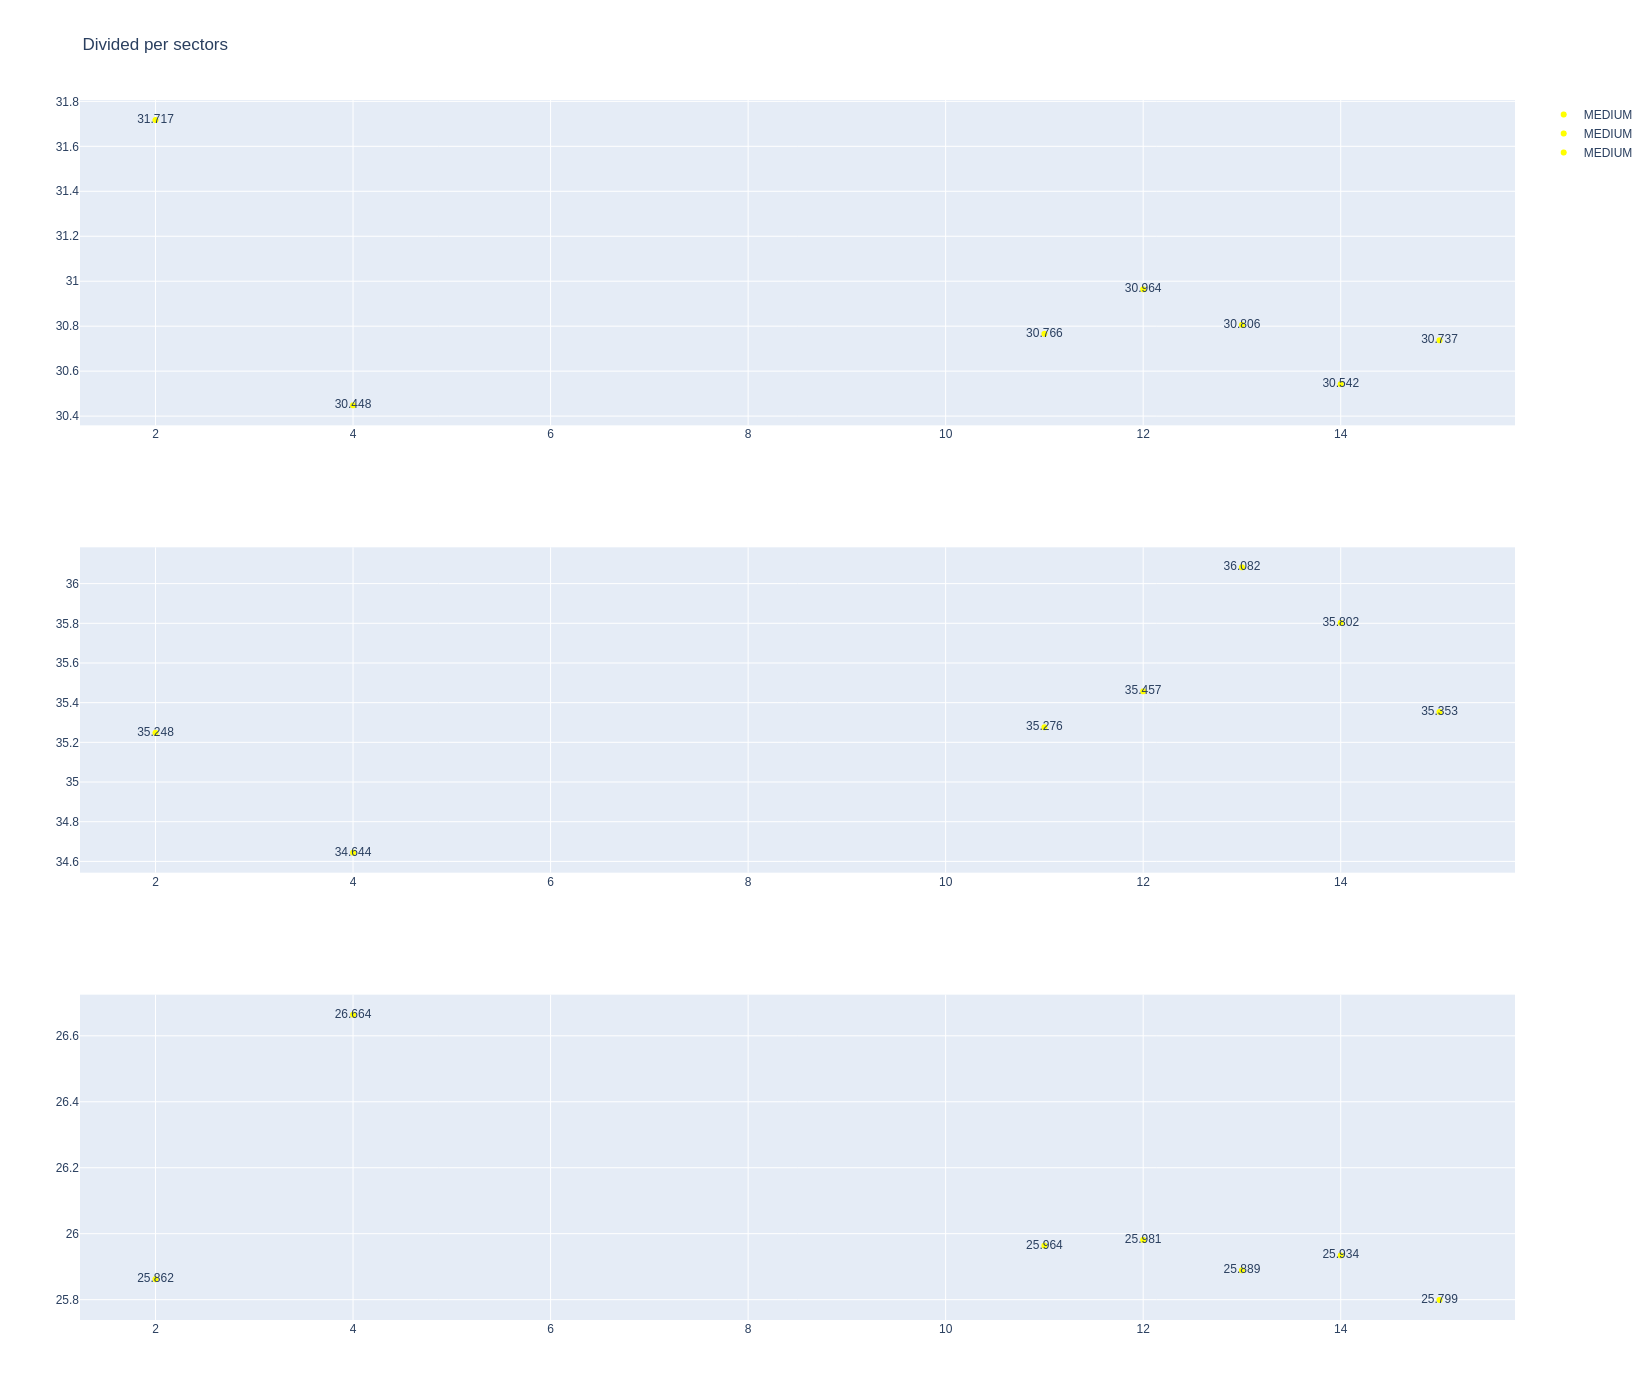

In [178]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [179]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
40  Nico HULKENBERG   MEDIUM  2025-05-02T16:34:00.266000+00:00           2   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
40             30.902             34.731             25.675        91.308

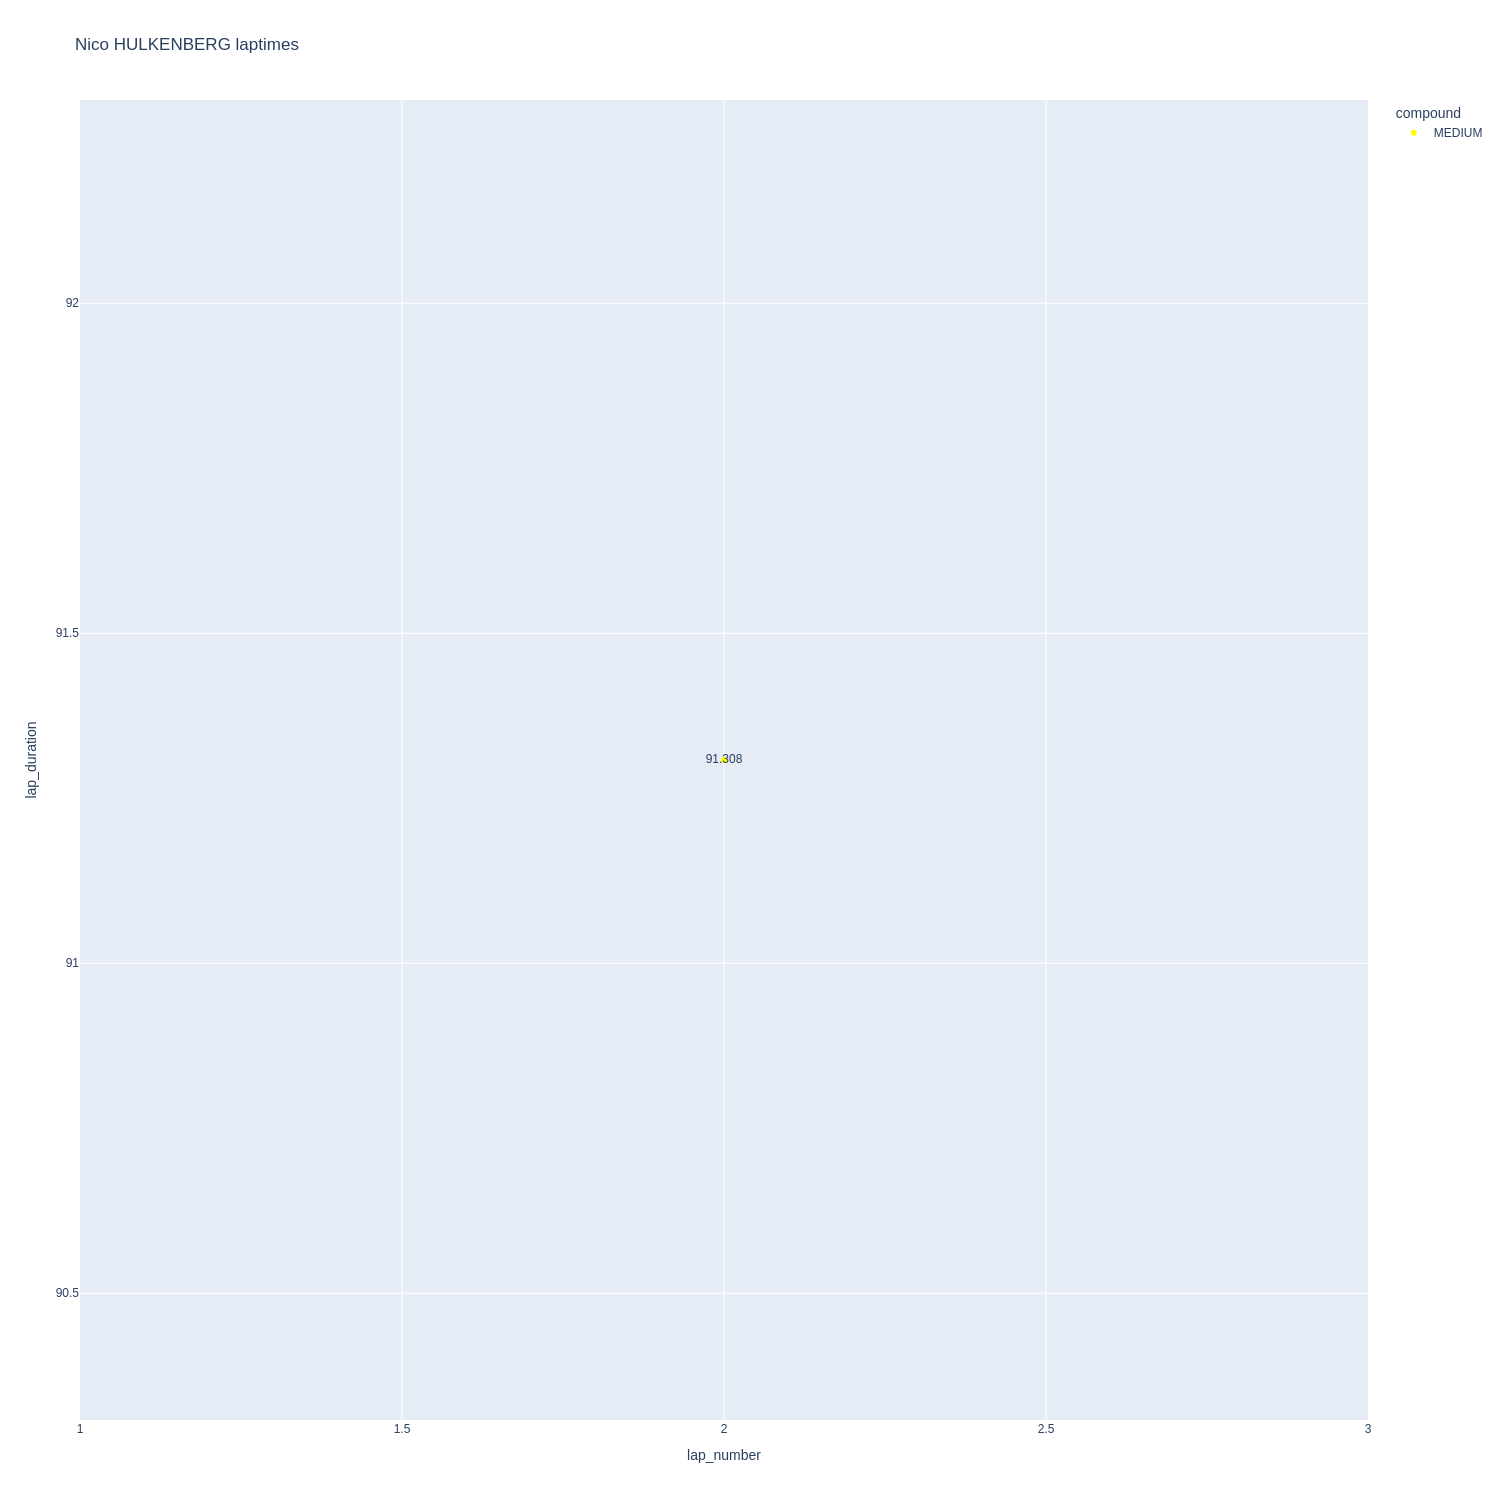

In [180]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

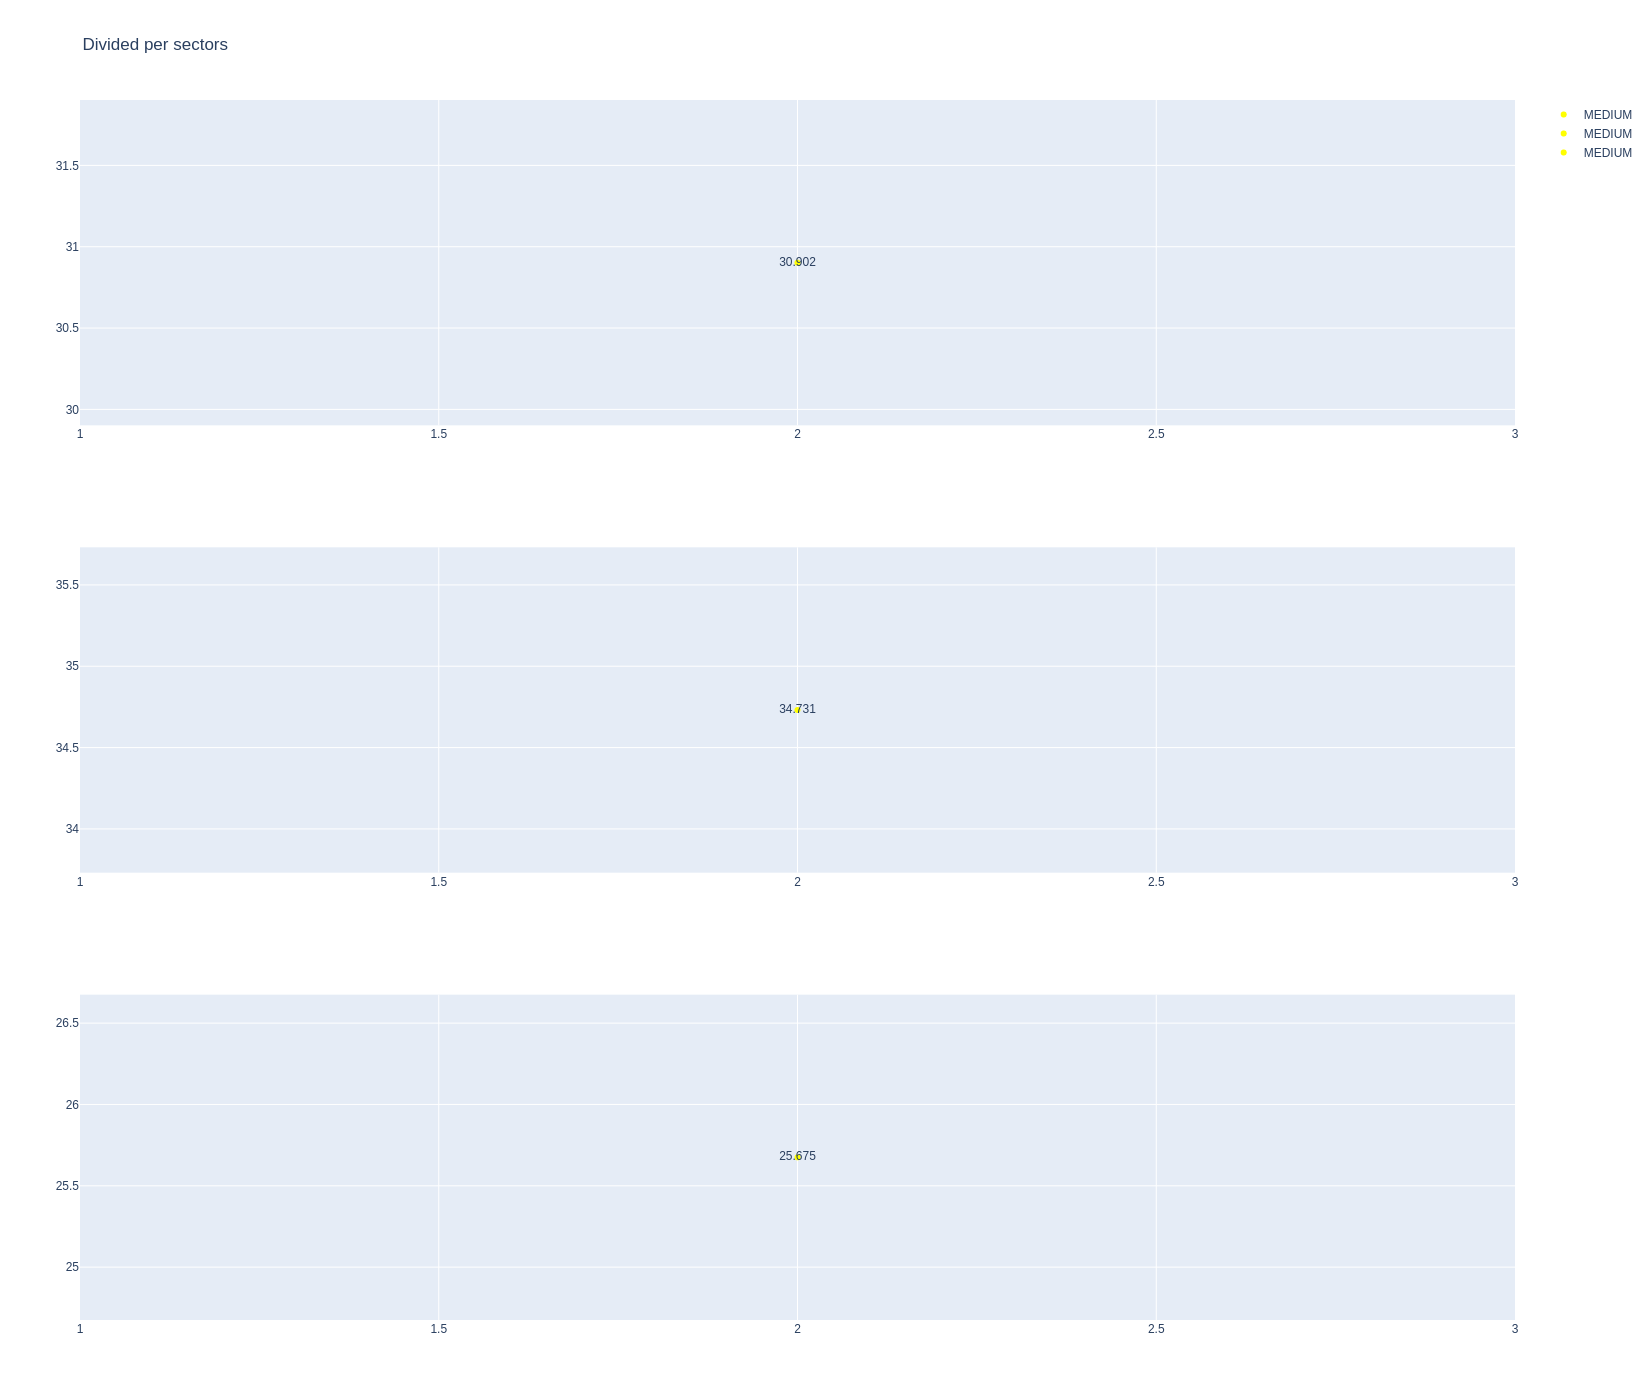

In [181]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [192]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration
Only Mercedes and Red Bull did long stints. Red Bull had a poor pace and they had some problems in sector 2 with the degradation. On the other hand, Mercedes was faster in general but they had degradation in sector 3.
Haas suffered in the first sector.


In [193]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [194]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
18      Oscar PIASTRI   MEDIUM     90.805667  30.412667  34.657000  25.736000
11    Alexander ALBON   MEDIUM     91.116429  30.827000  34.706429  25.583000
15     Lewis HAMILTON   MEDIUM     91.130500  30.163750  35.100250  25.866500
16       Carlos SAINZ   MEDIUM     91.131500  30.556833  34.781000  25.793667
1        Lando NORRIS   MEDIUM     91.185667  30.151333  34.361000  26.673333
12    Nico HULKENBERG   MEDIUM     91.308000  30.902000  34.731000  25.675000
4         Jack DOOHAN   MEDIUM     91.524889  30.622333  35.101778  25.800778
8     Charles LECLERC   MEDIUM     91.653600  30.663000  35.063800  25.926800
10       Yuki TSUNODA   MEDIUM     91.665000  30.664000  35.063500  25.937500
17     George RUSSELL   MEDIUM     91.678062  30.724000  35.069125  25.884937
9        Lance STROLL   MEDIUM     91.679333  30.455000  35.291000  25.933333
6      Kimi ANTONELLI   MEDIUM     91.738571  30.714000  35.113429  25.911143
14       Esteban OCON   MEDIUM     91.888667  30.787833  35.058333  26.042500
19     Oliver BEARMAN   MEDIUM     92.024900  30.943300  35.067600  26.014000
5        Pierre GASLY   MEDIUM     92.056250  31.052500  35.149750  25.854000
7     Fernando ALONSO   MEDIUM     92.087000  30.787500  35.324500  25.975000
0      Max VERSTAPPEN   MEDIUM     92.148250  30.842125  35.207250  26.098875
2   Gabriel BORTOLETO   MEDIUM     92.276429  30.854286  35.408857  26.013286
3        Isack HADJAR     HARD     92.337000  30.847000  35.357400  26.132600
13        Liam LAWSON     HARD     92.458833  31.066167  35.273667  26.119000

##### Sorted by sector 1
Piastri and Hamilton are strong in this sector being the  leaders of their teams. Also Alonso is strong and this could help him to win some positions. Red Bull will suffer on race.

In [195]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
1        Lando NORRIS   MEDIUM  30.151333
15     Lewis HAMILTON   MEDIUM  30.163750
18      Oscar PIASTRI   MEDIUM  30.412667
9        Lance STROLL   MEDIUM  30.455000
16       Carlos SAINZ   MEDIUM  30.556833
4         Jack DOOHAN   MEDIUM  30.622333
8     Charles LECLERC   MEDIUM  30.663000
10       Yuki TSUNODA   MEDIUM  30.664000
6      Kimi ANTONELLI   MEDIUM  30.714000
17     George RUSSELL   MEDIUM  30.724000
7     Fernando ALONSO   MEDIUM  30.787500
14       Esteban OCON   MEDIUM  30.787833
11    Alexander ALBON   MEDIUM  30.827000
0      Max VERSTAPPEN   MEDIUM  30.842125
3        Isack HADJAR     HARD  30.847000
2   Gabriel BORTOLETO   MEDIUM  30.854286
12    Nico HULKENBERG   MEDIUM  30.902000
19     Oliver BEARMAN   MEDIUM  30.943300
5        Pierre GASLY   MEDIUM  31.052500
13        Liam LAWSON     HARD  31.066167

##### Sorted by sector 2
Ferrari is strong here so it could make sense to say that the car is focused on turns. Racing Bulls were fast here so it could help to make overcuts on race.

In [196]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
1        Lando NORRIS   MEDIUM  34.361000
18      Oscar PIASTRI   MEDIUM  34.657000
11    Alexander ALBON   MEDIUM  34.706429
12    Nico HULKENBERG   MEDIUM  34.731000
16       Carlos SAINZ   MEDIUM  34.781000
14       Esteban OCON   MEDIUM  35.058333
10       Yuki TSUNODA   MEDIUM  35.063500
8     Charles LECLERC   MEDIUM  35.063800
19     Oliver BEARMAN   MEDIUM  35.067600
17     George RUSSELL   MEDIUM  35.069125
15     Lewis HAMILTON   MEDIUM  35.100250
4         Jack DOOHAN   MEDIUM  35.101778
6      Kimi ANTONELLI   MEDIUM  35.113429
5        Pierre GASLY   MEDIUM  35.149750
0      Max VERSTAPPEN   MEDIUM  35.207250
13        Liam LAWSON     HARD  35.273667
9        Lance STROLL   MEDIUM  35.291000
7     Fernando ALONSO   MEDIUM  35.324500
3        Isack HADJAR     HARD  35.357400
2   Gabriel BORTOLETO   MEDIUM  35.408857

##### Sorted by sector 3
McLaren was the best here and if they take advantage this sector, they could extend the gap on race. Alpine could gain some positions thanks to the focus on the straight. Red Bull will suffer here.

In [197]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
11    Alexander ALBON   MEDIUM  25.583000
12    Nico HULKENBERG   MEDIUM  25.675000
18      Oscar PIASTRI   MEDIUM  25.736000
16       Carlos SAINZ   MEDIUM  25.793667
4         Jack DOOHAN   MEDIUM  25.800778
5        Pierre GASLY   MEDIUM  25.854000
15     Lewis HAMILTON   MEDIUM  25.866500
17     George RUSSELL   MEDIUM  25.884937
6      Kimi ANTONELLI   MEDIUM  25.911143
8     Charles LECLERC   MEDIUM  25.926800
9        Lance STROLL   MEDIUM  25.933333
10       Yuki TSUNODA   MEDIUM  25.937500
7     Fernando ALONSO   MEDIUM  25.975000
2   Gabriel BORTOLETO   MEDIUM  26.013286
19     Oliver BEARMAN   MEDIUM  26.014000
14       Esteban OCON   MEDIUM  26.042500
0      Max VERSTAPPEN   MEDIUM  26.098875
13        Liam LAWSON     HARD  26.119000
3        Isack HADJAR     HARD  26.132600
1        Lando NORRIS   MEDIUM  26.673333

#### Long runs mean

In [188]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [189]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
18     O PIASTRI         90.806
11       A ALBON         91.116
15    L HAMILTON         91.130
16       C SAINZ         91.132
1       L NORRIS         91.186
12  N HULKENBERG         91.308
4       J DOOHAN         91.525
8      C LECLERC         91.654
10     Y TSUNODA         91.665
17     G RUSSELL         91.678
9       L STROLL         91.679
6    K ANTONELLI         91.739
14        E OCON         91.889
19     O BEARMAN         92.025
5        P GASLY         92.056
7       F ALONSO         92.087
0   M VERSTAPPEN         92.148
2    G BORTOLETO         92.276

In [199]:
#libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

In [191]:
#libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

## Sprint Qualyfing
### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9502)


### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9502)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9502)
drivers = libraryDataF1.obtain_information('drivers',session_key=9502)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 6, 'SQ')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In race control dataset, I can see a lot of laptimes deleted, principally for track limits. Those laps deleted were deleted from dataset in order to obtain only the valid laps for the analysis.

In [ ]:
ids_deleted = [36,87,69,103,176]
for idv in ids_deleted:
    qualyfing = qualyfing.drop(idv)

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

The fastest lap  is 87.597 seconds (1.35.606= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (93.72879 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 93.72879")
competitiveLaps

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In [ ]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start <'2024-05-03T20:49:01+00:00'"
maximumDateQ2 = "date_start <'2024-05-03T21:06:00+00:00' and date_start >='2024-05-03T20:49:01+00:00'"
maximumDateQ3 = "date_start >'2024-05-03T21:06:00+00:00'"

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Sprint Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 =  libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
#libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

In [ ]:
#libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

### Best sector in the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Sprint

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9506)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9506)
drivers = libraryDataF1.obtain_information('drivers',session_key=9506)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])

### Top speed captured in the speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=95").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=95").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=95").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=95").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

##### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

##### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

##### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 84
MAXIMUM_SECONDS = 95

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9498)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9498)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9498)
drivers = libraryDataF1.obtain_information('drivers',session_key=9498)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 6, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

To obtain a better analysis, those laptimes deleted will be removed from this analysis in order to obtain the data with valid values. So that,taking into account the race control table, it will be neccesary to consult the qualyfing data to obtain the ids. 

In [ ]:
# qualyfing = qualyfing.drop(40)
# qualyfing = qualyfing.drop(49)
# qualyfing = qualyfing.drop(50)

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 87.241 seconds (1.27.241= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (93.347 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 93.347")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole. In this case, this happened with Leclerc taking the best time but not taking the pole because his cest time in Q3 was not the best time of the session.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
mergequaly

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-05-04T20:25:01+00:00'"
maximumDateQ2 = "date_start <'2024-05-04T20:48:00+00:00' and date_start >'2024-05-04T20:25:01+00:00'"
maximumDateQ3 = "date_start >'2024-05-04T20:48:00+00:00'"

### Qualyfing 1
In this session the surprise came from Mercedes with Hamilton that knocked-out in Q1. The rest of the drivers were expected to be knocked-out

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2
In this session, Bottas entered in Q3 knocking-out Stroll

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
Red Bull was dominant in China as we can see in qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9507)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9507)
drivers = libraryDataF1.obtain_information('drivers',session_key=9507)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=95").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Race pace
General explanation
Explanation per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=95").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=95").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=95").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=95").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 84
MAXIMUM_SECONDS = 95

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9507)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration